# Oversampling

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE, BorderlineSMOTE

# Oversampling Dataset 1500 --> 2000 (smote)

In [13]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/dataset1500.csv')

# Convert the target variable to numerical values (yes' replaced with 1 and 'no' replaced with 0)
le = LabelEncoder()
df['label_pass'] = le.fit_transform(df['label_pass'])

# Split the DataFrame into data and target arrays
data = df.iloc[:, 2:-1].values  # Select all columns except the first and last ones as the data array
target = df.iloc[:, -1].values  # Select the last column as the target array

print(data[0],target[0])

[ 9.92280521e+05  1.10162726e+07  2.78834711e+02  8.51429752e+02
  8.23538876e+05  9.00528079e+06  4.32943315e+03  3.07037583e+03
  8.43270000e+04  8.68973000e+05 -9.77300000e+03 -5.37700000e+03
  2.77541100e+06  2.86374190e+07  8.42900000e+03  9.70800000e+03] 1


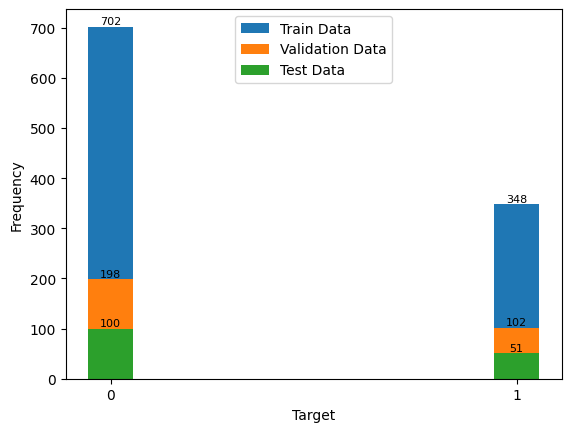

Number of tuples in Train Data: 1050
Number of tuples in Validation Data: 300
Number of tuples in Test Data: 151


In [14]:
# Split target data into 3 parts with 70%, 20%, and 10% of the tuples
split_points = np.array([0.7, 0.9]) * len(target)
split_points = split_points.astype(int)
first_part = target[:split_points[0]]
second_part = target[split_points[0]:split_points[1]]
last_part = target[split_points[1]:]

# Plot histogram of each part
n1, bins1, patches1 = plt.hist(first_part, label='Train Data')
n2, bins2, patches2 = plt.hist(second_part, label='Validation Data')
n3, bins3, patches3 = plt.hist(last_part, label='Test Data')

# Find the bins that have bars
bins_with_bars1 = [bins1[i] for i in range(len(patches1)) if n1[i] > 0]
bins_with_bars2 = [bins2[j] for j in range(len(patches2)) if n2[j] > 0]
bins_with_bars3 = [bins3[k] for k in range(len(patches3)) if n3[k] > 0]

# Calculate the bar width
bar_width1 = bins1[1] - bins1[0]
bar_width2 = bins2[1] - bins2[0]
bar_width3 = bins3[1] - bins3[0]

# Set the x-tick locations and labels for bins with bars only
plt.xticks([b + bar_width1/2 for b in bins_with_bars1], [0,1])
plt.xticks([b + bar_width2/2 for b in bins_with_bars2], [0,1])
plt.xticks([b + bar_width3/2 for b in bins_with_bars3], [0,1])

# Add text labels to each bin
for i in range(len(patches1)):
    if n1[i] > 0:  # Only label bins with bars
        plt.text(x=bins1[i]+(bins1[i+1]-bins1[i])/2, y=n1[i]+5, s=int(n1[i]), ha='center', fontsize=8)
for j in range(len(patches2)):
    if n2[j] > 0:  # Only label bins with bars
        plt.text(x=bins2[j]+(bins2[j+1]-bins2[j])/2, y=n2[j]+5, s=int(n2[j]), ha='center', fontsize=8)
for k in range(len(patches3)):
    if n3[k] > 0:  # Only label bins with bars
        plt.text(x=bins3[k]+(bins3[k+1]-bins3[k])/2, y=n3[k]+5, s=int(n3[k]), ha='center', fontsize=8)

plt.xlabel('Target')
plt.ylabel('Frequency')
plt.legend(loc='upper center')

plt.show()

# Print number of tuples in each part
print(f"Number of tuples in Train Data: {first_part.shape[0]}")
print(f"Number of tuples in Validation Data: {second_part.shape[0]}")
print(f"Number of tuples in Test Data: {last_part.shape[0]}")

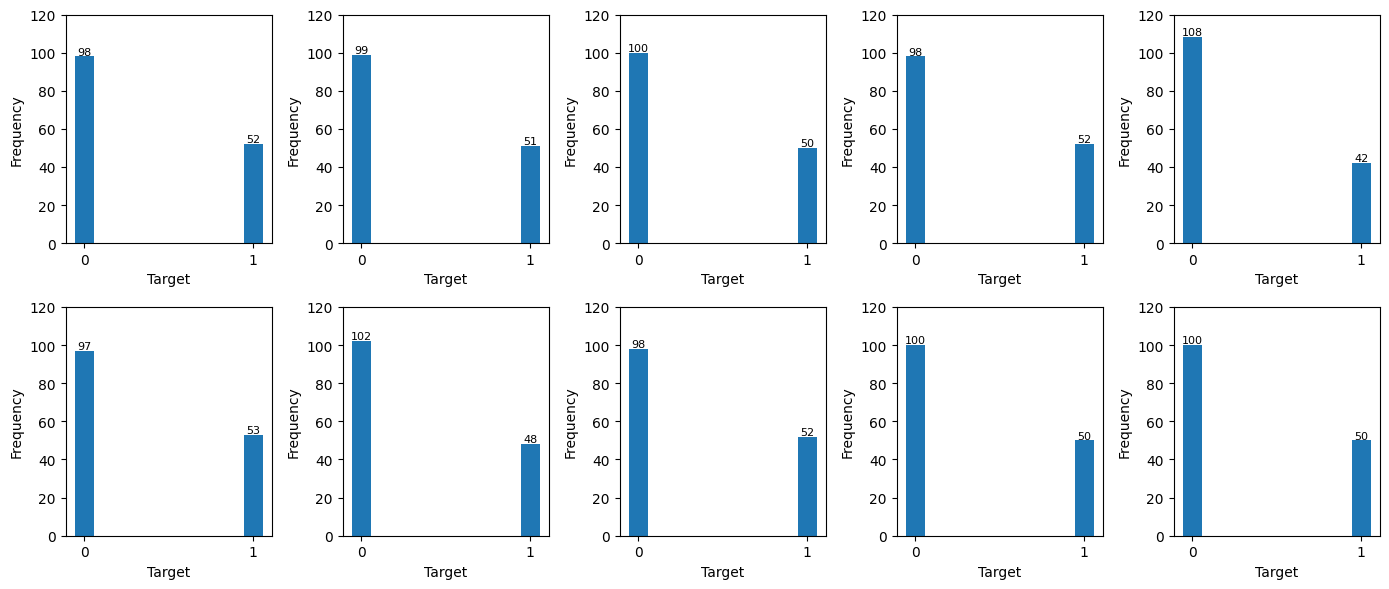

In [18]:
target = df['label_pass']
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 6))
for i, ax in enumerate(axes.ravel()):
    if i < 10:
        data = target[i*150:i*150+150]
        if len(set(data)) > 1:
            n, bins, patches = ax.hist(data)
            bins_with_bars = [bins[j] for j in range(len(patches)) if n[j] > 0]
            bar_width = bins[1] - bins[0]
            ax.set_xticks([b + bar_width/2 for b in bins_with_bars], [0,1])
            ax.set_ylim(0, 120)  # Set the y-axis limits for all subplots
            ax.set_xlabel('Target')
            ax.set_ylabel('Frequency')
            for j in range(len(patches)):
                if n[j] > 0:  # Only label bins with bars
                    ax.text(bins[j]+(bins[j+1]-bins[j])/2, n[j]+1, str(int(n[j])), ha='center', fontsize=8)
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

In [21]:
# Read in the dataset
df = pd.read_csv('data/dataset1500.csv')

# Convert the target variable to numerical values (yes' replaced with 1 and 'no' replaced with 0)
le = LabelEncoder()
df['label_pass'] = le.fit_transform(df['label_pass'])

sm = SMOTE(random_state=42)

X = df.iloc[0:150, 2:-1]
y = df.iloc[0:150, -1]
X_1, y_1= sm.fit_resample(X, y)
X = df.iloc[150:300, 2:-1]
y = df.iloc[150:300, -1]
X_2, y_2= sm.fit_resample(X, y)
X = df.iloc[300:450, 2:-1]
y = df.iloc[300:450 , -1]
X_3, y_3= sm.fit_resample(X, y)
X = df.iloc[450:600, 2:-1]
y = df.iloc[450:600, -1]
X_4, y_4= sm.fit_resample(X, y)
X = df.iloc[600:750, 2:-1]
y = df.iloc[600:750, -1]
X_5, y_5= sm.fit_resample(X, y)
X = df.iloc[750:900, 2:-1]
y = df.iloc[750:900, -1]
X_6, y_6= sm.fit_resample(X, y)
X = df.iloc[900:1050, 2:-1]
y = df.iloc[900:1050, -1]
X_7, y_7= sm.fit_resample(X, y)
X = df.iloc[1050:1200, 2:-1]
y = df.iloc[1050:1200, -1]
X_8, y_8= sm.fit_resample(X, y)
X = df.iloc[1200:1350, 2:-1]
y = df.iloc[1200:1350, -1]
X_9, y_9= sm.fit_resample(X, y)
X = df.iloc[1350:1501, 2:-1]
y = df.iloc[1350:1501, -1]
X_10, y_10= sm.fit_resample(X, y)

# Concatenate into a single dataset
oversampled_1 = pd.concat([pd.DataFrame(X_1), pd.DataFrame(y_1)], axis=1)
oversampled_2 = pd.concat([pd.DataFrame(X_2), pd.DataFrame(y_2)], axis=1)
oversampled_3 = pd.concat([pd.DataFrame(X_3), pd.DataFrame(y_3)], axis=1)
oversampled_4 = pd.concat([pd.DataFrame(X_4), pd.DataFrame(y_4)], axis=1)
oversampled_5 = pd.concat([pd.DataFrame(X_5), pd.DataFrame(y_5)], axis=1)
oversampled_6 = pd.concat([pd.DataFrame(X_6), pd.DataFrame(y_6)], axis=1)
oversampled_7 = pd.concat([pd.DataFrame(X_7), pd.DataFrame(y_7)], axis=1)
oversampled_8 = pd.concat([pd.DataFrame(X_8), pd.DataFrame(y_8)], axis=1)
oversampled_9 = pd.concat([pd.DataFrame(X_9), pd.DataFrame(y_9)], axis=1)
oversampled_10 = pd.concat([pd.DataFrame(X_10), pd.DataFrame(y_10)], axis=1)

oversampled_dataset = pd.concat([oversampled_1, oversampled_2, oversampled_3, oversampled_4, oversampled_5,
                                 oversampled_6, oversampled_7, oversampled_8, oversampled_9, oversampled_10], axis=0)

# Define a list of column names for the oversampled dataset
column_names = ['|v|_mean', '|a|_mean', 'vz_mean', 'az_mean', '|v|_std', '|a|_std', 'vz_std', 'az_std',
                '|v|_min', '|a|_min', 'vz_min', 'az_min', '|v|_max', '|a|_max', 'vz_max', 'az_max', 'label_pass']

# Assign the column names to the oversampled dataset
oversampled_dataset.columns = column_names

# Save the oversampled dataset to a CSV file
oversampled_dataset.to_csv('data/dataset2000_res.csv', index=False)

In [35]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/dataset2000_res.csv')

# Split the DataFrame into data and target arrays
data = df.iloc[:, :-1].values  # Select all columns except the last one as the data array
target = df.iloc[:, -1].values.astype(int)  # Select the last column as the target array and Convert float to int

print(df.shape)
print(data[0],target[0])

(2000, 17)
[ 9.92280521e+05  1.10162726e+07  2.78834711e+02  8.51429752e+02
  8.23538876e+05  9.00528079e+06  4.32943315e+03  3.07037583e+03
  8.43270000e+04  8.68973000e+05 -9.77300000e+03 -5.37700000e+03
  2.77541100e+06  2.86374190e+07  8.42900000e+03  9.70800000e+03] 1


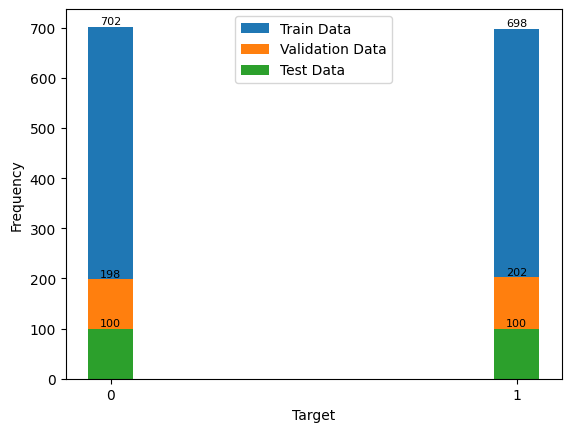

Number of tuples in Train Data: 1400
Number of tuples in Validation Data: 400
Number of tuples in Test Data: 200


In [23]:
# Split target data into 3 parts with 70%, 20%, and 10% of the tuples
split_points = np.array([0.7, 0.9]) * len(target)
split_points = split_points.astype(int)
first_part = target[:split_points[0]]
second_part = target[split_points[0]:split_points[1]]
last_part = target[split_points[1]:]

# Plot histogram of each part
n1, bins1, patches1 = plt.hist(first_part, label='Train Data')
n2, bins2, patches2 = plt.hist(second_part, label='Validation Data')
n3, bins3, patches3 = plt.hist(last_part, label='Test Data')

# Find the bins that have bars
bins_with_bars1 = [bins1[i] for i in range(len(patches1)) if n1[i] > 0]
bins_with_bars2 = [bins2[j] for j in range(len(patches2)) if n2[j] > 0]
bins_with_bars3 = [bins3[k] for k in range(len(patches3)) if n3[k] > 0]

# Calculate the bar width
bar_width1 = bins1[1] - bins1[0]
bar_width2 = bins2[1] - bins2[0]
bar_width3 = bins3[1] - bins3[0]

# Set the x-tick locations and labels for bins with bars only
plt.xticks([b + bar_width1/2 for b in bins_with_bars1], [0,1])
plt.xticks([b + bar_width2/2 for b in bins_with_bars2], [0,1])
plt.xticks([b + bar_width3/2 for b in bins_with_bars3], [0,1])

# Add text labels to each bin
for i in range(len(patches1)):
    if n1[i] > 0:  # Only label bins with bars
        plt.text(x=bins1[i]+(bins1[i+1]-bins1[i])/2, y=n1[i]+5, s=int(n1[i]), ha='center', fontsize=8)
for j in range(len(patches2)):
    if n2[j] > 0:  # Only label bins with bars
        plt.text(x=bins2[j]+(bins2[j+1]-bins2[j])/2, y=n2[j]+5, s=int(n2[j]), ha='center', fontsize=8)
for k in range(len(patches3)):
    if n3[k] > 0:  # Only label bins with bars
        plt.text(x=bins3[k]+(bins3[k+1]-bins3[k])/2, y=n3[k]+5, s=int(n3[k]), ha='center', fontsize=8)

plt.xlabel('Target')
plt.ylabel('Frequency')
plt.legend(loc='upper center')

plt.show()

# Print number of tuples in each part
print(f"Number of tuples in Train Data: {first_part.shape[0]}")
print(f"Number of tuples in Validation Data: {second_part.shape[0]}")
print(f"Number of tuples in Test Data: {last_part.shape[0]}")

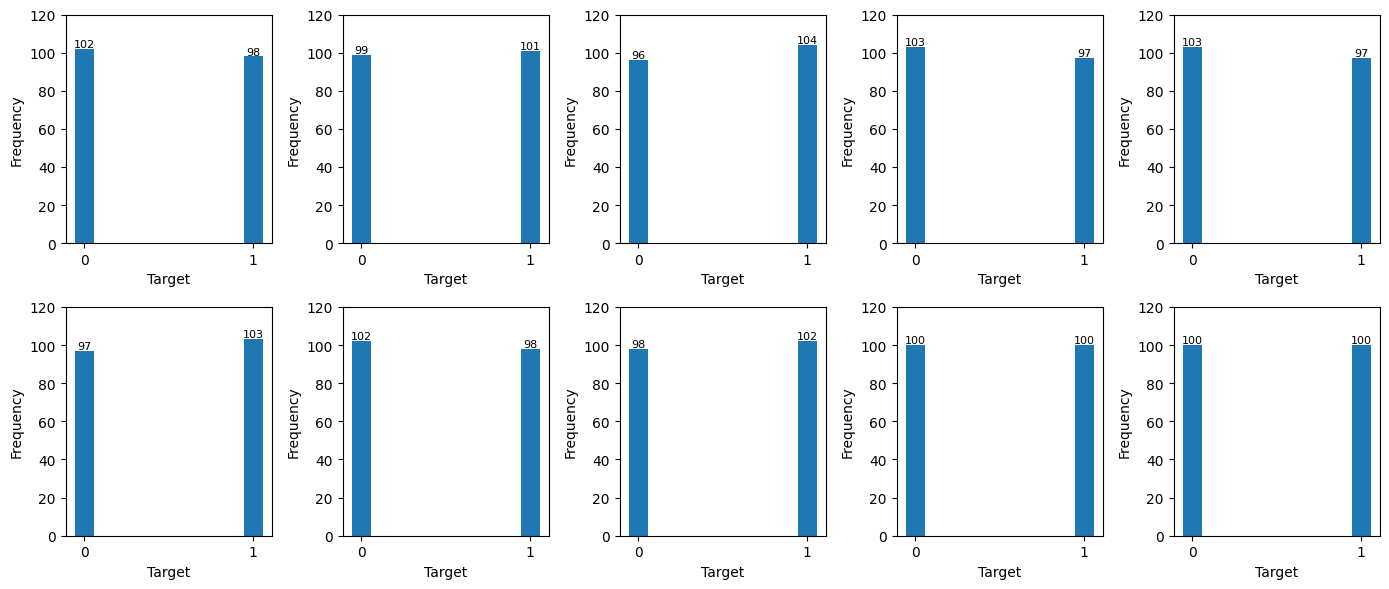

In [26]:
target = df['label_pass']
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 6))
for i, ax in enumerate(axes.ravel()):
    if i < 10:
        data = target[i*200:i*200+200]
        if len(set(data)) > 1:
            n, bins, patches = ax.hist(data)
            bins_with_bars = [bins[j] for j in range(len(patches)) if n[j] > 0]
            bar_width = bins[1] - bins[0]
            ax.set_xticks([b + bar_width/2 for b in bins_with_bars], [0,1])
            ax.set_ylim(0, 120)  # Set the y-axis limits for all subplots
            ax.set_xlabel('Target')
            ax.set_ylabel('Frequency')
            for j in range(len(patches)):
                if n[j] > 0:  # Only label bins with bars
                    ax.text(bins[j]+(bins[j+1]-bins[j])/2, n[j]+1, str(int(n[j])), ha='center', fontsize=8)
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

# Oversampling Dataset 2500 --> 4000 (smote)

In [27]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/dataset2500.csv')

# Convert the target variable to numerical values (yes' replaced with 1 and 'no' replaced with 0)
le = LabelEncoder()
df['label_pass'] = le.fit_transform(df['label_pass'])

# Split the DataFrame into data and target arrays
data = df.iloc[:, 2:-1].values  # Select all columns except the first and last ones as the data array
target = df.iloc[:, -1].values  # Select the last column as the target array

print(data[0],target[0])

[ 9.92280521e+05  1.10162726e+07  2.78834711e+02  8.51429752e+02
  8.23538876e+05  9.00528079e+06  4.32943315e+03  3.07037583e+03
  8.43270000e+04  8.68973000e+05 -9.77300000e+03 -5.37700000e+03
  2.77541100e+06  2.86374190e+07  8.42900000e+03  9.70800000e+03] 1


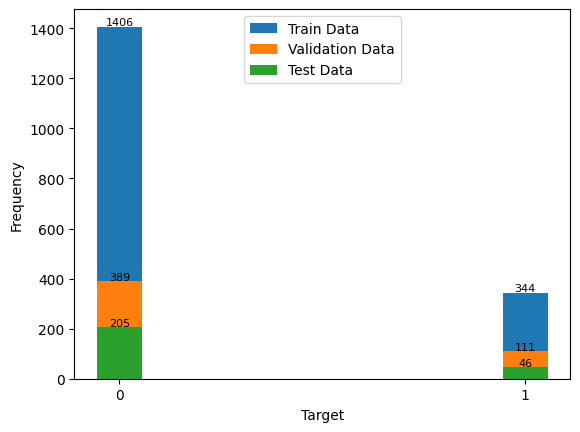

Number of tuples in Train Data: 1750
Number of tuples in Validation Data: 500
Number of tuples in Test Data: 251


In [28]:
# Split target data into 3 parts with 70%, 20%, and 10% of the tuples
split_points = np.array([0.7, 0.9]) * len(target)
split_points = split_points.astype(int)
first_part = target[:split_points[0]]
second_part = target[split_points[0]:split_points[1]]
last_part = target[split_points[1]:]

# Plot histogram of each part
n1, bins1, patches1 = plt.hist(first_part, label='Train Data')
n2, bins2, patches2 = plt.hist(second_part, label='Validation Data')
n3, bins3, patches3 = plt.hist(last_part, label='Test Data')

# Find the bins that have bars
bins_with_bars1 = [bins1[i] for i in range(len(patches1)) if n1[i] > 0]
bins_with_bars2 = [bins2[j] for j in range(len(patches2)) if n2[j] > 0]
bins_with_bars3 = [bins3[k] for k in range(len(patches3)) if n3[k] > 0]

# Calculate the bar width
bar_width1 = bins1[1] - bins1[0]
bar_width2 = bins2[1] - bins2[0]
bar_width3 = bins3[1] - bins3[0]

# Set the x-tick locations and labels for bins with bars only
plt.xticks([b + bar_width1/2 for b in bins_with_bars1], [0,1])
plt.xticks([b + bar_width2/2 for b in bins_with_bars2], [0,1])
plt.xticks([b + bar_width3/2 for b in bins_with_bars3], [0,1])

# Add text labels to each bin
for i in range(len(patches1)):
    if n1[i] > 0:  # Only label bins with bars
        plt.text(x=bins1[i]+(bins1[i+1]-bins1[i])/2, y=n1[i]+5, s=int(n1[i]), ha='center', fontsize=8)
for j in range(len(patches2)):
    if n2[j] > 0:  # Only label bins with bars
        plt.text(x=bins2[j]+(bins2[j+1]-bins2[j])/2, y=n2[j]+5, s=int(n2[j]), ha='center', fontsize=8)
for k in range(len(patches3)):
    if n3[k] > 0:  # Only label bins with bars
        plt.text(x=bins3[k]+(bins3[k+1]-bins3[k])/2, y=n3[k]+5, s=int(n3[k]), ha='center', fontsize=8)

plt.xlabel('Target')
plt.ylabel('Frequency')
plt.legend(loc='upper center')

plt.show()

# Print number of tuples in each part
print(f"Number of tuples in Train Data: {first_part.shape[0]}")
print(f"Number of tuples in Validation Data: {second_part.shape[0]}")
print(f"Number of tuples in Test Data: {last_part.shape[0]}")

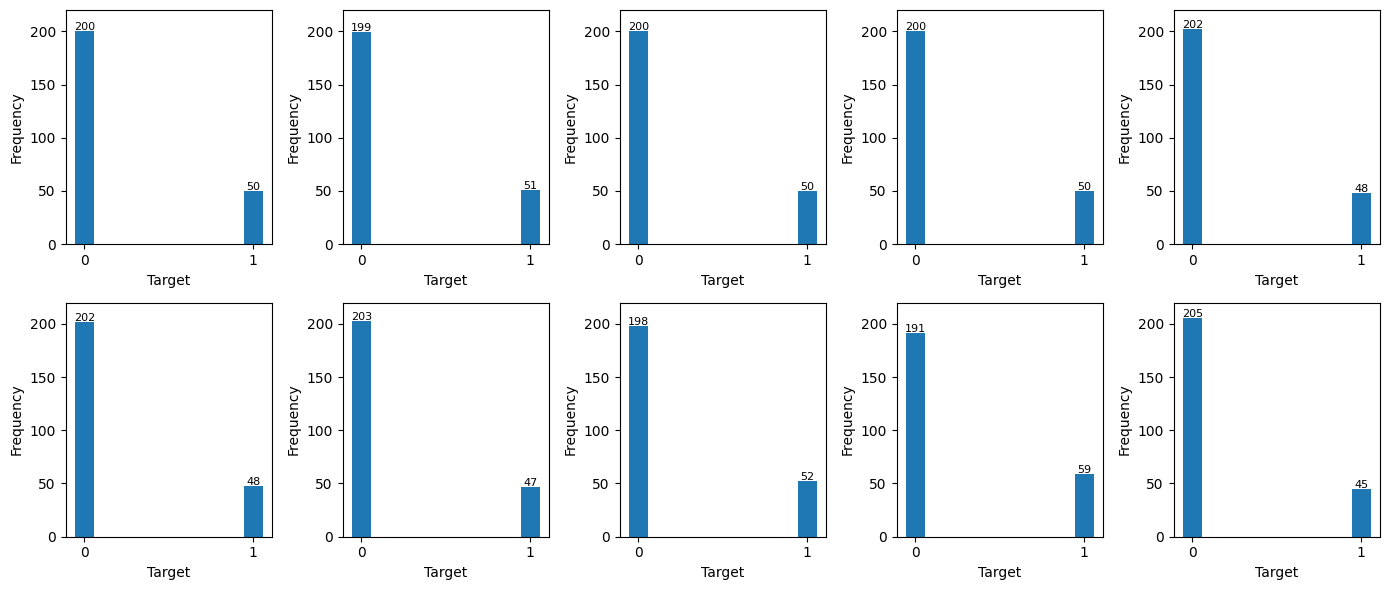

In [30]:
target = df['label_pass']
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 6))
for i, ax in enumerate(axes.ravel()):
    if i < 10:
        data = target[i*250:i*250+250]
        if len(set(data)) > 1:
            n, bins, patches = ax.hist(data)
            bins_with_bars = [bins[j] for j in range(len(patches)) if n[j] > 0]
            bar_width = bins[1] - bins[0]
            ax.set_xticks([b + bar_width/2 for b in bins_with_bars], [0,1])
            ax.set_ylim(0, 220)  # Set the y-axis limits for all subplots
            ax.set_xlabel('Target')
            ax.set_ylabel('Frequency')
            for j in range(len(patches)):
                if n[j] > 0:  # Only label bins with bars
                    ax.text(bins[j]+(bins[j+1]-bins[j])/2, n[j]+1, str(int(n[j])), ha='center', fontsize=8)
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

In [31]:
# Read in the dataset
df = pd.read_csv('data/dataset2500.csv')

# Convert the target variable to numerical values (yes' replaced with 1 and 'no' replaced with 0)
le = LabelEncoder()
df['label_pass'] = le.fit_transform(df['label_pass'])

sm = SMOTE(random_state=42)

X = df.iloc[0:250, 2:-1]
y = df.iloc[0:250, -1]
X_1, y_1= sm.fit_resample(X, y)
X = df.iloc[250:500, 2:-1]
y = df.iloc[250:500, -1]
X_2, y_2= sm.fit_resample(X, y)
X = df.iloc[500:750, 2:-1]
y = df.iloc[500:750 , -1]
X_3, y_3= sm.fit_resample(X, y)
X = df.iloc[750:1000, 2:-1]
y = df.iloc[750:1000, -1]
X_4, y_4= sm.fit_resample(X, y)
X = df.iloc[1000:1250, 2:-1]
y = df.iloc[1000:1250, -1]
X_5, y_5= sm.fit_resample(X, y)
X = df.iloc[1250:1500, 2:-1]
y = df.iloc[1250:1500, -1]
X_6, y_6= sm.fit_resample(X, y)
X = df.iloc[1500:1750, 2:-1]
y = df.iloc[1500:1750, -1]
X_7, y_7= sm.fit_resample(X, y)
X = df.iloc[1750:2000, 2:-1]
y = df.iloc[1750:2000, -1]
X_8, y_8= sm.fit_resample(X, y)
X = df.iloc[2000:2250, 2:-1]
y = df.iloc[2000:2250, -1]
X_9, y_9= sm.fit_resample(X, y)
X = df.iloc[2250:2501, 2:-1]
y = df.iloc[2250:2501, -1]
X_10, y_10= sm.fit_resample(X, y)

# Concatenate into a single dataset
oversampled_1 = pd.concat([pd.DataFrame(X_1), pd.DataFrame(y_1)], axis=1)
oversampled_2 = pd.concat([pd.DataFrame(X_2), pd.DataFrame(y_2)], axis=1)
oversampled_3 = pd.concat([pd.DataFrame(X_3), pd.DataFrame(y_3)], axis=1)
oversampled_4 = pd.concat([pd.DataFrame(X_4), pd.DataFrame(y_4)], axis=1)
oversampled_5 = pd.concat([pd.DataFrame(X_5), pd.DataFrame(y_5)], axis=1)
oversampled_6 = pd.concat([pd.DataFrame(X_6), pd.DataFrame(y_6)], axis=1)
oversampled_7 = pd.concat([pd.DataFrame(X_7), pd.DataFrame(y_7)], axis=1)
oversampled_8 = pd.concat([pd.DataFrame(X_8), pd.DataFrame(y_8)], axis=1)
oversampled_9 = pd.concat([pd.DataFrame(X_9), pd.DataFrame(y_9)], axis=1)
oversampled_10 = pd.concat([pd.DataFrame(X_10), pd.DataFrame(y_10)], axis=1)

oversampled_dataset = pd.concat([oversampled_1, oversampled_2, oversampled_3, oversampled_4, oversampled_5,
                                 oversampled_6, oversampled_7, oversampled_8, oversampled_9, oversampled_10], axis=0)

# Define a list of column names for the oversampled dataset
column_names = ['|v|_mean', '|a|_mean', 'vz_mean', 'az_mean', '|v|_std', '|a|_std', 'vz_std', 'az_std',
                '|v|_min', '|a|_min', 'vz_min', 'az_min', '|v|_max', '|a|_max', 'vz_max', 'az_max', 'label_pass']

# Assign the column names to the oversampled dataset
oversampled_dataset.columns = column_names

# Save the oversampled dataset to a CSV file
oversampled_dataset.to_csv('data/dataset4000_res.csv', index=False)

In [36]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/dataset4000_res.csv')

# Split the DataFrame into data and target arrays
data = df.iloc[:, :-1].values  # Select all columns except the last one as the data array
target = df.iloc[:, -1].values.astype(int)  # Select the last column as the target array and Convert float to int

print(df.shape)
print(data[0],target[0])

(4000, 17)
[ 9.92280521e+05  1.10162726e+07  2.78834711e+02  8.51429752e+02
  8.23538876e+05  9.00528079e+06  4.32943315e+03  3.07037583e+03
  8.43270000e+04  8.68973000e+05 -9.77300000e+03 -5.37700000e+03
  2.77541100e+06  2.86374190e+07  8.42900000e+03  9.70800000e+03] 1


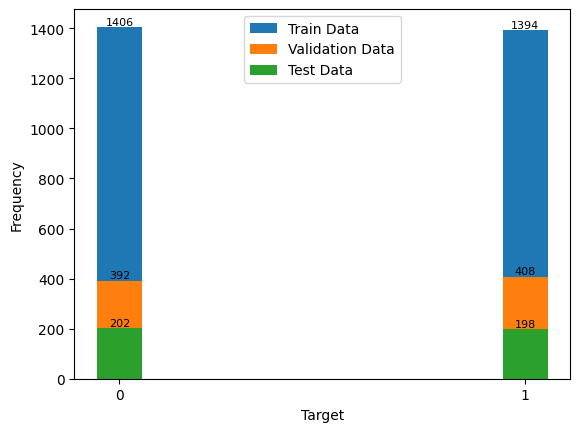

Number of tuples in Train Data: 2800
Number of tuples in Validation Data: 800
Number of tuples in Test Data: 400


In [38]:
# Split target data into 3 parts with 70%, 20%, and 10% of the tuples
split_points = np.array([0.7, 0.9]) * len(target)
split_points = split_points.astype(int)
first_part = target[:split_points[0]]
second_part = target[split_points[0]:split_points[1]]
last_part = target[split_points[1]:]

# Plot histogram of each part
n1, bins1, patches1 = plt.hist(first_part, label='Train Data')
n2, bins2, patches2 = plt.hist(second_part, label='Validation Data')
n3, bins3, patches3 = plt.hist(last_part, label='Test Data')

# Find the bins that have bars
bins_with_bars1 = [bins1[i] for i in range(len(patches1)) if n1[i] > 0]
bins_with_bars2 = [bins2[j] for j in range(len(patches2)) if n2[j] > 0]
bins_with_bars3 = [bins3[k] for k in range(len(patches3)) if n3[k] > 0]

# Calculate the bar width
bar_width1 = bins1[1] - bins1[0]
bar_width2 = bins2[1] - bins2[0]
bar_width3 = bins3[1] - bins3[0]

# Set the x-tick locations and labels for bins with bars only
plt.xticks([b + bar_width1/2 for b in bins_with_bars1], [0,1])
plt.xticks([b + bar_width2/2 for b in bins_with_bars2], [0,1])
plt.xticks([b + bar_width3/2 for b in bins_with_bars3], [0,1])

# Add text labels to each bin
for i in range(len(patches1)):
    if n1[i] > 0:  # Only label bins with bars
        plt.text(x=bins1[i]+(bins1[i+1]-bins1[i])/2, y=n1[i]+5, s=int(n1[i]), ha='center', fontsize=8)
for j in range(len(patches2)):
    if n2[j] > 0:  # Only label bins with bars
        plt.text(x=bins2[j]+(bins2[j+1]-bins2[j])/2, y=n2[j]+10, s=int(n2[j]), ha='center', fontsize=8)
for k in range(len(patches3)):
    if n3[k] > 0:  # Only label bins with bars
        plt.text(x=bins3[k]+(bins3[k+1]-bins3[k])/2, y=n3[k]+10, s=int(n3[k]), ha='center', fontsize=8)

plt.xlabel('Target')
plt.ylabel('Frequency')
plt.legend(loc='upper center')

plt.show()

# Print number of tuples in each part
print(f"Number of tuples in Train Data: {first_part.shape[0]}")
print(f"Number of tuples in Validation Data: {second_part.shape[0]}")
print(f"Number of tuples in Test Data: {last_part.shape[0]}")

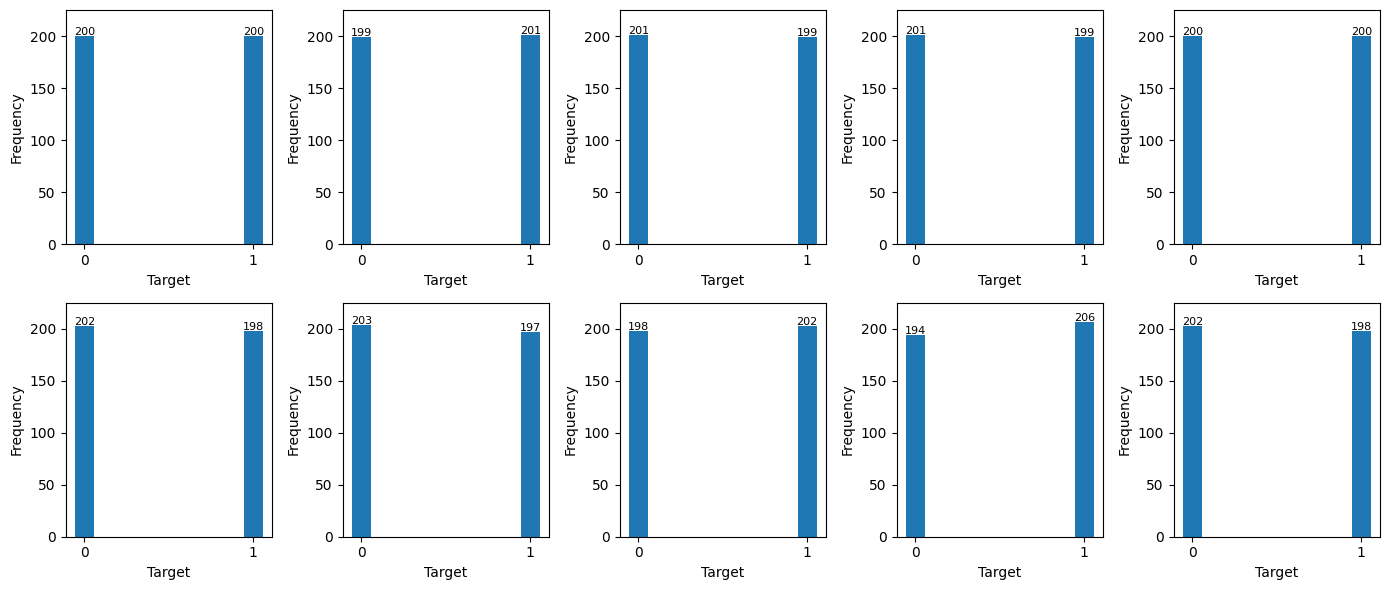

In [43]:
target = df['label_pass']
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 6))
for i, ax in enumerate(axes.ravel()):
    if i < 10:
        data = target[i*400:i*400+400]
        if len(set(data)) > 1:
            n, bins, patches = ax.hist(data)
            bins_with_bars = [bins[j] for j in range(len(patches)) if n[j] > 0]
            bar_width = bins[1] - bins[0]
            ax.set_xticks([b + bar_width/2 for b in bins_with_bars], [0,1])
            ax.set_ylim(0, 225)  # Set the y-axis limits for all subplots
            ax.set_xlabel('Target')
            ax.set_ylabel('Frequency')
            for j in range(len(patches)):
                if n[j] > 0:  # Only label bins with bars
                    ax.text(bins[j]+(bins[j+1]-bins[j])/2, n[j]+1, str(int(n[j])), ha='center', fontsize=8)
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

# Oversampling Dataset 3500 --> 6000 (smote)

In [44]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/dataset3500.csv')

# Convert the target variable to numerical values (yes' replaced with 1 and 'no' replaced with 0)
le = LabelEncoder()
df['label_pass'] = le.fit_transform(df['label_pass'])

# Split the DataFrame into data and target arrays
data = df.iloc[:, 2:-1].values  # Select all columns except the first and last ones as the data array
target = df.iloc[:, -1].values  # Select the last column as the target array

print(data[0],target[0])

[ 9.92280521e+05  1.10162726e+07  2.78834711e+02  8.51429752e+02
  8.23538876e+05  9.00528079e+06  4.32943315e+03  3.07037583e+03
  8.43270000e+04  8.68973000e+05 -9.77300000e+03 -5.37700000e+03
  2.77541100e+06  2.86374190e+07  8.42900000e+03  9.70800000e+03] 1


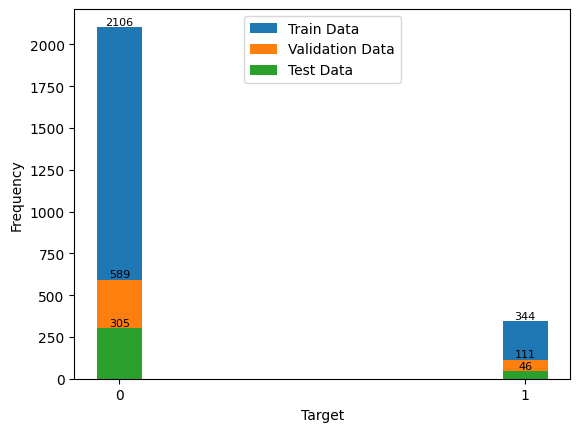

Number of tuples in Train Data: 2450
Number of tuples in Validation Data: 700
Number of tuples in Test Data: 351


In [49]:
# Split target data into 3 parts with 70%, 20%, and 10% of the tuples
split_points = np.array([0.7, 0.9]) * len(target)
split_points = split_points.astype(int)
first_part = target[:split_points[0]]
second_part = target[split_points[0]:split_points[1]]
last_part = target[split_points[1]:]

# Plot histogram of each part
n1, bins1, patches1 = plt.hist(first_part, label='Train Data')
n2, bins2, patches2 = plt.hist(second_part, label='Validation Data')
n3, bins3, patches3 = plt.hist(last_part, label='Test Data')

# Find the bins that have bars
bins_with_bars1 = [bins1[i] for i in range(len(patches1)) if n1[i] > 0]
bins_with_bars2 = [bins2[j] for j in range(len(patches2)) if n2[j] > 0]
bins_with_bars3 = [bins3[k] for k in range(len(patches3)) if n3[k] > 0]

# Calculate the bar width
bar_width1 = bins1[1] - bins1[0]
bar_width2 = bins2[1] - bins2[0]
bar_width3 = bins3[1] - bins3[0]

# Set the x-tick locations and labels for bins with bars only
plt.xticks([b + bar_width1/2 for b in bins_with_bars1], [0,1])
plt.xticks([b + bar_width2/2 for b in bins_with_bars2], [0,1])
plt.xticks([b + bar_width3/2 for b in bins_with_bars3], [0,1])

# Add text labels to each bin
for i in range(len(patches1)):
    if n1[i] > 0:  # Only label bins with bars
        plt.text(x=bins1[i]+(bins1[i+1]-bins1[i])/2, y=n1[i]+10, s=int(n1[i]), ha='center', fontsize=8)
for j in range(len(patches2)):
    if n2[j] > 0:  # Only label bins with bars
        plt.text(x=bins2[j]+(bins2[j+1]-bins2[j])/2, y=n2[j]+20, s=int(n2[j]), ha='center', fontsize=8)
for k in range(len(patches3)):
    if n3[k] > 0:  # Only label bins with bars
        plt.text(x=bins3[k]+(bins3[k+1]-bins3[k])/2, y=n3[k]+10, s=int(n3[k]), ha='center', fontsize=8)

plt.xlabel('Target')
plt.ylabel('Frequency')
plt.legend(loc='upper center')

plt.show()

# Print number of tuples in each part
print(f"Number of tuples in Train Data: {first_part.shape[0]}")
print(f"Number of tuples in Validation Data: {second_part.shape[0]}")
print(f"Number of tuples in Test Data: {last_part.shape[0]}")

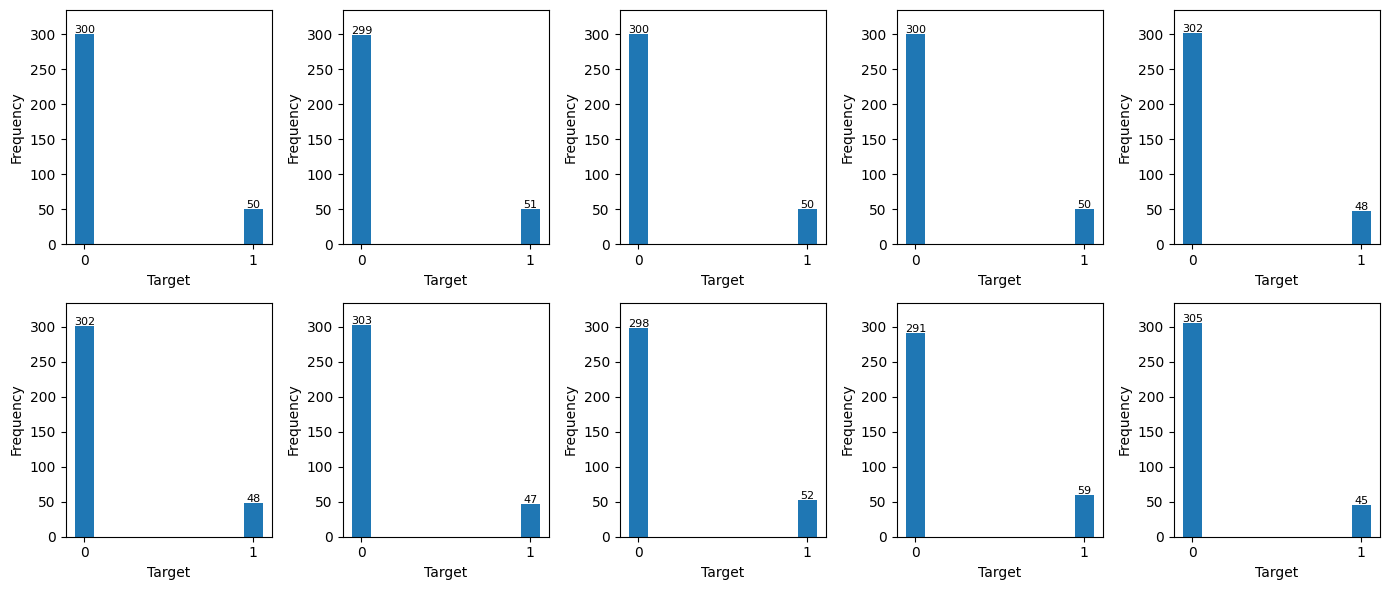

In [52]:
target = df['label_pass']
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 6))
for i, ax in enumerate(axes.ravel()):
    if i < 10:
        data = target[i*350:i*350+350]
        if len(set(data)) > 1:
            n, bins, patches = ax.hist(data)
            bins_with_bars = [bins[j] for j in range(len(patches)) if n[j] > 0]
            bar_width = bins[1] - bins[0]
            ax.set_xticks([b + bar_width/2 for b in bins_with_bars], [0,1])
            ax.set_ylim(0, 335)  # Set the y-axis limits for all subplots
            ax.set_xlabel('Target')
            ax.set_ylabel('Frequency')
            for j in range(len(patches)):
                if n[j] > 0:  # Only label bins with bars
                    ax.text(bins[j]+(bins[j+1]-bins[j])/2, n[j]+1.5, str(int(n[j])), ha='center', fontsize=8)
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

In [53]:
# Read in the dataset
df = pd.read_csv('data/dataset3500.csv')

# Convert the target variable to numerical values (yes' replaced with 1 and 'no' replaced with 0)
le = LabelEncoder()
df['label_pass'] = le.fit_transform(df['label_pass'])

sm = SMOTE(random_state=42)

X = df.iloc[0:350, 2:-1]
y = df.iloc[0:350, -1]
X_1, y_1= sm.fit_resample(X, y)
X = df.iloc[350:700, 2:-1]
y = df.iloc[350:700, -1]
X_2, y_2= sm.fit_resample(X, y)
X = df.iloc[700:1050, 2:-1]
y = df.iloc[700:1050 , -1]
X_3, y_3= sm.fit_resample(X, y)
X = df.iloc[1050:1400, 2:-1]
y = df.iloc[1050:1400, -1]
X_4, y_4= sm.fit_resample(X, y)
X = df.iloc[1400:1750, 2:-1]
y = df.iloc[1400:1750, -1]
X_5, y_5= sm.fit_resample(X, y)
X = df.iloc[1750:2100, 2:-1]
y = df.iloc[1750:2100, -1]
X_6, y_6= sm.fit_resample(X, y)
X = df.iloc[2100:2450, 2:-1]
y = df.iloc[2100:2450, -1]
X_7, y_7= sm.fit_resample(X, y)
X = df.iloc[2450:2800, 2:-1]
y = df.iloc[2450:2800, -1]
X_8, y_8= sm.fit_resample(X, y)
X = df.iloc[2800:3150, 2:-1]
y = df.iloc[2800:3150, -1]
X_9, y_9= sm.fit_resample(X, y)
X = df.iloc[3150:3501, 2:-1]
y = df.iloc[3150:3501, -1]
X_10, y_10= sm.fit_resample(X, y)

# Concatenate into a single dataset
oversampled_1 = pd.concat([pd.DataFrame(X_1), pd.DataFrame(y_1)], axis=1)
oversampled_2 = pd.concat([pd.DataFrame(X_2), pd.DataFrame(y_2)], axis=1)
oversampled_3 = pd.concat([pd.DataFrame(X_3), pd.DataFrame(y_3)], axis=1)
oversampled_4 = pd.concat([pd.DataFrame(X_4), pd.DataFrame(y_4)], axis=1)
oversampled_5 = pd.concat([pd.DataFrame(X_5), pd.DataFrame(y_5)], axis=1)
oversampled_6 = pd.concat([pd.DataFrame(X_6), pd.DataFrame(y_6)], axis=1)
oversampled_7 = pd.concat([pd.DataFrame(X_7), pd.DataFrame(y_7)], axis=1)
oversampled_8 = pd.concat([pd.DataFrame(X_8), pd.DataFrame(y_8)], axis=1)
oversampled_9 = pd.concat([pd.DataFrame(X_9), pd.DataFrame(y_9)], axis=1)
oversampled_10 = pd.concat([pd.DataFrame(X_10), pd.DataFrame(y_10)], axis=1)

oversampled_dataset = pd.concat([oversampled_1, oversampled_2, oversampled_3, oversampled_4, oversampled_5,
                                 oversampled_6, oversampled_7, oversampled_8, oversampled_9, oversampled_10], axis=0)

# Define a list of column names for the oversampled dataset
column_names = ['|v|_mean', '|a|_mean', 'vz_mean', 'az_mean', '|v|_std', '|a|_std', 'vz_std', 'az_std',
                '|v|_min', '|a|_min', 'vz_min', 'az_min', '|v|_max', '|a|_max', 'vz_max', 'az_max', 'label_pass']

# Assign the column names to the oversampled dataset
oversampled_dataset.columns = column_names

# Save the oversampled dataset to a CSV file
oversampled_dataset.to_csv('data/dataset6000_res.csv', index=False)

In [158]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/dataset6000_res.csv')

# Split the DataFrame into data and target arrays
data = df.iloc[:, :-1].values  # Select all columns except the last one as the data array
target = df.iloc[:, -1].values.astype(int)  # Select the last column as the target array and Convert float to int

print(df.shape)
print(data[0],target[0])

(6000, 17)
[ 9.92280521e+05  1.10162726e+07  2.78834711e+02  8.51429752e+02
  8.23538876e+05  9.00528079e+06  4.32943315e+03  3.07037583e+03
  8.43270000e+04  8.68973000e+05 -9.77300000e+03 -5.37700000e+03
  2.77541100e+06  2.86374190e+07  8.42900000e+03  9.70800000e+03] 1


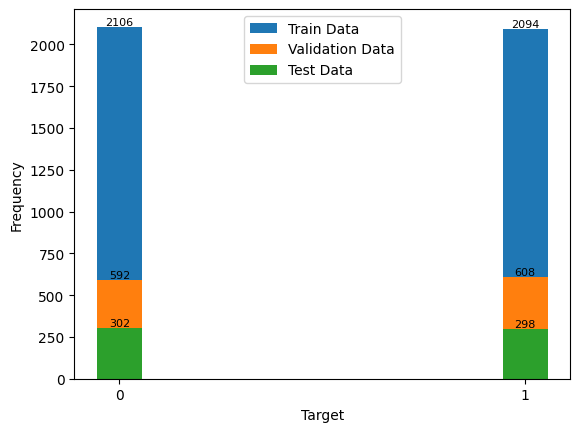

Number of tuples in Train Data: 4200
Number of tuples in Validation Data: 1200
Number of tuples in Test Data: 600


In [56]:
# Split target data into 3 parts with 70%, 20%, and 10% of the tuples
split_points = np.array([0.7, 0.9]) * len(target)
split_points = split_points.astype(int)
first_part = target[:split_points[0]]
second_part = target[split_points[0]:split_points[1]]
last_part = target[split_points[1]:]

# Plot histogram of each part
n1, bins1, patches1 = plt.hist(first_part, label='Train Data')
n2, bins2, patches2 = plt.hist(second_part, label='Validation Data')
n3, bins3, patches3 = plt.hist(last_part, label='Test Data')

# Find the bins that have bars
bins_with_bars1 = [bins1[i] for i in range(len(patches1)) if n1[i] > 0]
bins_with_bars2 = [bins2[j] for j in range(len(patches2)) if n2[j] > 0]
bins_with_bars3 = [bins3[k] for k in range(len(patches3)) if n3[k] > 0]

# Calculate the bar width
bar_width1 = bins1[1] - bins1[0]
bar_width2 = bins2[1] - bins2[0]
bar_width3 = bins3[1] - bins3[0]

# Set the x-tick locations and labels for bins with bars only
plt.xticks([b + bar_width1/2 for b in bins_with_bars1], [0,1])
plt.xticks([b + bar_width2/2 for b in bins_with_bars2], [0,1])
plt.xticks([b + bar_width3/2 for b in bins_with_bars3], [0,1])

# Add text labels to each bin
for i in range(len(patches1)):
    if n1[i] > 0:  # Only label bins with bars
        plt.text(x=bins1[i]+(bins1[i+1]-bins1[i])/2, y=n1[i]+10, s=int(n1[i]), ha='center', fontsize=8)
for j in range(len(patches2)):
    if n2[j] > 0:  # Only label bins with bars
        plt.text(x=bins2[j]+(bins2[j+1]-bins2[j])/2, y=n2[j]+10, s=int(n2[j]), ha='center', fontsize=8)
for k in range(len(patches3)):
    if n3[k] > 0:  # Only label bins with bars
        plt.text(x=bins3[k]+(bins3[k+1]-bins3[k])/2, y=n3[k]+10, s=int(n3[k]), ha='center', fontsize=8)

plt.xlabel('Target')
plt.ylabel('Frequency')
plt.legend(loc='upper center')

plt.show()

# Print number of tuples in each part
print(f"Number of tuples in Train Data: {first_part.shape[0]}")
print(f"Number of tuples in Validation Data: {second_part.shape[0]}")
print(f"Number of tuples in Test Data: {last_part.shape[0]}")

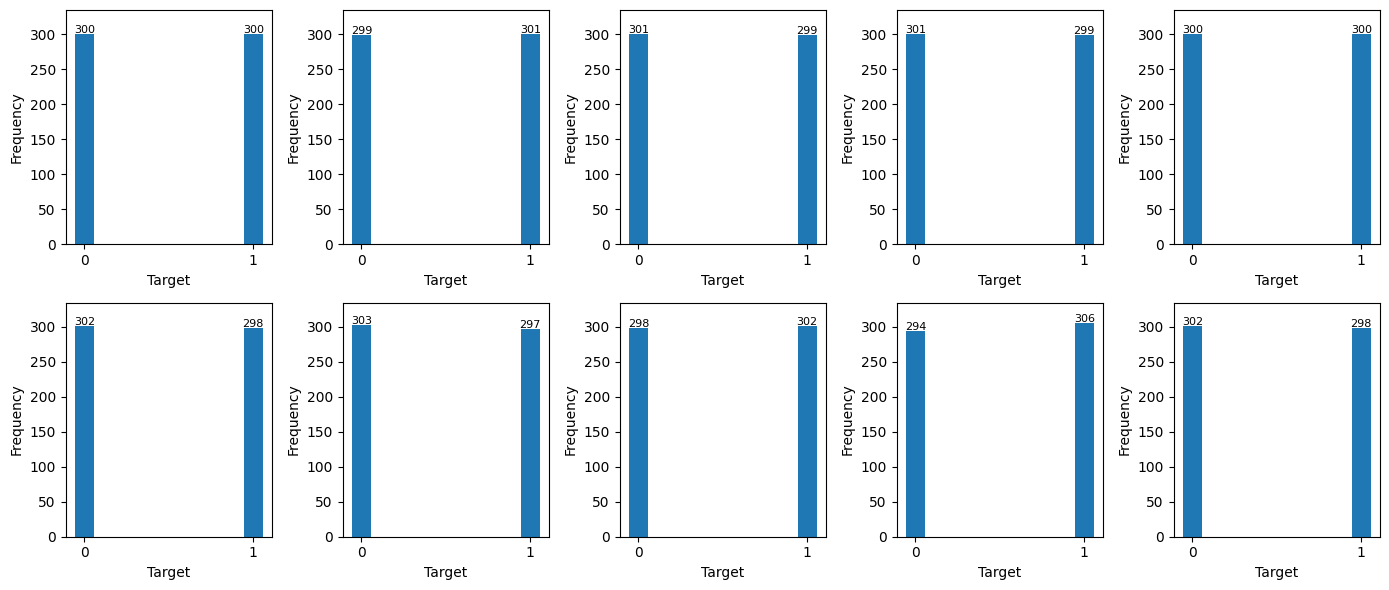

In [60]:
target = df['label_pass']
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 6))
for i, ax in enumerate(axes.ravel()):
    if i < 10:
        data = target[i*600:i*600+600]
        if len(set(data)) > 1:
            n, bins, patches = ax.hist(data)
            bins_with_bars = [bins[j] for j in range(len(patches)) if n[j] > 0]
            bar_width = bins[1] - bins[0]
            ax.set_xticks([b + bar_width/2 for b in bins_with_bars], [0,1])
            ax.set_ylim(0, 335)  # Set the y-axis limits for all subplots
            ax.set_xlabel('Target')
            ax.set_ylabel('Frequency')
            for j in range(len(patches)):
                if n[j] > 0:  # Only label bins with bars
                    ax.text(bins[j]+(bins[j+1]-bins[j])/2, n[j]+1.5, str(int(n[j])), ha='center', fontsize=8)
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

# Oversampling Dataset 4500 --> 8000 (smote)

In [75]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/dataset4500.csv')

# Convert the target variable to numerical values (yes' replaced with 1 and 'no' replaced with 0)
le = LabelEncoder()
df['label_pass'] = le.fit_transform(df['label_pass'])

# Split the DataFrame into data and target arrays
data = df.iloc[:, 2:-1].values  # Select all columns except the first and last ones as the data array
target = df.iloc[:, -1].values  # Select the last column as the target array

print(data[0],target[0])

[ 9.92280521e+05  1.10162726e+07  2.78834711e+02  8.51429752e+02
  8.23538876e+05  9.00528079e+06  4.32943315e+03  3.07037583e+03
  8.43270000e+04  8.68973000e+05 -9.77300000e+03 -5.37700000e+03
  2.77541100e+06  2.86374190e+07  8.42900000e+03  9.70800000e+03] 1


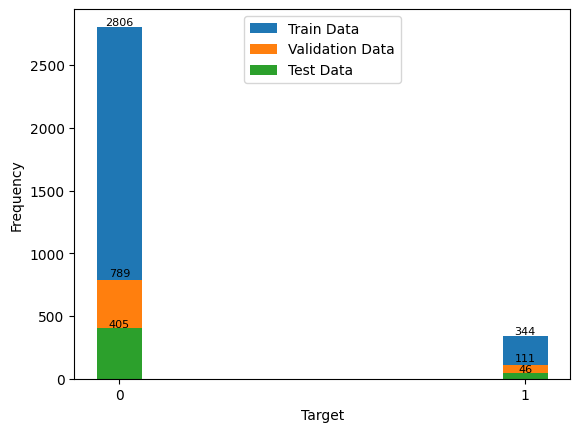

Number of tuples in Train Data: 3150
Number of tuples in Validation Data: 900
Number of tuples in Test Data: 451


In [76]:
# Split target data into 3 parts with 70%, 20%, and 10% of the tuples
split_points = np.array([0.7, 0.9]) * len(target)
split_points = split_points.astype(int)
first_part = target[:split_points[0]]
second_part = target[split_points[0]:split_points[1]]
last_part = target[split_points[1]:]

# Plot histogram of each part
n1, bins1, patches1 = plt.hist(first_part, label='Train Data')
n2, bins2, patches2 = plt.hist(second_part, label='Validation Data')
n3, bins3, patches3 = plt.hist(last_part, label='Test Data')

# Find the bins that have bars
bins_with_bars1 = [bins1[i] for i in range(len(patches1)) if n1[i] > 0]
bins_with_bars2 = [bins2[j] for j in range(len(patches2)) if n2[j] > 0]
bins_with_bars3 = [bins3[k] for k in range(len(patches3)) if n3[k] > 0]

# Calculate the bar width
bar_width1 = bins1[1] - bins1[0]
bar_width2 = bins2[1] - bins2[0]
bar_width3 = bins3[1] - bins3[0]

# Set the x-tick locations and labels for bins with bars only
plt.xticks([b + bar_width1/2 for b in bins_with_bars1], [0,1])
plt.xticks([b + bar_width2/2 for b in bins_with_bars2], [0,1])
plt.xticks([b + bar_width3/2 for b in bins_with_bars3], [0,1])

# Add text labels to each bin
for i in range(len(patches1)):
    if n1[i] > 0:  # Only label bins with bars
        plt.text(x=bins1[i]+(bins1[i+1]-bins1[i])/2, y=n1[i]+10, s=int(n1[i]), ha='center', fontsize=8)
for j in range(len(patches2)):
    if n2[j] > 0:  # Only label bins with bars
        plt.text(x=bins2[j]+(bins2[j+1]-bins2[j])/2, y=n2[j]+30, s=int(n2[j]), ha='center', fontsize=8)
for k in range(len(patches3)):
    if n3[k] > 0:  # Only label bins with bars
        plt.text(x=bins3[k]+(bins3[k+1]-bins3[k])/2, y=n3[k]+5, s=int(n3[k]), ha='center', fontsize=8)

plt.xlabel('Target')
plt.ylabel('Frequency')
plt.legend(loc='upper center')

plt.show()

# Print number of tuples in each part
print(f"Number of tuples in Train Data: {first_part.shape[0]}")
print(f"Number of tuples in Validation Data: {second_part.shape[0]}")
print(f"Number of tuples in Test Data: {last_part.shape[0]}")

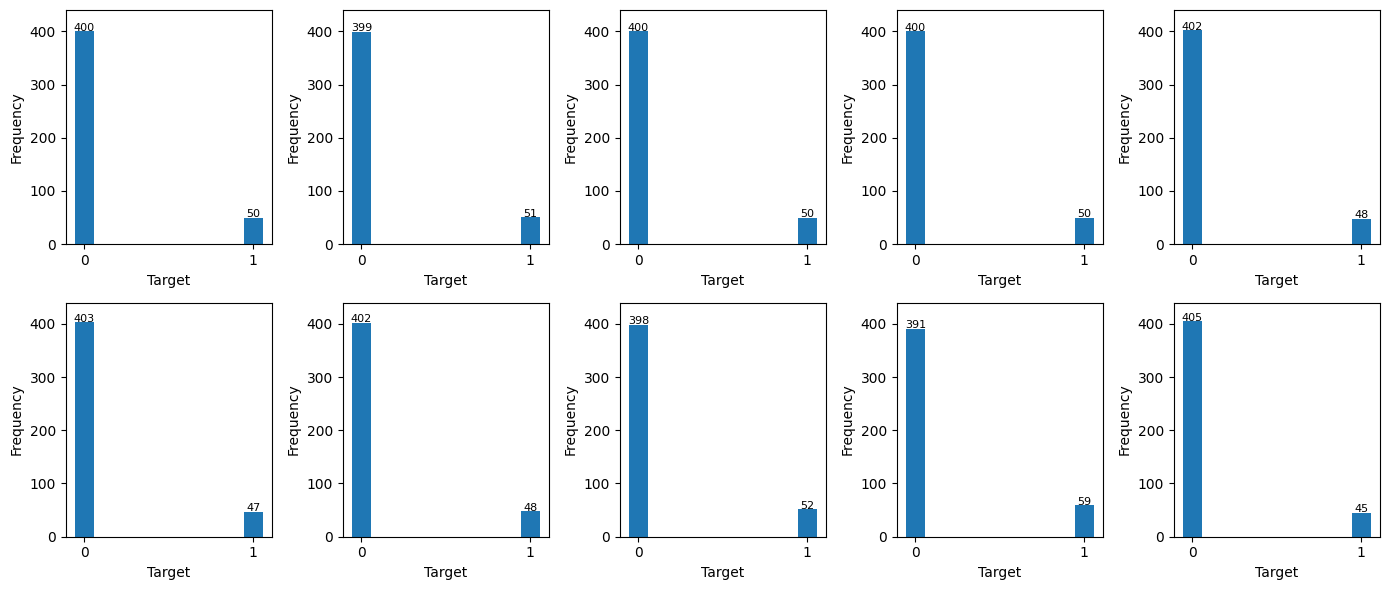

In [77]:
target = df['label_pass']
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 6))
for i, ax in enumerate(axes.ravel()):
    if i < 10:
        data = target[i*450:i*450+450]
        if len(set(data)) > 1:
            n, bins, patches = ax.hist(data)
            bins_with_bars = [bins[j] for j in range(len(patches)) if n[j] > 0]
            bar_width = bins[1] - bins[0]
            ax.set_xticks([b + bar_width/2 for b in bins_with_bars], [0,1])
            ax.set_ylim(0, 440)  # Set the y-axis limits for all subplots
            ax.set_xlabel('Target')
            ax.set_ylabel('Frequency')
            for j in range(len(patches)):
                if n[j] > 0:  # Only label bins with bars
                    ax.text(bins[j]+(bins[j+1]-bins[j])/2, n[j]+1, str(int(n[j])), ha='center', fontsize=8)
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

In [78]:
# Read in the dataset
df = pd.read_csv('data/dataset4500.csv')

# Convert the target variable to numerical values (yes' replaced with 1 and 'no' replaced with 0)
le = LabelEncoder()
df['label_pass'] = le.fit_transform(df['label_pass'])

sm = SMOTE(random_state=42)

X = df.iloc[0:450, 2:-1]
y = df.iloc[0:450, -1]
X_1, y_1= sm.fit_resample(X, y)
X = df.iloc[450:900, 2:-1]
y = df.iloc[450:900, -1]
X_2, y_2= sm.fit_resample(X, y)
X = df.iloc[900:1350, 2:-1]
y = df.iloc[900:1350 , -1]
X_3, y_3= sm.fit_resample(X, y)
X = df.iloc[1350:1800, 2:-1]
y = df.iloc[1350:1800, -1]
X_4, y_4= sm.fit_resample(X, y)
X = df.iloc[1800:2250, 2:-1]
y = df.iloc[1800:2250, -1]
X_5, y_5= sm.fit_resample(X, y)
X = df.iloc[2250:2700, 2:-1]
y = df.iloc[2250:2700, -1]
X_6, y_6= sm.fit_resample(X, y)
X = df.iloc[2700:3150, 2:-1]
y = df.iloc[2700:3150, -1]
X_7, y_7= sm.fit_resample(X, y)
X = df.iloc[3150:3600, 2:-1]
y = df.iloc[3150:3600, -1]
X_8, y_8= sm.fit_resample(X, y)
X = df.iloc[3600:4050, 2:-1]
y = df.iloc[3600:4050, -1]
X_9, y_9= sm.fit_resample(X, y)
X = df.iloc[4050:4501, 2:-1]
y = df.iloc[4050:4501, -1]
X_10, y_10= sm.fit_resample(X, y)

# Concatenate into a single dataset
oversampled_1 = pd.concat([pd.DataFrame(X_1), pd.DataFrame(y_1)], axis=1)
oversampled_2 = pd.concat([pd.DataFrame(X_2), pd.DataFrame(y_2)], axis=1)
oversampled_3 = pd.concat([pd.DataFrame(X_3), pd.DataFrame(y_3)], axis=1)
oversampled_4 = pd.concat([pd.DataFrame(X_4), pd.DataFrame(y_4)], axis=1)
oversampled_5 = pd.concat([pd.DataFrame(X_5), pd.DataFrame(y_5)], axis=1)
oversampled_6 = pd.concat([pd.DataFrame(X_6), pd.DataFrame(y_6)], axis=1)
oversampled_7 = pd.concat([pd.DataFrame(X_7), pd.DataFrame(y_7)], axis=1)
oversampled_8 = pd.concat([pd.DataFrame(X_8), pd.DataFrame(y_8)], axis=1)
oversampled_9 = pd.concat([pd.DataFrame(X_9), pd.DataFrame(y_9)], axis=1)
oversampled_10 = pd.concat([pd.DataFrame(X_10), pd.DataFrame(y_10)], axis=1)

oversampled_dataset = pd.concat([oversampled_1, oversampled_2, oversampled_3, oversampled_4, oversampled_5,
                                 oversampled_6, oversampled_7, oversampled_8, oversampled_9, oversampled_10], axis=0)

# Define a list of column names for the oversampled dataset
column_names = ['|v|_mean', '|a|_mean', 'vz_mean', 'az_mean', '|v|_std', '|a|_std', 'vz_std', 'az_std',
                '|v|_min', '|a|_min', 'vz_min', 'az_min', '|v|_max', '|a|_max', 'vz_max', 'az_max', 'label_pass']

# Assign the column names to the oversampled dataset
oversampled_dataset.columns = column_names

# Save the oversampled dataset to a CSV file
oversampled_dataset.to_csv('data/dataset8000_res.csv', index=False)

In [159]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/dataset8000_res.csv')

# Split the DataFrame into data and target arrays
data = df.iloc[:, :-1].values  # Select all columns except the last one as the data array
target = df.iloc[:, -1].values.astype(int)  # Select the last column as the target array and Convert float to int

print(df.shape)
print(data[0],target[0])

(8000, 17)
[ 9.92280521e+05  1.10162726e+07  2.78834711e+02  8.51429752e+02
  8.23538876e+05  9.00528079e+06  4.32943315e+03  3.07037583e+03
  8.43270000e+04  8.68973000e+05 -9.77300000e+03 -5.37700000e+03
  2.77541100e+06  2.86374190e+07  8.42900000e+03  9.70800000e+03] 1


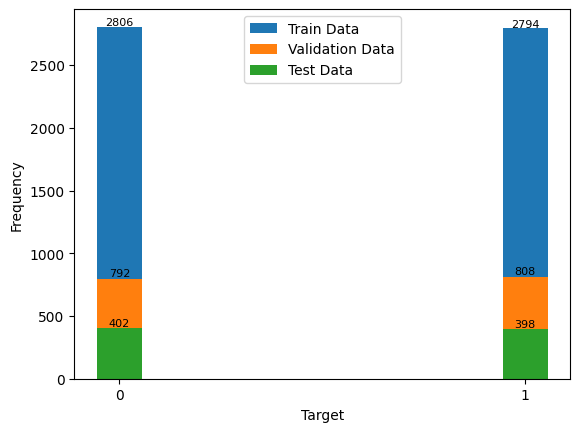

Number of tuples in Train Data: 5600
Number of tuples in Validation Data: 1600
Number of tuples in Test Data: 800


In [82]:
# Split target data into 3 parts with 70%, 20%, and 10% of the tuples
split_points = np.array([0.7, 0.9]) * len(target)
split_points = split_points.astype(int)
first_part = target[:split_points[0]]
second_part = target[split_points[0]:split_points[1]]
last_part = target[split_points[1]:]

# Plot histogram of each part
n1, bins1, patches1 = plt.hist(first_part, label='Train Data')
n2, bins2, patches2 = plt.hist(second_part, label='Validation Data')
n3, bins3, patches3 = plt.hist(last_part, label='Test Data')

# Find the bins that have bars
bins_with_bars1 = [bins1[i] for i in range(len(patches1)) if n1[i] > 0]
bins_with_bars2 = [bins2[j] for j in range(len(patches2)) if n2[j] > 0]
bins_with_bars3 = [bins3[k] for k in range(len(patches3)) if n3[k] > 0]

# Calculate the bar width
bar_width1 = bins1[1] - bins1[0]
bar_width2 = bins2[1] - bins2[0]
bar_width3 = bins3[1] - bins3[0]

# Set the x-tick locations and labels for bins with bars only
plt.xticks([b + bar_width1/2 for b in bins_with_bars1], [0,1])
plt.xticks([b + bar_width2/2 for b in bins_with_bars2], [0,1])
plt.xticks([b + bar_width3/2 for b in bins_with_bars3], [0,1])

# Add text labels to each bin
for i in range(len(patches1)):
    if n1[i] > 0:  # Only label bins with bars
        plt.text(x=bins1[i]+(bins1[i+1]-bins1[i])/2, y=n1[i]+10, s=int(n1[i]), ha='center', fontsize=8)
for j in range(len(patches2)):
    if n2[j] > 0:  # Only label bins with bars
        plt.text(x=bins2[j]+(bins2[j+1]-bins2[j])/2, y=n2[j]+25, s=int(n2[j]), ha='center', fontsize=8)
for k in range(len(patches3)):
    if n3[k] > 0:  # Only label bins with bars
        plt.text(x=bins3[k]+(bins3[k+1]-bins3[k])/2, y=n3[k]+15, s=int(n3[k]), ha='center', fontsize=8)

plt.xlabel('Target')
plt.ylabel('Frequency')
plt.legend(loc='upper center')

plt.show()

# Print number of tuples in each part
print(f"Number of tuples in Train Data: {first_part.shape[0]}")
print(f"Number of tuples in Validation Data: {second_part.shape[0]}")
print(f"Number of tuples in Test Data: {last_part.shape[0]}")

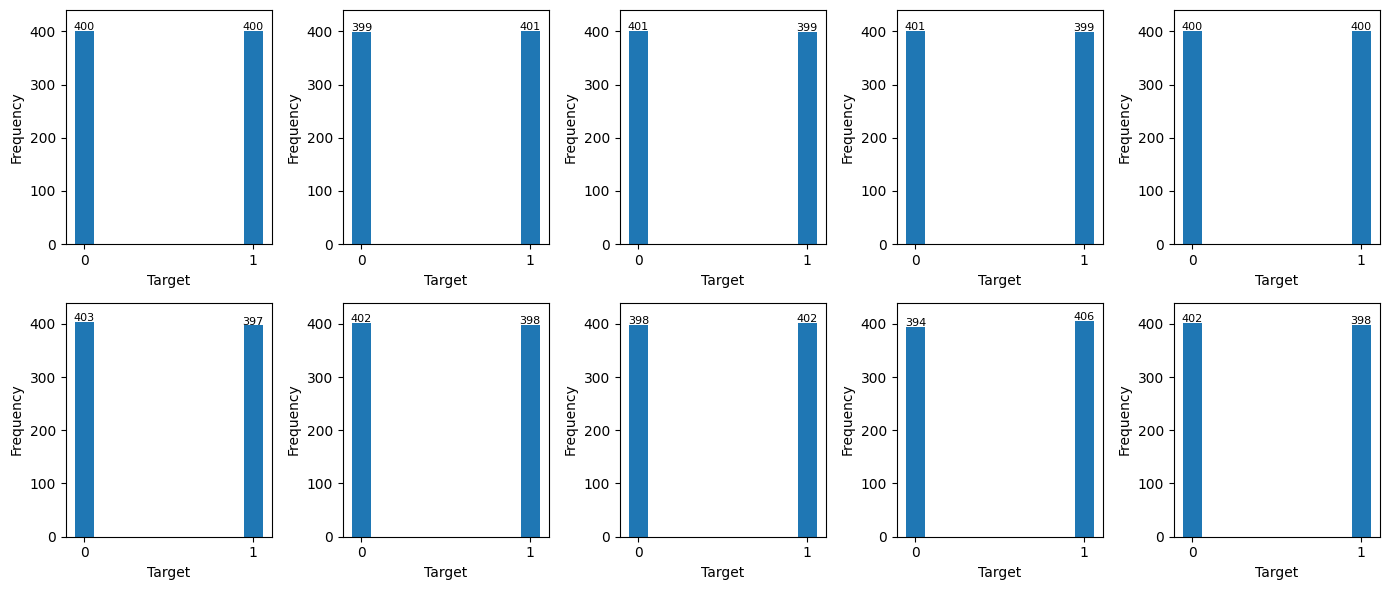

In [85]:
target = df['label_pass']
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 6))
for i, ax in enumerate(axes.ravel()):
    if i < 10:
        data = target[i*800:i*800+800]
        if len(set(data)) > 1:
            n, bins, patches = ax.hist(data)
            bins_with_bars = [bins[j] for j in range(len(patches)) if n[j] > 0]
            bar_width = bins[1] - bins[0]
            ax.set_xticks([b + bar_width/2 for b in bins_with_bars], [0,1])
            ax.set_ylim(0, 440)  # Set the y-axis limits for all subplots
            ax.set_xlabel('Target')
            ax.set_ylabel('Frequency')
            for j in range(len(patches)):
                if n[j] > 0:  # Only label bins with bars
                    ax.text(bins[j]+(bins[j+1]-bins[j])/2, n[j]+1.5, str(int(n[j])), ha='center', fontsize=8)
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

# Oversampling Dataset 5500 --> 10000 (smote)

In [86]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/dataset5500.csv')

# Convert the target variable to numerical values (yes' replaced with 1 and 'no' replaced with 0)
le = LabelEncoder()
df['label_pass'] = le.fit_transform(df['label_pass'])

# Split the DataFrame into data and target arrays
data = df.iloc[:, 2:-1].values  # Select all columns except the first and last ones as the data array
target = df.iloc[:, -1].values  # Select the last column as the target array

print(data[0],target[0])

[ 9.92280521e+05  1.10162726e+07  2.78834711e+02  8.51429752e+02
  8.23538876e+05  9.00528079e+06  4.32943315e+03  3.07037583e+03
  8.43270000e+04  8.68973000e+05 -9.77300000e+03 -5.37700000e+03
  2.77541100e+06  2.86374190e+07  8.42900000e+03  9.70800000e+03] 1


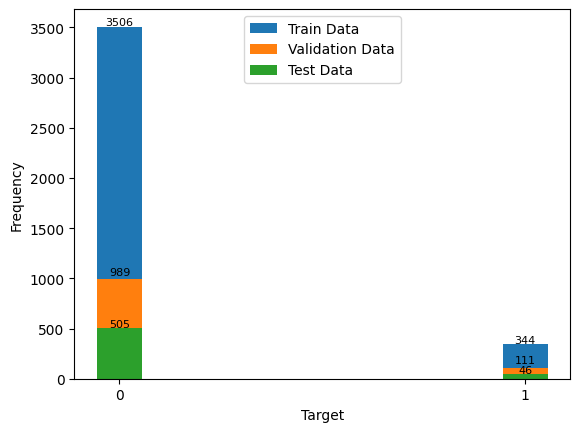

Number of tuples in Train Data: 3850
Number of tuples in Validation Data: 1100
Number of tuples in Test Data: 551


In [89]:
# Split target data into 3 parts with 70%, 20%, and 10% of the tuples
split_points = np.array([0.7, 0.9]) * len(target)
split_points = split_points.astype(int)
first_part = target[:split_points[0]]
second_part = target[split_points[0]:split_points[1]]
last_part = target[split_points[1]:]

# Plot histogram of each part
n1, bins1, patches1 = plt.hist(first_part, label='Train Data')
n2, bins2, patches2 = plt.hist(second_part, label='Validation Data')
n3, bins3, patches3 = plt.hist(last_part, label='Test Data')

# Find the bins that have bars
bins_with_bars1 = [bins1[i] for i in range(len(patches1)) if n1[i] > 0]
bins_with_bars2 = [bins2[j] for j in range(len(patches2)) if n2[j] > 0]
bins_with_bars3 = [bins3[k] for k in range(len(patches3)) if n3[k] > 0]

# Calculate the bar width
bar_width1 = bins1[1] - bins1[0]
bar_width2 = bins2[1] - bins2[0]
bar_width3 = bins3[1] - bins3[0]

# Set the x-tick locations and labels for bins with bars only
plt.xticks([b + bar_width1/2 for b in bins_with_bars1], [0,1])
plt.xticks([b + bar_width2/2 for b in bins_with_bars2], [0,1])
plt.xticks([b + bar_width3/2 for b in bins_with_bars3], [0,1])

# Add text labels to each bin
for i in range(len(patches1)):
    if n1[i] > 0:  # Only label bins with bars
        plt.text(x=bins1[i]+(bins1[i+1]-bins1[i])/2, y=n1[i]+15, s=int(n1[i]), ha='center', fontsize=8)
for j in range(len(patches2)):
    if n2[j] > 0:  # Only label bins with bars
        plt.text(x=bins2[j]+(bins2[j+1]-bins2[j])/2, y=n2[j]+40, s=int(n2[j]), ha='center', fontsize=8)
for k in range(len(patches3)):
    if n3[k] > 0:  # Only label bins with bars
        plt.text(x=bins3[k]+(bins3[k+1]-bins3[k])/2, y=n3[k]+5, s=int(n3[k]), ha='center', fontsize=8)

plt.xlabel('Target')
plt.ylabel('Frequency')
plt.legend(loc='upper center')

plt.show()

# Print number of tuples in each part
print(f"Number of tuples in Train Data: {first_part.shape[0]}")
print(f"Number of tuples in Validation Data: {second_part.shape[0]}")
print(f"Number of tuples in Test Data: {last_part.shape[0]}")

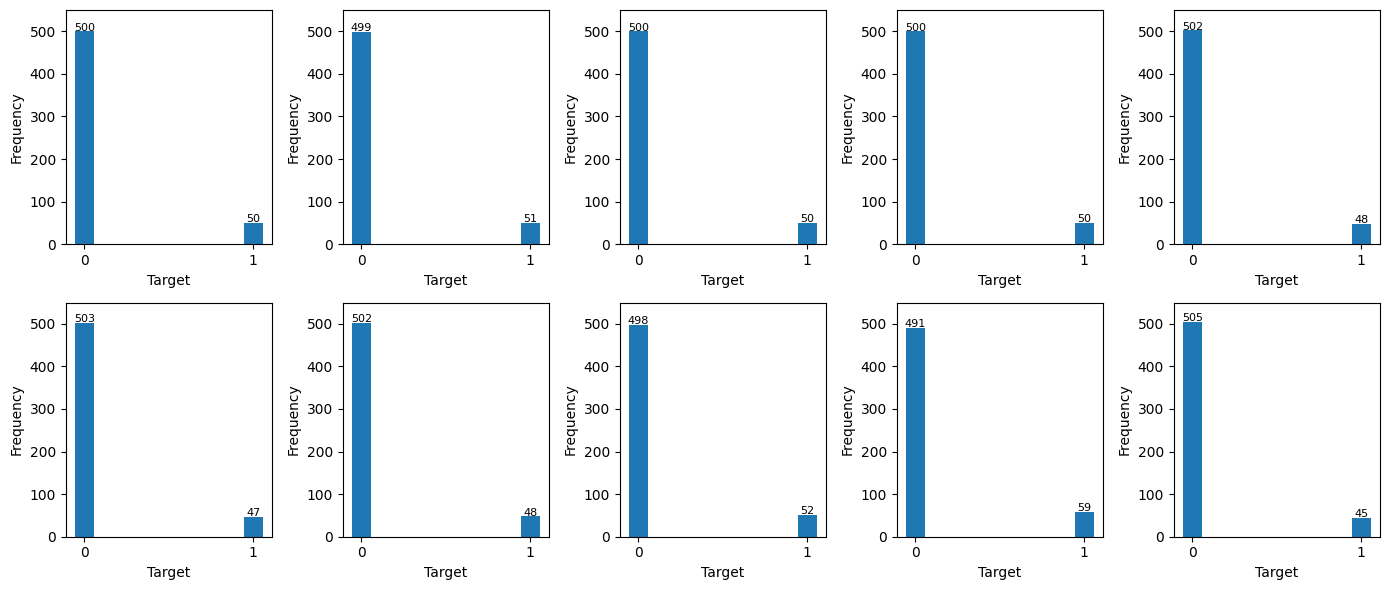

In [92]:
target = df['label_pass']
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 6))
for i, ax in enumerate(axes.ravel()):
    if i < 10:
        data = target[i*550:i*550+550]
        if len(set(data)) > 1:
            n, bins, patches = ax.hist(data)
            bins_with_bars = [bins[j] for j in range(len(patches)) if n[j] > 0]
            bar_width = bins[1] - bins[0]
            ax.set_xticks([b + bar_width/2 for b in bins_with_bars], [0,1])
            ax.set_ylim(0, 550)  # Set the y-axis limits for all subplots
            ax.set_xlabel('Target')
            ax.set_ylabel('Frequency')
            for j in range(len(patches)):
                if n[j] > 0:  # Only label bins with bars
                    ax.text(bins[j]+(bins[j+1]-bins[j])/2, n[j]+1.5, str(int(n[j])), ha='center', fontsize=8)
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

In [93]:
# Read in the dataset
df = pd.read_csv('data/dataset5500.csv')

# Convert the target variable to numerical values (yes' replaced with 1 and 'no' replaced with 0)
le = LabelEncoder()
df['label_pass'] = le.fit_transform(df['label_pass'])

sm = SMOTE(random_state=42)

X = df.iloc[0:550, 2:-1]
y = df.iloc[0:550, -1]
X_1, y_1= sm.fit_resample(X, y)
X = df.iloc[550:1100, 2:-1]
y = df.iloc[550:1100, -1]
X_2, y_2= sm.fit_resample(X, y)
X = df.iloc[1100:1650, 2:-1]
y = df.iloc[1100:1650 , -1]
X_3, y_3= sm.fit_resample(X, y)
X = df.iloc[1650:2200, 2:-1]
y = df.iloc[1650:2200, -1]
X_4, y_4= sm.fit_resample(X, y)
X = df.iloc[2200:2750, 2:-1]
y = df.iloc[2200:2750, -1]
X_5, y_5= sm.fit_resample(X, y)
X = df.iloc[2750:3300, 2:-1]
y = df.iloc[2750:3300, -1]
X_6, y_6= sm.fit_resample(X, y)
X = df.iloc[3300:3850, 2:-1]
y = df.iloc[3300:3850, -1]
X_7, y_7= sm.fit_resample(X, y)
X = df.iloc[3850:4400, 2:-1]
y = df.iloc[3850:4400, -1]
X_8, y_8= sm.fit_resample(X, y)
X = df.iloc[4400:4950, 2:-1]
y = df.iloc[4400:4950, -1]
X_9, y_9= sm.fit_resample(X, y)
X = df.iloc[4950:5501, 2:-1]
y = df.iloc[4950:5501, -1]
X_10, y_10= sm.fit_resample(X, y)

# Concatenate into a single dataset
oversampled_1 = pd.concat([pd.DataFrame(X_1), pd.DataFrame(y_1)], axis=1)
oversampled_2 = pd.concat([pd.DataFrame(X_2), pd.DataFrame(y_2)], axis=1)
oversampled_3 = pd.concat([pd.DataFrame(X_3), pd.DataFrame(y_3)], axis=1)
oversampled_4 = pd.concat([pd.DataFrame(X_4), pd.DataFrame(y_4)], axis=1)
oversampled_5 = pd.concat([pd.DataFrame(X_5), pd.DataFrame(y_5)], axis=1)
oversampled_6 = pd.concat([pd.DataFrame(X_6), pd.DataFrame(y_6)], axis=1)
oversampled_7 = pd.concat([pd.DataFrame(X_7), pd.DataFrame(y_7)], axis=1)
oversampled_8 = pd.concat([pd.DataFrame(X_8), pd.DataFrame(y_8)], axis=1)
oversampled_9 = pd.concat([pd.DataFrame(X_9), pd.DataFrame(y_9)], axis=1)
oversampled_10 = pd.concat([pd.DataFrame(X_10), pd.DataFrame(y_10)], axis=1)

oversampled_dataset = pd.concat([oversampled_1, oversampled_2, oversampled_3, oversampled_4, oversampled_5,
                                 oversampled_6, oversampled_7, oversampled_8, oversampled_9, oversampled_10], axis=0)

# Define a list of column names for the oversampled dataset
column_names = ['|v|_mean', '|a|_mean', 'vz_mean', 'az_mean', '|v|_std', '|a|_std', 'vz_std', 'az_std',
                '|v|_min', '|a|_min', 'vz_min', 'az_min', '|v|_max', '|a|_max', 'vz_max', 'az_max', 'label_pass']

# Assign the column names to the oversampled dataset
oversampled_dataset.columns = column_names

# Save the oversampled dataset to a CSV file
oversampled_dataset.to_csv('data/dataset10000_res.csv', index=False)

In [160]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/dataset10000_res.csv')

# Split the DataFrame into data and target arrays
data = df.iloc[:, :-1].values # Select all columns except the last one as the data array
target = df.iloc[:, -1].values.astype(int) # Select the last column as the target array and Convert float to int

print(df.shape)
print(data[0],target[0])

(10000, 17)
[ 9.92280521e+05  1.10162726e+07  2.78834711e+02  8.51429752e+02
  8.23538876e+05  9.00528079e+06  4.32943315e+03  3.07037583e+03
  8.43270000e+04  8.68973000e+05 -9.77300000e+03 -5.37700000e+03
  2.77541100e+06  2.86374190e+07  8.42900000e+03  9.70800000e+03] 1


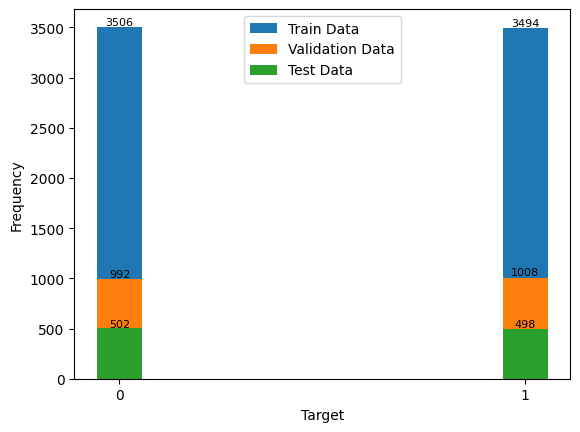

Number of tuples in Train Data: 7000
Number of tuples in Validation Data: 2000
Number of tuples in Test Data: 1000


In [97]:
# Split target data into 3 parts with 70%, 20%, and 10% of the tuples
split_points = np.array([0.7, 0.9]) * len(target)
split_points = split_points.astype(int)
first_part = target[:split_points[0]]
second_part = target[split_points[0]:split_points[1]]
last_part = target[split_points[1]:]

# Plot histogram of each part
n1, bins1, patches1 = plt.hist(first_part, label='Train Data')
n2, bins2, patches2 = plt.hist(second_part, label='Validation Data')
n3, bins3, patches3 = plt.hist(last_part, label='Test Data')

# Find the bins that have bars
bins_with_bars1 = [bins1[i] for i in range(len(patches1)) if n1[i] > 0]
bins_with_bars2 = [bins2[j] for j in range(len(patches2)) if n2[j] > 0]
bins_with_bars3 = [bins3[k] for k in range(len(patches3)) if n3[k] > 0]

# Calculate the bar width
bar_width1 = bins1[1] - bins1[0]
bar_width2 = bins2[1] - bins2[0]
bar_width3 = bins3[1] - bins3[0]

# Set the x-tick locations and labels for bins with bars only
plt.xticks([b + bar_width1/2 for b in bins_with_bars1], [0,1])
plt.xticks([b + bar_width2/2 for b in bins_with_bars2], [0,1])
plt.xticks([b + bar_width3/2 for b in bins_with_bars3], [0,1])

# Add text labels to each bin
for i in range(len(patches1)):
    if n1[i] > 0:  # Only label bins with bars
        plt.text(x=bins1[i]+(bins1[i+1]-bins1[i])/2, y=n1[i]+20, s=int(n1[i]), ha='center', fontsize=8)
for j in range(len(patches2)):
    if n2[j] > 0:  # Only label bins with bars
        plt.text(x=bins2[j]+(bins2[j+1]-bins2[j])/2, y=n2[j]+20, s=int(n2[j]), ha='center', fontsize=8)
for k in range(len(patches3)):
    if n3[k] > 0:  # Only label bins with bars
        plt.text(x=bins3[k]+(bins3[k+1]-bins3[k])/2, y=n3[k]+15, s=int(n3[k]), ha='center', fontsize=8)

plt.xlabel('Target')
plt.ylabel('Frequency')
plt.legend(loc='upper center')

plt.show()

# Print number of tuples in each part
print(f"Number of tuples in Train Data: {first_part.shape[0]}")
print(f"Number of tuples in Validation Data: {second_part.shape[0]}")
print(f"Number of tuples in Test Data: {last_part.shape[0]}")

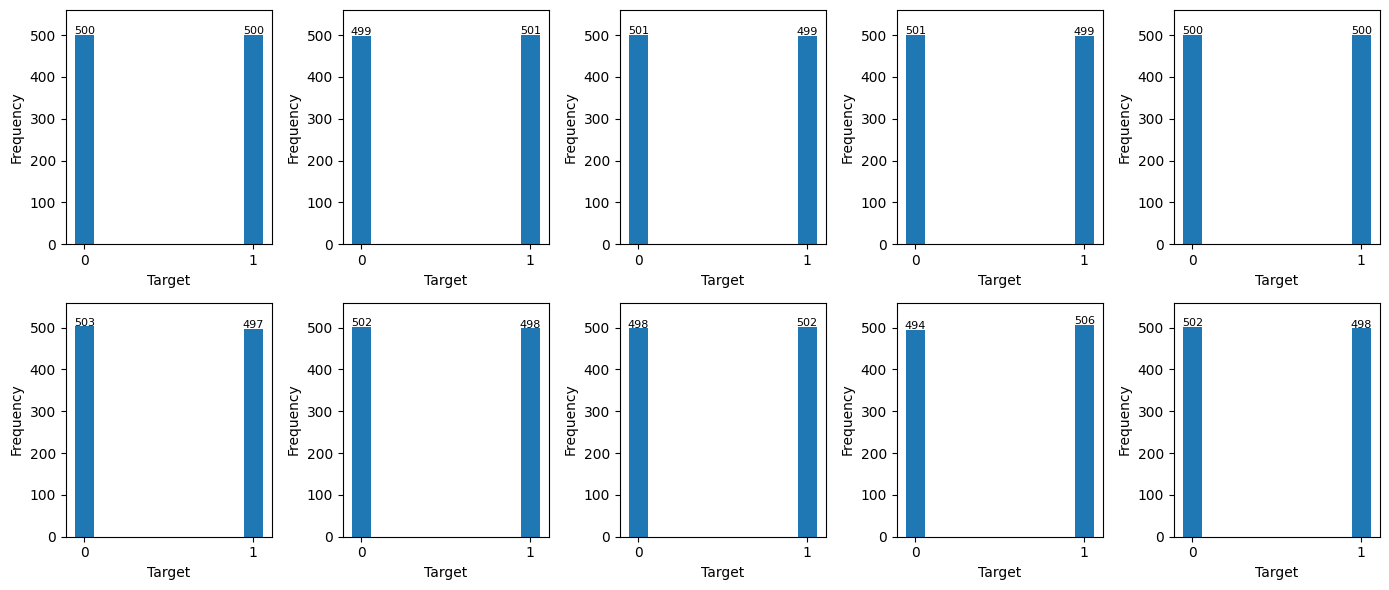

In [104]:
target = df['label_pass']
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 6))
for i, ax in enumerate(axes.ravel()):
    if i < 10:
        data = target[i*1000:i*1000+1000]
        if len(set(data)) > 1:
            n, bins, patches = ax.hist(data)
            bins_with_bars = [bins[j] for j in range(len(patches)) if n[j] > 0]
            bar_width = bins[1] - bins[0]
            ax.set_xticks([b + bar_width/2 for b in bins_with_bars], [0,1])
            ax.set_ylim(0, 560)  # Set the y-axis limits for all subplots
            ax.set_xlabel('Target')
            ax.set_ylabel('Frequency')
            for j in range(len(patches)):
                if n[j] > 0:  # Only label bins with bars
                    ax.text(bins[j]+(bins[j+1]-bins[j])/2, n[j]+1.5, str(int(n[j])), ha='center', fontsize=8)
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

# Oversampling Dataset 1500 --> 2000 (smote0-9)

In [3]:
# Read in the dataset
df = pd.read_csv('data/dataset1500.csv')

# Convert the target variable to numerical values (yes' replaced with 1 and 'no' replaced with 0)
le = LabelEncoder()
df['label_pass'] = le.fit_transform(df['label_pass'])

# Define a list of column names for the oversampled dataset
column_names = ['|v|_mean', '|a|_mean', 'vz_mean', 'az_mean', '|v|_std', '|a|_std', 'vz_std', 'az_std',
                '|v|_min', '|a|_min', 'vz_min', 'az_min', '|v|_max', '|a|_max', 'vz_max', 'az_max', 'label_pass']

# Define a list of random states to use for SMOTE
random_states = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for rs in random_states:
    sm = SMOTE(random_state=rs)

    X = df.iloc[0:150, 2:-1]
    y = df.iloc[0:150, -1]
    X_1, y_1 = sm.fit_resample(X, y)
    X = df.iloc[150:300, 2:-1]
    y = df.iloc[150:300, -1]
    X_2, y_2 = sm.fit_resample(X, y)
    X = df.iloc[300:450, 2:-1]
    y = df.iloc[300:450, -1]
    X_3, y_3 =sm.fit_resample(X, y)
    X = df.iloc[450:600, 2:-1]
    y = df.iloc[450:600, -1]
    X_4, y_4 = sm.fit_resample(X, y)
    X = df.iloc[600:750, 2:-1]
    y = df.iloc[600:750, -1]
    X_5, y_5 = sm.fit_resample(X, y)
    X = df.iloc[750:900, 2:-1]
    y = df.iloc[750:900, -1]
    X_6, y_6 = sm.fit_resample(X, y)
    X = df.iloc[900:1050, 2:-1]
    y = df.iloc[900:1050, -1]
    X_7, y_7 = sm.fit_resample(X, y)
    X = df.iloc[1050:1200, 2:-1]
    y = df.iloc[1050:1200, -1]
    X_8, y_8 = sm.fit_resample(X, y)
    X = df.iloc[1200:1350, 2:-1]
    y = df.iloc[1200:1350, -1]
    X_9, y_9 = sm.fit_resample(X, y)
    X = df.iloc[1350:1501,2:-1]
    y = df.iloc[1350:1501, -1]
    X_10, y_10 = sm.fit_resample(X, y)

    # Concatenate into a single dataset
    oversampled_1 = pd.concat([pd.DataFrame(X_1), pd.DataFrame(y_1)], axis=1)
    oversampled_2 = pd.concat([pd.DataFrame(X_2), pd.DataFrame(y_2)], axis=1)
    oversampled_3 = pd.concat([pd.DataFrame(X_3), pd.DataFrame(y_3)], axis=1)
    oversampled_4 = pd.concat([pd.DataFrame(X_4), pd.DataFrame(y_4)], axis=1)
    oversampled_5 = pd.concat([pd.DataFrame(X_5), pd.DataFrame(y_5)], axis=1)
    oversampled_6 = pd.concat([pd.DataFrame(X_6), pd.DataFrame(y_6)], axis=1)
    oversampled_7 = pd.concat([pd.DataFrame(X_7), pd.DataFrame(y_7)], axis=1)
    oversampled_8 = pd.concat([pd.DataFrame(X_8), pd.DataFrame(y_8)], axis=1)
    oversampled_9 = pd.concat([pd.DataFrame(X_9), pd.DataFrame(y_9)], axis=1)
    oversampled_10 = pd.concat([pd.DataFrame(X_10), pd.DataFrame(y_10)], axis=1)

    oversampled_dataset =pd.concat([oversampled_1, oversampled_2, oversampled_3, oversampled_4, oversampled_5,
                                     oversampled_6, oversampled_7, oversampled_8, oversampled_9, oversampled_10], axis=0)

    # Assign the column names to the oversampled dataset
    oversampled_dataset.columns = column_names

    # Save the oversampled dataset to a CSV file
    oversampled_dataset.to_csv(f'data/dataset2000_res{rs}.csv', index=False)

In [3]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/dataset2000_res1.csv')

# Split the DataFrame into data and target arrays
data = df.iloc[:, :-1].values  # Select all columns except the last one as the data array
target = df.iloc[:, -1].values.astype(int)  # Select the last column as the target array and Convert float to int

print(df.shape)
print(data[0],target[0])

(2000, 17)
[ 9.92280521e+05  1.10162726e+07  2.78834711e+02  8.51429752e+02
  8.23538876e+05  9.00528079e+06  4.32943315e+03  3.07037583e+03
  8.43270000e+04  8.68973000e+05 -9.77300000e+03 -5.37700000e+03
  2.77541100e+06  2.86374190e+07  8.42900000e+03  9.70800000e+03] 1


# Oversampling Dataset 2500 --> 4000 (smote0-9)

In [4]:
# Read in the dataset
df = pd.read_csv('data/dataset2500.csv')

# Convert the target variable to numerical values (yes' replaced with 1 and 'no' replaced with 0)
le = LabelEncoder()
df['label_pass'] = le.fit_transform(df['label_pass'])

# Define a list of column names for the oversampled dataset
column_names = ['|v|_mean', '|a|_mean', 'vz_mean', 'az_mean', '|v|_std', '|a|_std', 'vz_std', 'az_std',
                '|v|_min', '|a|_min', 'vz_min', 'az_min', '|v|_max', '|a|_max', 'vz_max', 'az_max', 'label_pass']

# Define a list of random states to use for SMOTE
random_states = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for rs in random_states:
    sm = SMOTE(random_state=rs)

    X = df.iloc[0:250, 2:-1]
    y = df.iloc[0:250, -1]
    X_1, y_1= sm.fit_resample(X, y)
    X = df.iloc[250:500, 2:-1]
    y = df.iloc[250:500, -1]
    X_2, y_2= sm.fit_resample(X, y)
    X = df.iloc[500:750, 2:-1]
    y = df.iloc[500:750 , -1]
    X_3, y_3= sm.fit_resample(X, y)
    X = df.iloc[750:1000, 2:-1]
    y = df.iloc[750:1000, -1]
    X_4, y_4= sm.fit_resample(X, y)
    X = df.iloc[1000:1250, 2:-1]
    y = df.iloc[1000:1250, -1]
    X_5, y_5= sm.fit_resample(X, y)
    X = df.iloc[1250:1500, 2:-1]
    y = df.iloc[1250:1500, -1]
    X_6, y_6= sm.fit_resample(X, y)
    X = df.iloc[1500:1750, 2:-1]
    y = df.iloc[1500:1750, -1]
    X_7, y_7= sm.fit_resample(X, y)
    X = df.iloc[1750:2000, 2:-1]
    y = df.iloc[1750:2000, -1]
    X_8, y_8= sm.fit_resample(X, y)
    X = df.iloc[2000:2250, 2:-1]
    y = df.iloc[2000:2250, -1]
    X_9, y_9= sm.fit_resample(X, y)
    X = df.iloc[2250:2501, 2:-1]
    y = df.iloc[2250:2501, -1]
    X_10, y_10= sm.fit_resample(X, y)

    # Concatenate into a single dataset
    oversampled_1 = pd.concat([pd.DataFrame(X_1), pd.DataFrame(y_1)], axis=1)
    oversampled_2 = pd.concat([pd.DataFrame(X_2), pd.DataFrame(y_2)], axis=1)
    oversampled_3 = pd.concat([pd.DataFrame(X_3), pd.DataFrame(y_3)], axis=1)
    oversampled_4 = pd.concat([pd.DataFrame(X_4), pd.DataFrame(y_4)], axis=1)
    oversampled_5 = pd.concat([pd.DataFrame(X_5), pd.DataFrame(y_5)], axis=1)
    oversampled_6 = pd.concat([pd.DataFrame(X_6), pd.DataFrame(y_6)], axis=1)
    oversampled_7 = pd.concat([pd.DataFrame(X_7), pd.DataFrame(y_7)], axis=1)
    oversampled_8 = pd.concat([pd.DataFrame(X_8), pd.DataFrame(y_8)], axis=1)
    oversampled_9 = pd.concat([pd.DataFrame(X_9), pd.DataFrame(y_9)], axis=1)
    oversampled_10 = pd.concat([pd.DataFrame(X_10), pd.DataFrame(y_10)], axis=1)

    oversampled_dataset =pd.concat([oversampled_1, oversampled_2, oversampled_3, oversampled_4, oversampled_5,
                                     oversampled_6, oversampled_7, oversampled_8, oversampled_9, oversampled_10], axis=0)

    # Assign the column names to the oversampled dataset
    oversampled_dataset.columns = column_names

    # Save the oversampled dataset to a CSV file
    oversampled_dataset.to_csv(f'data/dataset4000_res{rs}.csv', index=False)

In [5]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/dataset4000_res1.csv')

# Split the DataFrame into data and target arrays
data = df.iloc[:, :-1].values  # Select all columns except the last one as the data array
target = df.iloc[:, -1].values.astype(int)  # Select the last column as the target array and Convert float to int

print(df.shape)
print(data[0],target[0])

(4000, 17)
[ 9.92280521e+05  1.10162726e+07  2.78834711e+02  8.51429752e+02
  8.23538876e+05  9.00528079e+06  4.32943315e+03  3.07037583e+03
  8.43270000e+04  8.68973000e+05 -9.77300000e+03 -5.37700000e+03
  2.77541100e+06  2.86374190e+07  8.42900000e+03  9.70800000e+03] 1


# Oversampling Dataset 3500 --> 6000 (smote0-9)

In [5]:
# Read in the dataset
df = pd.read_csv('data/dataset3500.csv')

# Convert the target variable to numerical values (yes' replaced with 1 and 'no' replaced with 0)
le = LabelEncoder()
df['label_pass'] = le.fit_transform(df['label_pass'])

# Define a list of column names for the oversampled dataset
column_names = ['|v|_mean', '|a|_mean', 'vz_mean', 'az_mean', '|v|_std', '|a|_std', 'vz_std', 'az_std',
                '|v|_min', '|a|_min', 'vz_min', 'az_min', '|v|_max', '|a|_max', 'vz_max', 'az_max', 'label_pass']

# Define a list of random states to use for SMOTE
random_states = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for rs in random_states:
    sm = SMOTE(random_state=rs)

    X = df.iloc[0:350, 2:-1]
    y = df.iloc[0:350, -1]
    X_1, y_1= sm.fit_resample(X, y)
    X = df.iloc[350:700, 2:-1]
    y = df.iloc[350:700, -1]
    X_2, y_2= sm.fit_resample(X, y)
    X = df.iloc[700:1050, 2:-1]
    y = df.iloc[700:1050 , -1]
    X_3, y_3= sm.fit_resample(X, y)
    X = df.iloc[1050:1400, 2:-1]
    y = df.iloc[1050:1400, -1]
    X_4, y_4= sm.fit_resample(X, y)
    X = df.iloc[1400:1750, 2:-1]
    y = df.iloc[1400:1750, -1]
    X_5, y_5= sm.fit_resample(X, y)
    X = df.iloc[1750:2100, 2:-1]
    y = df.iloc[1750:2100, -1]
    X_6, y_6= sm.fit_resample(X, y)
    X = df.iloc[2100:2450, 2:-1]
    y = df.iloc[2100:2450, -1]
    X_7, y_7= sm.fit_resample(X, y)
    X = df.iloc[2450:2800, 2:-1]
    y = df.iloc[2450:2800, -1]
    X_8, y_8= sm.fit_resample(X, y)
    X = df.iloc[2800:3150, 2:-1]
    y = df.iloc[2800:3150, -1]
    X_9, y_9= sm.fit_resample(X, y)
    X = df.iloc[3150:3501, 2:-1]
    y = df.iloc[3150:3501, -1]
    X_10, y_10= sm.fit_resample(X, y)

    # Concatenate into a single dataset
    oversampled_1 = pd.concat([pd.DataFrame(X_1), pd.DataFrame(y_1)], axis=1)
    oversampled_2 = pd.concat([pd.DataFrame(X_2), pd.DataFrame(y_2)], axis=1)
    oversampled_3 = pd.concat([pd.DataFrame(X_3), pd.DataFrame(y_3)], axis=1)
    oversampled_4 = pd.concat([pd.DataFrame(X_4), pd.DataFrame(y_4)], axis=1)
    oversampled_5 = pd.concat([pd.DataFrame(X_5), pd.DataFrame(y_5)], axis=1)
    oversampled_6 = pd.concat([pd.DataFrame(X_6), pd.DataFrame(y_6)], axis=1)
    oversampled_7 = pd.concat([pd.DataFrame(X_7), pd.DataFrame(y_7)], axis=1)
    oversampled_8 = pd.concat([pd.DataFrame(X_8), pd.DataFrame(y_8)], axis=1)
    oversampled_9 = pd.concat([pd.DataFrame(X_9), pd.DataFrame(y_9)], axis=1)
    oversampled_10 = pd.concat([pd.DataFrame(X_10), pd.DataFrame(y_10)], axis=1)

    oversampled_dataset =pd.concat([oversampled_1, oversampled_2, oversampled_3, oversampled_4, oversampled_5,
                                     oversampled_6, oversampled_7, oversampled_8, oversampled_9, oversampled_10], axis=0)

    # Assign the column names to the oversampled dataset
    oversampled_dataset.columns = column_names

    # Save the oversampled dataset to a CSV file
    oversampled_dataset.to_csv(f'data/dataset6000_res{rs}.csv', index=False)

In [7]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/dataset6000_res1.csv')

# Split the DataFrame into data and target arrays
data = df.iloc[:, :-1].values  # Select all columns except the last one as the data array
target = df.iloc[:, -1].values.astype(int)  # Select the last column as the target array and Convert float to int

print(df.shape)
print(data[0],target[0])

(6000, 17)
[ 9.92280521e+05  1.10162726e+07  2.78834711e+02  8.51429752e+02
  8.23538876e+05  9.00528079e+06  4.32943315e+03  3.07037583e+03
  8.43270000e+04  8.68973000e+05 -9.77300000e+03 -5.37700000e+03
  2.77541100e+06  2.86374190e+07  8.42900000e+03  9.70800000e+03] 1


# Oversampling Dataset 4500 --> 8000 (smote0-9)

In [6]:
# Read in the dataset
df = pd.read_csv('data/dataset4500.csv')

# Convert the target variable to numerical values (yes' replaced with 1 and 'no' replaced with 0)
le = LabelEncoder()
df['label_pass'] = le.fit_transform(df['label_pass'])

# Define a list of column names for the oversampled dataset
column_names = ['|v|_mean', '|a|_mean', 'vz_mean', 'az_mean', '|v|_std', '|a|_std', 'vz_std', 'az_std',
                '|v|_min', '|a|_min', 'vz_min', 'az_min', '|v|_max', '|a|_max', 'vz_max', 'az_max', 'label_pass']

# Define a list of random states to use for SMOTE
random_states = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for rs in random_states:
    sm = SMOTE(random_state=rs)

    X = df.iloc[0:450, 2:-1]
    y = df.iloc[0:450, -1]
    X_1, y_1= sm.fit_resample(X, y)
    X = df.iloc[450:900, 2:-1]
    y = df.iloc[450:900, -1]
    X_2, y_2= sm.fit_resample(X, y)
    X = df.iloc[900:1350, 2:-1]
    y = df.iloc[900:1350 , -1]
    X_3, y_3= sm.fit_resample(X, y)
    X = df.iloc[1350:1800, 2:-1]
    y = df.iloc[1350:1800, -1]
    X_4, y_4= sm.fit_resample(X, y)
    X = df.iloc[1800:2250, 2:-1]
    y = df.iloc[1800:2250, -1]
    X_5, y_5= sm.fit_resample(X, y)
    X = df.iloc[2250:2700, 2:-1]
    y = df.iloc[2250:2700, -1]
    X_6, y_6= sm.fit_resample(X, y)
    X = df.iloc[2700:3150, 2:-1]
    y = df.iloc[2700:3150, -1]
    X_7, y_7= sm.fit_resample(X, y)
    X = df.iloc[3150:3600, 2:-1]
    y = df.iloc[3150:3600, -1]
    X_8, y_8= sm.fit_resample(X, y)
    X = df.iloc[3600:4050, 2:-1]
    y = df.iloc[3600:4050, -1]
    X_9, y_9= sm.fit_resample(X, y)
    X = df.iloc[4050:4501, 2:-1]
    y = df.iloc[4050:4501, -1]
    X_10, y_10= sm.fit_resample(X, y)

    # Concatenate into a single dataset
    oversampled_1 = pd.concat([pd.DataFrame(X_1), pd.DataFrame(y_1)], axis=1)
    oversampled_2 = pd.concat([pd.DataFrame(X_2), pd.DataFrame(y_2)], axis=1)
    oversampled_3 = pd.concat([pd.DataFrame(X_3), pd.DataFrame(y_3)], axis=1)
    oversampled_4 = pd.concat([pd.DataFrame(X_4), pd.DataFrame(y_4)], axis=1)
    oversampled_5 = pd.concat([pd.DataFrame(X_5), pd.DataFrame(y_5)], axis=1)
    oversampled_6 = pd.concat([pd.DataFrame(X_6), pd.DataFrame(y_6)], axis=1)
    oversampled_7 = pd.concat([pd.DataFrame(X_7), pd.DataFrame(y_7)], axis=1)
    oversampled_8 = pd.concat([pd.DataFrame(X_8), pd.DataFrame(y_8)], axis=1)
    oversampled_9 = pd.concat([pd.DataFrame(X_9), pd.DataFrame(y_9)], axis=1)
    oversampled_10 = pd.concat([pd.DataFrame(X_10), pd.DataFrame(y_10)], axis=1)

    oversampled_dataset =pd.concat([oversampled_1, oversampled_2, oversampled_3, oversampled_4, oversampled_5,
                                     oversampled_6, oversampled_7, oversampled_8, oversampled_9, oversampled_10], axis=0)

    # Assign the column names to the oversampled dataset
    oversampled_dataset.columns = column_names

    # Save the oversampled dataset to a CSV file
    oversampled_dataset.to_csv(f'data/dataset8000_res{rs}.csv', index=False)

In [9]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/dataset8000_res1.csv')

# Split the DataFrame into data and target arrays
data = df.iloc[:, :-1].values  # Select all columns except the last one as the data array
target = df.iloc[:, -1].values.astype(int)  # Select the last column as the target array and Convert float to int

print(df.shape)
print(data[0],target[0])

(8000, 17)
[ 9.92280521e+05  1.10162726e+07  2.78834711e+02  8.51429752e+02
  8.23538876e+05  9.00528079e+06  4.32943315e+03  3.07037583e+03
  8.43270000e+04  8.68973000e+05 -9.77300000e+03 -5.37700000e+03
  2.77541100e+06  2.86374190e+07  8.42900000e+03  9.70800000e+03] 1


# Oversampling Dataset 5500 --> 10000 (smote0-9)

In [7]:
# Read in the dataset
df = pd.read_csv('data/dataset5500.csv')

# Convert the target variable to numerical values (yes' replaced with 1 and 'no' replaced with 0)
le = LabelEncoder()
df['label_pass'] = le.fit_transform(df['label_pass'])

# Define a list of column names for the oversampled dataset
column_names = ['|v|_mean', '|a|_mean', 'vz_mean', 'az_mean', '|v|_std', '|a|_std', 'vz_std', 'az_std',
                '|v|_min', '|a|_min', 'vz_min', 'az_min', '|v|_max', '|a|_max', 'vz_max', 'az_max', 'label_pass']

# Define a list of random states to use for SMOTE
random_states = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for rs in random_states:
    sm = SMOTE(random_state=rs)

    X = df.iloc[0:550, 2:-1]
    y = df.iloc[0:550, -1]
    X_1, y_1= sm.fit_resample(X, y)
    X = df.iloc[550:1100, 2:-1]
    y = df.iloc[550:1100, -1]
    X_2, y_2= sm.fit_resample(X, y)
    X = df.iloc[1100:1650, 2:-1]
    y = df.iloc[1100:1650 , -1]
    X_3, y_3= sm.fit_resample(X, y)
    X = df.iloc[1650:2200, 2:-1]
    y = df.iloc[1650:2200, -1]
    X_4, y_4= sm.fit_resample(X, y)
    X = df.iloc[2200:2750, 2:-1]
    y = df.iloc[2200:2750, -1]
    X_5, y_5= sm.fit_resample(X, y)
    X = df.iloc[2750:3300, 2:-1]
    y = df.iloc[2750:3300, -1]
    X_6, y_6= sm.fit_resample(X, y)
    X = df.iloc[3300:3850, 2:-1]
    y = df.iloc[3300:3850, -1]
    X_7, y_7= sm.fit_resample(X, y)
    X = df.iloc[3850:4400, 2:-1]
    y = df.iloc[3850:4400, -1]
    X_8, y_8= sm.fit_resample(X, y)
    X = df.iloc[4400:4950, 2:-1]
    y = df.iloc[4400:4950, -1]
    X_9, y_9= sm.fit_resample(X, y)
    X = df.iloc[4950:5501, 2:-1]
    y = df.iloc[4950:5501, -1]
    X_10, y_10= sm.fit_resample(X, y)

    # Concatenate into a single dataset
    oversampled_1 = pd.concat([pd.DataFrame(X_1), pd.DataFrame(y_1)], axis=1)
    oversampled_2 = pd.concat([pd.DataFrame(X_2), pd.DataFrame(y_2)], axis=1)
    oversampled_3 = pd.concat([pd.DataFrame(X_3), pd.DataFrame(y_3)], axis=1)
    oversampled_4 = pd.concat([pd.DataFrame(X_4), pd.DataFrame(y_4)], axis=1)
    oversampled_5 = pd.concat([pd.DataFrame(X_5), pd.DataFrame(y_5)], axis=1)
    oversampled_6 = pd.concat([pd.DataFrame(X_6), pd.DataFrame(y_6)], axis=1)
    oversampled_7 = pd.concat([pd.DataFrame(X_7), pd.DataFrame(y_7)], axis=1)
    oversampled_8 = pd.concat([pd.DataFrame(X_8), pd.DataFrame(y_8)], axis=1)
    oversampled_9 = pd.concat([pd.DataFrame(X_9), pd.DataFrame(y_9)], axis=1)
    oversampled_10 = pd.concat([pd.DataFrame(X_10), pd.DataFrame(y_10)], axis=1)

    oversampled_dataset =pd.concat([oversampled_1, oversampled_2, oversampled_3, oversampled_4, oversampled_5,
                                     oversampled_6, oversampled_7, oversampled_8, oversampled_9, oversampled_10], axis=0)

    # Assign the column names to the oversampled dataset
    oversampled_dataset.columns = column_names

    # Save the oversampled dataset to a CSV file
    oversampled_dataset.to_csv(f'data/dataset10000_res{rs}.csv', index=False)

In [11]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/dataset10000_res1.csv')

# Split the DataFrame into data and target arrays
data = df.iloc[:, :-1].values  # Select all columns except the last one as the data array
target = df.iloc[:, -1].values.astype(int)  # Select the last column as the target array and Convert float to int

print(df.shape)
print(data[0],target[0])

(10000, 17)
[ 9.92280521e+05  1.10162726e+07  2.78834711e+02  8.51429752e+02
  8.23538876e+05  9.00528079e+06  4.32943315e+03  3.07037583e+03
  8.43270000e+04  8.68973000e+05 -9.77300000e+03 -5.37700000e+03
  2.77541100e+06  2.86374190e+07  8.42900000e+03  9.70800000e+03] 1


# Oversampling Dataset 1500 --> 2000 (borderline)

In [143]:
# Read in the dataset
df = pd.read_csv('data/dataset1500.csv')

# Convert the target variable to numerical values (yes' replaced with 1 and 'no' replaced with 0)
le = LabelEncoder()
df['label_pass'] = le.fit_transform(df['label_pass'])

sm = BorderlineSMOTE(random_state=42)

X = df.iloc[0:150, 2:-1]
y = df.iloc[0:150, -1]
X_1, y_1= sm.fit_resample(X, y)
X = df.iloc[150:300, 2:-1]
y = df.iloc[150:300, -1]
X_2, y_2= sm.fit_resample(X, y)
X = df.iloc[300:450, 2:-1]
y = df.iloc[300:450 , -1]
X_3, y_3= sm.fit_resample(X, y)
X = df.iloc[450:600, 2:-1]
y = df.iloc[450:600, -1]
X_4, y_4= sm.fit_resample(X, y)
X = df.iloc[600:750, 2:-1]
y = df.iloc[600:750, -1]
X_5, y_5= sm.fit_resample(X, y)
X = df.iloc[750:900, 2:-1]
y = df.iloc[750:900, -1]
X_6, y_6= sm.fit_resample(X, y)
X = df.iloc[900:1050, 2:-1]
y = df.iloc[900:1050, -1]
X_7, y_7= sm.fit_resample(X, y)
X = df.iloc[1050:1200, 2:-1]
y = df.iloc[1050:1200, -1]
X_8, y_8= sm.fit_resample(X, y)
X = df.iloc[1200:1350, 2:-1]
y = df.iloc[1200:1350, -1]
X_9, y_9= sm.fit_resample(X, y)
X = df.iloc[1350:1501, 2:-1]
y = df.iloc[1350:1501, -1]
X_10, y_10= sm.fit_resample(X, y)

# Concatenate into a single dataset
oversampled_1 = pd.concat([pd.DataFrame(X_1), pd.DataFrame(y_1)], axis=1)
oversampled_2 = pd.concat([pd.DataFrame(X_2), pd.DataFrame(y_2)], axis=1)
oversampled_3 = pd.concat([pd.DataFrame(X_3), pd.DataFrame(y_3)], axis=1)
oversampled_4 = pd.concat([pd.DataFrame(X_4), pd.DataFrame(y_4)], axis=1)
oversampled_5 = pd.concat([pd.DataFrame(X_5), pd.DataFrame(y_5)], axis=1)
oversampled_6 = pd.concat([pd.DataFrame(X_6), pd.DataFrame(y_6)], axis=1)
oversampled_7 = pd.concat([pd.DataFrame(X_7), pd.DataFrame(y_7)], axis=1)
oversampled_8 = pd.concat([pd.DataFrame(X_8), pd.DataFrame(y_8)], axis=1)
oversampled_9 = pd.concat([pd.DataFrame(X_9), pd.DataFrame(y_9)], axis=1)
oversampled_10 = pd.concat([pd.DataFrame(X_10), pd.DataFrame(y_10)], axis=1)

oversampled_dataset = pd.concat([oversampled_1, oversampled_2, oversampled_3, oversampled_4, oversampled_5,
                                 oversampled_6, oversampled_7, oversampled_8, oversampled_9, oversampled_10], axis=0)

# Define a list of column names for the oversampled dataset
column_names = ['|v|_mean', '|a|_mean', 'vz_mean', 'az_mean', '|v|_std', '|a|_std', 'vz_std', 'az_std',
                '|v|_min', '|a|_min', 'vz_min', 'az_min', '|v|_max', '|a|_max', 'vz_max', 'az_max', 'label_pass']

# Assign the column names to the oversampled dataset
oversampled_dataset.columns = column_names

# Save the oversampled dataset to a CSV file
oversampled_dataset.to_csv('data/dataset2000_bord.csv', index=False)

In [144]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/dataset2000_bord.csv')

# Split the DataFrame into data and target arrays
data = df.iloc[:, :-1].values  # Select all columns except the last one as the data array
target = df.iloc[:, -1].values.astype(int)  # Select the last column as the target array and Convert float to int

print(df.shape)
print(data[0],target[0])

(2000, 17)
[ 9.92280521e+05  1.10162726e+07  2.78834711e+02  8.51429752e+02
  8.23538876e+05  9.00528079e+06  4.32943315e+03  3.07037583e+03
  8.43270000e+04  8.68973000e+05 -9.77300000e+03 -5.37700000e+03
  2.77541100e+06  2.86374190e+07  8.42900000e+03  9.70800000e+03] 1


# Oversampling Dataset 2500 --> 4000 (borderline)

In [148]:
# Read in the dataset
df = pd.read_csv('data/dataset2500.csv')

# Convert the target variable to numerical values (yes' replaced with 1 and 'no' replaced with 0)
le = LabelEncoder()
df['label_pass'] = le.fit_transform(df['label_pass'])

sm = BorderlineSMOTE(random_state=42)

X = df.iloc[0:250, 2:-1]
y = df.iloc[0:250, -1]
X_1, y_1= sm.fit_resample(X, y)
X = df.iloc[250:500, 2:-1]
y = df.iloc[250:500, -1]
X_2, y_2= sm.fit_resample(X, y)
X = df.iloc[500:750, 2:-1]
y = df.iloc[500:750 , -1]
X_3, y_3= sm.fit_resample(X, y)
X = df.iloc[750:1000, 2:-1]
y = df.iloc[750:1000, -1]
X_4, y_4= sm.fit_resample(X, y)
X = df.iloc[1000:1250, 2:-1]
y = df.iloc[1000:1250, -1]
X_5, y_5= sm.fit_resample(X, y)
X = df.iloc[1250:1500, 2:-1]
y = df.iloc[1250:1500, -1]
X_6, y_6= sm.fit_resample(X, y)
X = df.iloc[1500:1750, 2:-1]
y = df.iloc[1500:1750, -1]
X_7, y_7= sm.fit_resample(X, y)
X = df.iloc[1750:2000, 2:-1]
y = df.iloc[1750:2000, -1]
X_8, y_8= sm.fit_resample(X, y)
X = df.iloc[2000:2250, 2:-1]
y = df.iloc[2000:2250, -1]
X_9, y_9= sm.fit_resample(X, y)
X = df.iloc[2250:2501, 2:-1]
y = df.iloc[2250:2501, -1]
X_10, y_10= sm.fit_resample(X, y)

# Concatenate into a single dataset
oversampled_1 = pd.concat([pd.DataFrame(X_1), pd.DataFrame(y_1)], axis=1)
oversampled_2 = pd.concat([pd.DataFrame(X_2), pd.DataFrame(y_2)], axis=1)
oversampled_3 = pd.concat([pd.DataFrame(X_3), pd.DataFrame(y_3)], axis=1)
oversampled_4 = pd.concat([pd.DataFrame(X_4), pd.DataFrame(y_4)], axis=1)
oversampled_5 = pd.concat([pd.DataFrame(X_5), pd.DataFrame(y_5)], axis=1)
oversampled_6 = pd.concat([pd.DataFrame(X_6), pd.DataFrame(y_6)], axis=1)
oversampled_7 = pd.concat([pd.DataFrame(X_7), pd.DataFrame(y_7)], axis=1)
oversampled_8 = pd.concat([pd.DataFrame(X_8), pd.DataFrame(y_8)], axis=1)
oversampled_9 = pd.concat([pd.DataFrame(X_9), pd.DataFrame(y_9)], axis=1)
oversampled_10 = pd.concat([pd.DataFrame(X_10), pd.DataFrame(y_10)], axis=1)

oversampled_dataset = pd.concat([oversampled_1, oversampled_2, oversampled_3, oversampled_4, oversampled_5,
                                 oversampled_6, oversampled_7, oversampled_8, oversampled_9, oversampled_10], axis=0)

# Define a list of column names for the oversampled dataset
column_names = ['|v|_mean', '|a|_mean', 'vz_mean', 'az_mean', '|v|_std', '|a|_std', 'vz_std', 'az_std',
                '|v|_min', '|a|_min', 'vz_min', 'az_min', '|v|_max', '|a|_max', 'vz_max', 'az_max', 'label_pass']

# Assign the column names to the oversampled dataset
oversampled_dataset.columns = column_names

# Save the oversampled dataset to a CSV file
oversampled_dataset.to_csv('data/dataset4000_bord.csv', index=False)

In [149]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/dataset4000_bord.csv')

# Split the DataFrame into data and target arrays
data = df.iloc[:, :-1].values  # Select all columns except the last one as the data array
target = df.iloc[:, -1].values.astype(int)  # Select the last column as the target array and Convert float to int

print(df.shape)
print(data[0],target[0])

(4000, 17)
[ 9.92280521e+05  1.10162726e+07  2.78834711e+02  8.51429752e+02
  8.23538876e+05  9.00528079e+06  4.32943315e+03  3.07037583e+03
  8.43270000e+04  8.68973000e+05 -9.77300000e+03 -5.37700000e+03
  2.77541100e+06  2.86374190e+07  8.42900000e+03  9.70800000e+03] 1


# Oversampling Dataset 3500 --> 6000 (borderline)

In [150]:
# Read in the dataset
df = pd.read_csv('data/dataset3500.csv')

# Convert the target variable to numerical values (yes' replaced with 1 and 'no' replaced with 0)
le = LabelEncoder()
df['label_pass'] = le.fit_transform(df['label_pass'])

sm = BorderlineSMOTE(random_state=42)

X = df.iloc[0:350, 2:-1]
y = df.iloc[0:350, -1]
X_1, y_1= sm.fit_resample(X, y)
X = df.iloc[350:700, 2:-1]
y = df.iloc[350:700, -1]
X_2, y_2= sm.fit_resample(X, y)
X = df.iloc[700:1050, 2:-1]
y = df.iloc[700:1050 , -1]
X_3, y_3= sm.fit_resample(X, y)
X = df.iloc[1050:1400, 2:-1]
y = df.iloc[1050:1400, -1]
X_4, y_4= sm.fit_resample(X, y)
X = df.iloc[1400:1750, 2:-1]
y = df.iloc[1400:1750, -1]
X_5, y_5= sm.fit_resample(X, y)
X = df.iloc[1750:2100, 2:-1]
y = df.iloc[1750:2100, -1]
X_6, y_6= sm.fit_resample(X, y)
X = df.iloc[2100:2450, 2:-1]
y = df.iloc[2100:2450, -1]
X_7, y_7= sm.fit_resample(X, y)
X = df.iloc[2450:2800, 2:-1]
y = df.iloc[2450:2800, -1]
X_8, y_8= sm.fit_resample(X, y)
X = df.iloc[2800:3150, 2:-1]
y = df.iloc[2800:3150, -1]
X_9, y_9= sm.fit_resample(X, y)
X = df.iloc[3150:3501, 2:-1]
y = df.iloc[3150:3501, -1]
X_10, y_10= sm.fit_resample(X, y)

# Concatenate into a single dataset
oversampled_1 = pd.concat([pd.DataFrame(X_1), pd.DataFrame(y_1)], axis=1)
oversampled_2 = pd.concat([pd.DataFrame(X_2), pd.DataFrame(y_2)], axis=1)
oversampled_3 = pd.concat([pd.DataFrame(X_3), pd.DataFrame(y_3)], axis=1)
oversampled_4 = pd.concat([pd.DataFrame(X_4), pd.DataFrame(y_4)], axis=1)
oversampled_5 = pd.concat([pd.DataFrame(X_5), pd.DataFrame(y_5)], axis=1)
oversampled_6 = pd.concat([pd.DataFrame(X_6), pd.DataFrame(y_6)], axis=1)
oversampled_7 = pd.concat([pd.DataFrame(X_7), pd.DataFrame(y_7)], axis=1)
oversampled_8 = pd.concat([pd.DataFrame(X_8), pd.DataFrame(y_8)], axis=1)
oversampled_9 = pd.concat([pd.DataFrame(X_9), pd.DataFrame(y_9)], axis=1)
oversampled_10 = pd.concat([pd.DataFrame(X_10), pd.DataFrame(y_10)], axis=1)

oversampled_dataset = pd.concat([oversampled_1, oversampled_2, oversampled_3, oversampled_4, oversampled_5,
                                 oversampled_6, oversampled_7, oversampled_8, oversampled_9, oversampled_10], axis=0)

# Define a list of column names for the oversampled dataset
column_names = ['|v|_mean', '|a|_mean', 'vz_mean', 'az_mean', '|v|_std', '|a|_std', 'vz_std', 'az_std',
                '|v|_min', '|a|_min', 'vz_min', 'az_min', '|v|_max', '|a|_max', 'vz_max', 'az_max', 'label_pass']

# Assign the column names to the oversampled dataset
oversampled_dataset.columns = column_names

# Save the oversampled dataset to a CSV file
oversampled_dataset.to_csv('data/dataset6000_bord.csv', index=False)

In [154]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/dataset6000_bord.csv')

# Split the DataFrame into data and target arrays
data = df.iloc[:, :-1].values  # Select all columns except the last one as the data array
target = df.iloc[:, -1].values.astype(int)  # Select the last column as the target array and Convert float to int

print(df.shape)
print(data[0],target[0])

(6000, 17)
[ 9.92280521e+05  1.10162726e+07  2.78834711e+02  8.51429752e+02
  8.23538876e+05  9.00528079e+06  4.32943315e+03  3.07037583e+03
  8.43270000e+04  8.68973000e+05 -9.77300000e+03 -5.37700000e+03
  2.77541100e+06  2.86374190e+07  8.42900000e+03  9.70800000e+03] 1


# Oversampling Dataset 4500 --> 8000 (borderline)

In [152]:
# Read in the dataset
df = pd.read_csv('data/dataset4500.csv')

# Convert the target variable to numerical values (yes' replaced with 1 and 'no' replaced with 0)
le = LabelEncoder()
df['label_pass'] = le.fit_transform(df['label_pass'])

sm = BorderlineSMOTE(random_state=42)

X = df.iloc[0:450, 2:-1]
y = df.iloc[0:450, -1]
X_1, y_1= sm.fit_resample(X, y)
X = df.iloc[450:900, 2:-1]
y = df.iloc[450:900, -1]
X_2, y_2= sm.fit_resample(X, y)
X = df.iloc[900:1350, 2:-1]
y = df.iloc[900:1350 , -1]
X_3, y_3= sm.fit_resample(X, y)
X = df.iloc[1350:1800, 2:-1]
y = df.iloc[1350:1800, -1]
X_4, y_4= sm.fit_resample(X, y)
X = df.iloc[1800:2250, 2:-1]
y = df.iloc[1800:2250, -1]
X_5, y_5= sm.fit_resample(X, y)
X = df.iloc[2250:2700, 2:-1]
y = df.iloc[2250:2700, -1]
X_6, y_6= sm.fit_resample(X, y)
X = df.iloc[2700:3150, 2:-1]
y = df.iloc[2700:3150, -1]
X_7, y_7= sm.fit_resample(X, y)
X = df.iloc[3150:3600, 2:-1]
y = df.iloc[3150:3600, -1]
X_8, y_8= sm.fit_resample(X, y)
X = df.iloc[3600:4050, 2:-1]
y = df.iloc[3600:4050, -1]
X_9, y_9= sm.fit_resample(X, y)
X = df.iloc[4050:4501, 2:-1]
y = df.iloc[4050:4501, -1]
X_10, y_10= sm.fit_resample(X, y)

# Concatenate into a single dataset
oversampled_1 = pd.concat([pd.DataFrame(X_1), pd.DataFrame(y_1)], axis=1)
oversampled_2 = pd.concat([pd.DataFrame(X_2), pd.DataFrame(y_2)], axis=1)
oversampled_3 = pd.concat([pd.DataFrame(X_3), pd.DataFrame(y_3)], axis=1)
oversampled_4 = pd.concat([pd.DataFrame(X_4), pd.DataFrame(y_4)], axis=1)
oversampled_5 = pd.concat([pd.DataFrame(X_5), pd.DataFrame(y_5)], axis=1)
oversampled_6 = pd.concat([pd.DataFrame(X_6), pd.DataFrame(y_6)], axis=1)
oversampled_7 = pd.concat([pd.DataFrame(X_7), pd.DataFrame(y_7)], axis=1)
oversampled_8 = pd.concat([pd.DataFrame(X_8), pd.DataFrame(y_8)], axis=1)
oversampled_9 = pd.concat([pd.DataFrame(X_9), pd.DataFrame(y_9)], axis=1)
oversampled_10 = pd.concat([pd.DataFrame(X_10), pd.DataFrame(y_10)], axis=1)

oversampled_dataset = pd.concat([oversampled_1, oversampled_2, oversampled_3, oversampled_4, oversampled_5,
                                 oversampled_6, oversampled_7, oversampled_8, oversampled_9, oversampled_10], axis=0)

# Define a list of column names for the oversampled dataset
column_names = ['|v|_mean', '|a|_mean', 'vz_mean', 'az_mean', '|v|_std', '|a|_std', 'vz_std', 'az_std',
                '|v|_min', '|a|_min', 'vz_min', 'az_min', '|v|_max', '|a|_max', 'vz_max', 'az_max', 'label_pass']

# Assign the column names to the oversampled dataset
oversampled_dataset.columns = column_names

# Save the oversampled dataset to a CSV file
oversampled_dataset.to_csv('data/dataset8000_bord.csv', index=False)

In [155]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/dataset8000_bord.csv')

# Split the DataFrame into data and target arrays
data = df.iloc[:, :-1].values  # Select all columns except the last one as the data array
target = df.iloc[:, -1].values.astype(int)  # Select the last column as the target array and Convert float to int

print(df.shape)
print(data[0],target[0])

(8000, 17)
[ 9.92280521e+05  1.10162726e+07  2.78834711e+02  8.51429752e+02
  8.23538876e+05  9.00528079e+06  4.32943315e+03  3.07037583e+03
  8.43270000e+04  8.68973000e+05 -9.77300000e+03 -5.37700000e+03
  2.77541100e+06  2.86374190e+07  8.42900000e+03  9.70800000e+03] 1


# Oversampling Dataset 5500 --> 10000 (borderline)

In [156]:
# Read in the dataset
df = pd.read_csv('data/dataset5500.csv')

# Convert the target variable to numerical values (yes' replaced with 1 and 'no' replaced with 0)
le = LabelEncoder()
df['label_pass'] = le.fit_transform(df['label_pass'])

sm = BorderlineSMOTE(random_state=42)

X = df.iloc[0:550, 2:-1]
y = df.iloc[0:550, -1]
X_1, y_1= sm.fit_resample(X, y)
X = df.iloc[550:1100, 2:-1]
y = df.iloc[550:1100, -1]
X_2, y_2= sm.fit_resample(X, y)
X = df.iloc[1100:1650, 2:-1]
y = df.iloc[1100:1650 , -1]
X_3, y_3= sm.fit_resample(X, y)
X = df.iloc[1650:2200, 2:-1]
y = df.iloc[1650:2200, -1]
X_4, y_4= sm.fit_resample(X, y)
X = df.iloc[2200:2750, 2:-1]
y = df.iloc[2200:2750, -1]
X_5, y_5= sm.fit_resample(X, y)
X = df.iloc[2750:3300, 2:-1]
y = df.iloc[2750:3300, -1]
X_6, y_6= sm.fit_resample(X, y)
X = df.iloc[3300:3850, 2:-1]
y = df.iloc[3300:3850, -1]
X_7, y_7= sm.fit_resample(X, y)
X = df.iloc[3850:4400, 2:-1]
y = df.iloc[3850:4400, -1]
X_8, y_8= sm.fit_resample(X, y)
X = df.iloc[4400:4950, 2:-1]
y = df.iloc[4400:4950, -1]
X_9, y_9= sm.fit_resample(X, y)
X = df.iloc[4950:5501, 2:-1]
y = df.iloc[4950:5501, -1]
X_10, y_10= sm.fit_resample(X, y)

# Concatenate into a single dataset
oversampled_1 = pd.concat([pd.DataFrame(X_1), pd.DataFrame(y_1)], axis=1)
oversampled_2 = pd.concat([pd.DataFrame(X_2), pd.DataFrame(y_2)], axis=1)
oversampled_3 = pd.concat([pd.DataFrame(X_3), pd.DataFrame(y_3)], axis=1)
oversampled_4 = pd.concat([pd.DataFrame(X_4), pd.DataFrame(y_4)], axis=1)
oversampled_5 = pd.concat([pd.DataFrame(X_5), pd.DataFrame(y_5)], axis=1)
oversampled_6 = pd.concat([pd.DataFrame(X_6), pd.DataFrame(y_6)], axis=1)
oversampled_7 = pd.concat([pd.DataFrame(X_7), pd.DataFrame(y_7)], axis=1)
oversampled_8 = pd.concat([pd.DataFrame(X_8), pd.DataFrame(y_8)], axis=1)
oversampled_9 = pd.concat([pd.DataFrame(X_9), pd.DataFrame(y_9)], axis=1)
oversampled_10 = pd.concat([pd.DataFrame(X_10), pd.DataFrame(y_10)], axis=1)

oversampled_dataset = pd.concat([oversampled_1, oversampled_2, oversampled_3, oversampled_4, oversampled_5,
                                 oversampled_6, oversampled_7, oversampled_8, oversampled_9, oversampled_10], axis=0)

# Define a list of column names for the oversampled dataset
column_names = ['|v|_mean', '|a|_mean', 'vz_mean', 'az_mean', '|v|_std', '|a|_std', 'vz_std', 'az_std',
                '|v|_min', '|a|_min', 'vz_min', 'az_min', '|v|_max', '|a|_max', 'vz_max', 'az_max', 'label_pass']

# Assign the column names to the oversampled dataset
oversampled_dataset.columns = column_names

# Save the oversampled dataset to a CSV file
oversampled_dataset.to_csv('data/dataset10000_bord.csv', index=False)

In [161]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/dataset10000_bord.csv')

# Split the DataFrame into data and target arrays
data = df.iloc[:, :-1].values  # Select all columns except the last one as the data array
target = df.iloc[:, -1].values.astype(int)  # Select the last column as the target array and Convert float to int

print(df.shape)
print(data[0],target[0])

(10000, 17)
[ 9.92280521e+05  1.10162726e+07  2.78834711e+02  8.51429752e+02
  8.23538876e+05  9.00528079e+06  4.32943315e+03  3.07037583e+03
  8.43270000e+04  8.68973000e+05 -9.77300000e+03 -5.37700000e+03
  2.77541100e+06  2.86374190e+07  8.42900000e+03  9.70800000e+03] 1


# Shuffle Dataset

Assign to every portion of synthetic data generated (e.g. small.csv) a timestamp such that the resulting dataset is balanced over time.

**1500-2000**

1.0752646669471032e+16 - 1.0991528820501076e+16

1.0995419223504272e+16 - 1.126130425070949e+16

1.1264502326919958e+16 - 1.1627488532968564e+16

1.1632726970182682e+16 - 1.1923117607862686e+16

1.1928074686138676e+16 - 1.2204916191807194e+16

1.2204968135946636e+16 - 1.3349827390066454e+16

1.3356258822433542e+16 - 1.3656551696987254e+16

1.3664321367573494e+16 - 1.405592927500771e+16 

1.4056774795869936e+16 - 1.4480157648920236e+16

1.4513959108181628e+16 - 1.485190802272803e+16

**2500-4000**

1.0752646669471032e+16 - 1.0985623131291636e+16

1.0987744944405566e+16 - 1.1255722957200512e+16

1.1258084730685936e+16 - 1.1621183174824076e+16

1.1625367739200442e+16 - 1.1906216548250016e+16

1.190621656419923e+16  - 1.2218127687552706e+16

1.2218129004927552e+16 - 1.332746625827869e+16

1.3327519118262672e+16 - 1.3593647971707526e+16

1.3594746966928262e+16 - 1.4024844637313056e+16

1.4024845013494012e+16 - 1.4528552366123134e+16

1.4537613166021442e+16 - 1.485190802272803e+16

**3500-6000**

1.0752646669471032e+16 - 1.0985623131291636e+16

1.0987744944405566e+16 - 1.1255722957200512e+16

1.1258084730685936e+16 - 1.1621183174824076e+16

1.1625367739200442e+16 - 1.1906216548250016e+16

1.190621656419923e+16 - 1.2218127687552706e+16 

1.2218129004927552e+16 - 1.332746625827869e+16 

1.3327519118262672e+16 - 1.3593647971707526e+16

1.3594746966928262e+16 - 1.4024844637313056e+16

1.4024845013494012e+16 - 1.4528552366123134e+16

1.4537613166021442e+16 - 1.485190802272803e+16

**4500-8000**

1.0752646669471032e+16 - 1.0985623131291636e+16

1.0987744944405566e+16 - 1.1255722957200512e+16 

1.1258084730685936e+16 - 1.1621183174824076e+16 

1.1625367739200442e+16 - 1.1906216548250016e+16 

1.190621656419923e+16  - 1.2218127687552706e+16 

1.2218129004927552e+16 - 1.331405592339584e+16  

1.3314081696576386e+16 - 1.3593647971707526e+16 

1.3594746966928262e+16 - 1.4024844637313056e+16 

1.4024845013494012e+16 - 1.4528552366123134e+16 

1.4537613166021442e+16 - 1.485190802272803e+16

**5500-10000**

1.0752646669471032e+16 - 1.0985623131291636e+16 

1.0987744944405566e+16 - 1.1255722957200512e+16 

1.1258084730685936e+16 - 1.1621183174824076e+16 

1.1625367739200442e+16 - 1.1906216548250016e+16 

1.190621656419923e+16 - 1.2218127687552706e+16  

1.2218129004927552e+16 - 1.331405592339584e+16  

1.3314081696576386e+16 - 1.3593647971707526e+16 

1.3594746966928262e+16 - 1.4024844637313056e+16 

1.4024845013494012e+16 - 1.4528552366123134e+16 

1.4537613166021442e+16 - 1.485190802272803e+16

In [50]:
# Load the dataset from a CSV file
df = pd.read_csv('data/dataset5500.csv')

# Drop the sid column
df = df.drop(columns=['sid'])

# Save the updated dataset to a new CSV file
df.to_csv('data/dataset10000_sm9.csv', index=False)

In [60]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/small.csv', header=None)

# Assign the column names to the DataFrame
df.columns = ['|v|_mean', '|a|_mean', 'vz_mean', 'az_mean', '|v|_std', '|a|_std', 'vz_std', 'az_std',
              '|v|_min', '|a|_min', 'vz_min', 'az_min', '|v|_max', '|a|_max', 'vz_max', 'az_max', 'label_pass']

# Set the range of timestamps
start_ts = 1.4537613166021442e+16
end_ts = 1.485190802272803e+16

# Generate random timestamps
num_rows = len(df)  # Assuming df is your existing dataset
ts = np.random.uniform(start_ts, end_ts, num_rows)

# Create a new dataframe with the ts column added
new_df = pd.DataFrame({'ts': ts})
new_df = pd.concat([new_df, df], axis=1)

# Replace binary values with categorical values
new_df['label_pass'] = new_df['label_pass'].replace({1: 'yes', 0: 'no'})

# Save the updated dataset to a new CSV file
new_df.to_csv('data/small.csv', index=False)

In [61]:
# Load dataset into a pandas DataFrame
old_ds = pd.read_csv('data/dataset10000_sm9.csv')

# Sort the DataFrame by 'timestamp'
old_ds = old_ds.sort_values(by='ts')

old_ds.to_csv('data/dataset10000_sm9.csv', index=False, header=True)

# Dataset 2000

In [62]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/dataset2000_sm9.csv')

# Convert the target variable to numerical values (yes' replaced with 1 and 'no' replaced with 0)
le = LabelEncoder()
df['label_pass'] = le.fit_transform(df['label_pass'])

# Split the DataFrame into data and target arrays
data = df.iloc[:, 1:-1].values  # Select all columns except the first and last ones as the data array
target = df.iloc[:, -1].values  # Select the last column as the target array

print(data[0],target[0])

[ 9.92280521e+05  1.10162726e+07  2.78834711e+02  8.51429752e+02
  8.23538876e+05  9.00528079e+06  4.32943315e+03  3.07037583e+03
  8.43270000e+04  8.68973000e+05 -9.77300000e+03 -5.37700000e+03
  2.77541100e+06  2.86374190e+07  8.42900000e+03  9.70800000e+03] 1


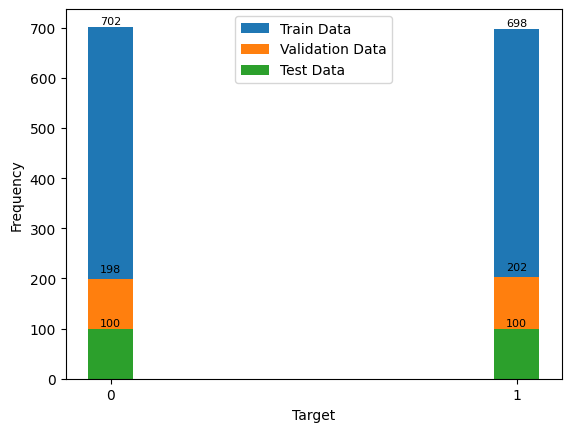

Number of tuples in Train Data: 1400
Number of tuples in Validation Data: 400
Number of tuples in Test Data: 200


In [63]:
# Split target data into 3 parts with 70%, 20%, and 10% of the tuples
split_points = np.array([0.7, 0.9]) * len(target)
split_points = split_points.astype(int)
first_part = target[:split_points[0]]
second_part = target[split_points[0]:split_points[1]]
last_part = target[split_points[1]:]

# Plot histogram of each part
n1, bins1, patches1 = plt.hist(first_part, label='Train Data')
n2, bins2, patches2 = plt.hist(second_part, label='Validation Data')
n3, bins3, patches3 = plt.hist(last_part, label='Test Data')

# Find the bins that have bars
bins_with_bars1 = [bins1[i] for i in range(len(patches1)) if n1[i] > 0]
bins_with_bars2 = [bins2[j] for j in range(len(patches2)) if n2[j] > 0]
bins_with_bars3 = [bins3[k] for k in range(len(patches3)) if n3[k] > 0]

# Calculate the bar width
bar_width1 = bins1[1] - bins1[0]
bar_width2 = bins2[1] - bins2[0]
bar_width3 = bins3[1] - bins3[0]

# Set the x-tick locations and labels for bins with bars only
plt.xticks([b + bar_width1/2 for b in bins_with_bars1], [0,1])
plt.xticks([b + bar_width2/2 for b in bins_with_bars2], [0,1])
plt.xticks([b + bar_width3/2 for b in bins_with_bars3], [0,1])

# Add text labels to each bin
for i in range(len(patches1)):
    if n1[i] > 0:  # Only label bins with bars
        plt.text(x=bins1[i]+(bins1[i+1]-bins1[i])/2, y=n1[i]+5, s=int(n1[i]), ha='center', fontsize=8)
for j in range(len(patches2)):
    if n2[j] > 0:  # Only label bins with bars
        plt.text(x=bins2[j]+(bins2[j+1]-bins2[j])/2, y=n2[j]+15, s=int(n2[j]), ha='center', fontsize=8)
for k in range(len(patches3)):
    if n3[k] > 0:  # Only label bins with bars
        plt.text(x=bins3[k]+(bins3[k+1]-bins3[k])/2, y=n3[k]+5, s=int(n3[k]), ha='center', fontsize=8)

plt.xlabel('Target')
plt.ylabel('Frequency')
plt.legend(loc='upper center')

plt.show()

# Print number of tuples in each part
print(f"Number of tuples in Train Data: {first_part.shape[0]}")
print(f"Number of tuples in Validation Data: {second_part.shape[0]}")
print(f"Number of tuples in Test Data: {last_part.shape[0]}")

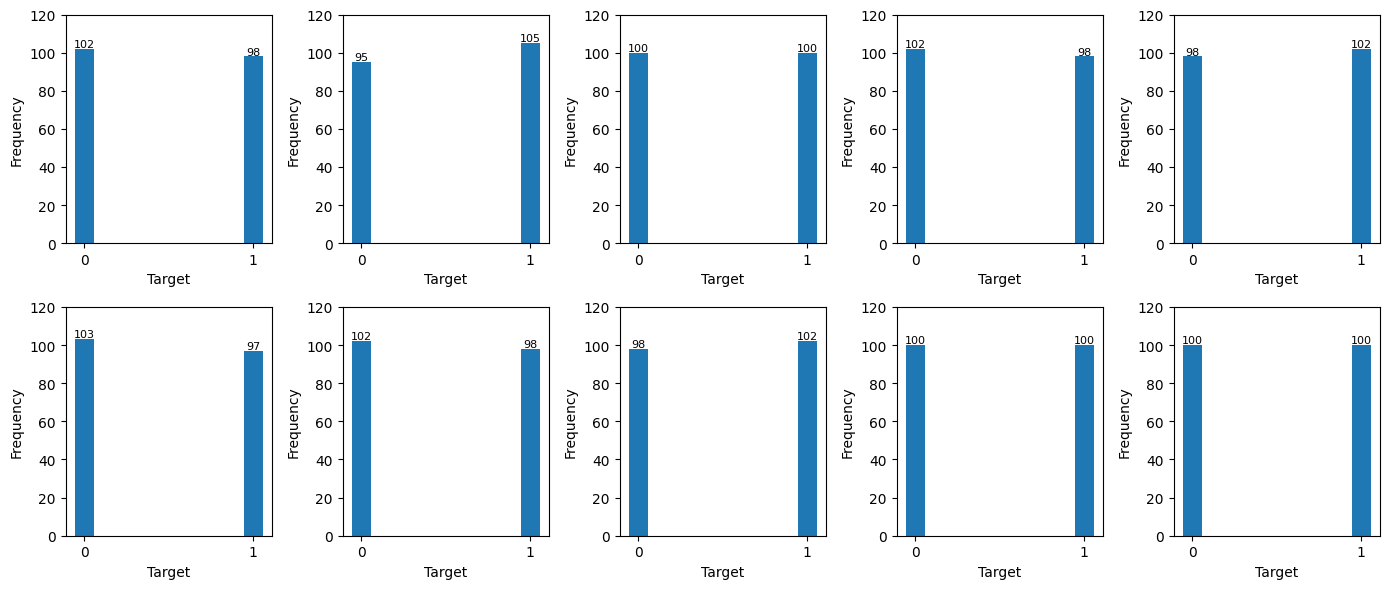

In [64]:
target = df['label_pass']
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 6))
for i, ax in enumerate(axes.ravel()):
    if i < 10:
        data = target[i*200:i*200+200]
        if len(set(data)) > 1:
            n, bins, patches = ax.hist(data)
            bins_with_bars = [bins[j] for j in range(len(patches)) if n[j] > 0]
            bar_width = bins[1] - bins[0]
            ax.set_xticks([b + bar_width/2 for b in bins_with_bars], [0,1])
            ax.set_ylim(0, 120)  # Set the y-axis limits for all subplots
            ax.set_xlabel('Target')
            ax.set_ylabel('Frequency')
            for j in range(len(patches)):
                if n[j] > 0:  # Only label bins with bars
                    ax.text(bins[j]+(bins[j+1]-bins[j])/2, n[j]+1, str(int(n[j])), ha='center', fontsize=8)
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

# Dataset 4000

In [65]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/dataset4000_sm9.csv')

# Convert the target variable to numerical values (yes' replaced with 1 and 'no' replaced with 0)
le = LabelEncoder()
df['label_pass'] = le.fit_transform(df['label_pass'])

# Split the DataFrame into data and target arrays
data = df.iloc[:, 1:-1].values  # Select all columns except the first and last ones as the data array
target = df.iloc[:, -1].values  # Select the last column as the target array

print(data[0],target[0])

[ 9.92280521e+05  1.10162726e+07  2.78834711e+02  8.51429752e+02
  8.23538876e+05  9.00528079e+06  4.32943315e+03  3.07037583e+03
  8.43270000e+04  8.68973000e+05 -9.77300000e+03 -5.37700000e+03
  2.77541100e+06  2.86374190e+07  8.42900000e+03  9.70800000e+03] 1


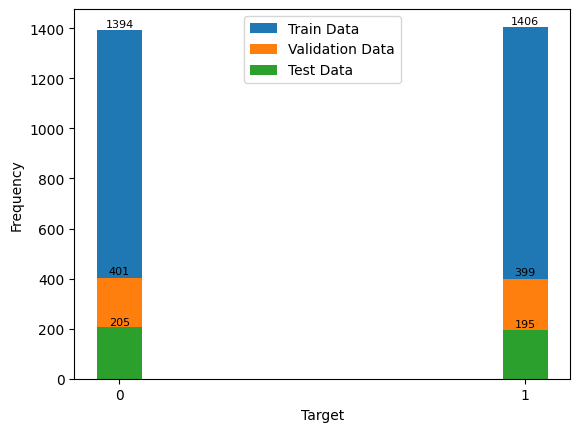

Number of tuples in Train Data: 2800
Number of tuples in Validation Data: 800
Number of tuples in Test Data: 400


In [66]:
# Split target data into 3 parts with 70%, 20%, and 10% of the tuples
split_points = np.array([0.7, 0.9]) * len(target)
split_points = split_points.astype(int)
first_part = target[:split_points[0]]
second_part = target[split_points[0]:split_points[1]]
last_part = target[split_points[1]:]

# Plot histogram of each part
n1, bins1, patches1 = plt.hist(first_part, label='Train Data')
n2, bins2, patches2 = plt.hist(second_part, label='Validation Data')
n3, bins3, patches3 = plt.hist(last_part, label='Test Data')

# Find the bins that have bars
bins_with_bars1 = [bins1[i] for i in range(len(patches1)) if n1[i] > 0]
bins_with_bars2 = [bins2[j] for j in range(len(patches2)) if n2[j] > 0]
bins_with_bars3 = [bins3[k] for k in range(len(patches3)) if n3[k] > 0]

# Calculate the bar width
bar_width1 = bins1[1] - bins1[0]
bar_width2 = bins2[1] - bins2[0]
bar_width3 = bins3[1] - bins3[0]

# Set the x-tick locations and labels for bins with bars only
plt.xticks([b + bar_width1/2 for b in bins_with_bars1], [0,1])
plt.xticks([b + bar_width2/2 for b in bins_with_bars2], [0,1])
plt.xticks([b + bar_width3/2 for b in bins_with_bars3], [0,1])

# Add text labels to each bin
for i in range(len(patches1)):
    if n1[i] > 0:  # Only label bins with bars
        plt.text(x=bins1[i]+(bins1[i+1]-bins1[i])/2, y=n1[i]+10, s=int(n1[i]), ha='center', fontsize=8)
for j in range(len(patches2)):
    if n2[j] > 0:  # Only label bins with bars
        plt.text(x=bins2[j]+(bins2[j+1]-bins2[j])/2, y=n2[j]+15, s=int(n2[j]), ha='center', fontsize=8)
for k in range(len(patches3)):
    if n3[k] > 0:  # Only label bins with bars
        plt.text(x=bins3[k]+(bins3[k+1]-bins3[k])/2, y=n3[k]+10, s=int(n3[k]), ha='center', fontsize=8)

plt.xlabel('Target')
plt.ylabel('Frequency')
plt.legend(loc='upper center')

plt.show()

# Print number of tuples in each part
print(f"Number of tuples in Train Data: {first_part.shape[0]}")
print(f"Number of tuples in Validation Data: {second_part.shape[0]}")
print(f"Number of tuples in Test Data: {last_part.shape[0]}")

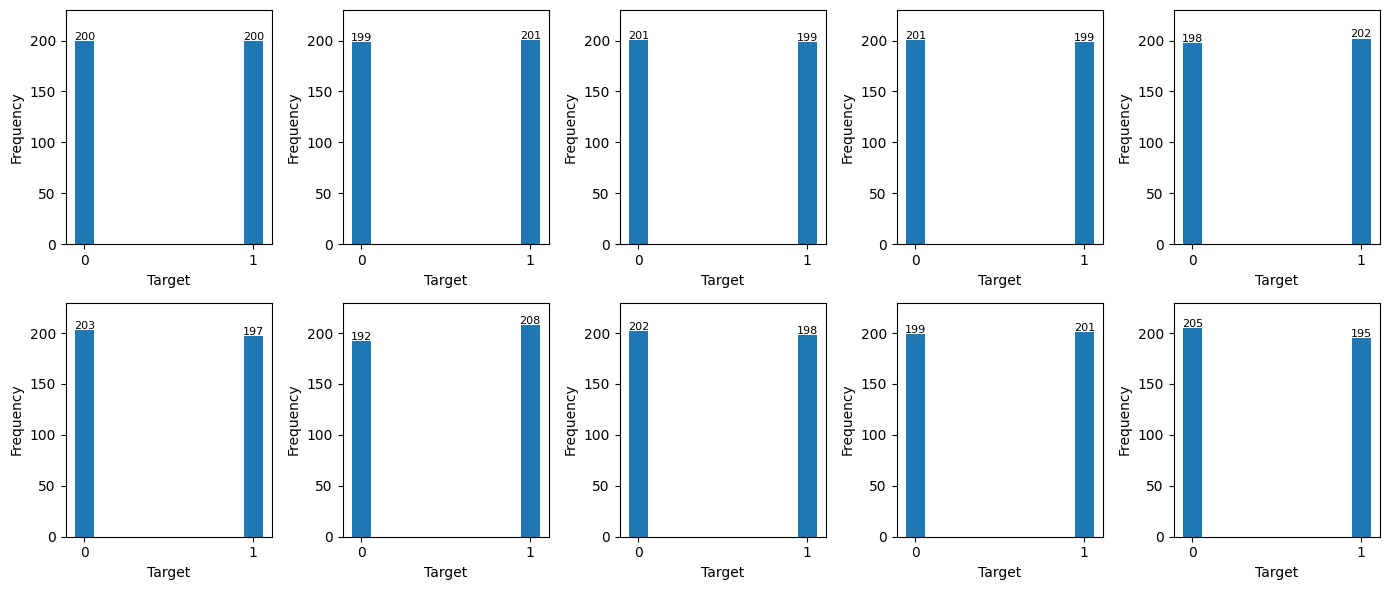

In [67]:
target = df['label_pass']
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 6))
for i, ax in enumerate(axes.ravel()):
    if i < 10:
        data = target[i*400:i*400+400]
        if len(set(data)) > 1:
            n, bins, patches = ax.hist(data)
            bins_with_bars = [bins[j] for j in range(len(patches)) if n[j] > 0]
            bar_width = bins[1] - bins[0]
            ax.set_xticks([b + bar_width/2 for b in bins_with_bars], [0,1])
            ax.set_ylim(0, 230)  # Set the y-axis limits for all subplots
            ax.set_xlabel('Target')
            ax.set_ylabel('Frequency')
            for j in range(len(patches)):
                if n[j] > 0:  # Only label bins with bars
                    ax.text(bins[j]+(bins[j+1]-bins[j])/2, n[j]+1, str(int(n[j])), ha='center', fontsize=8)
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

# Dataset 6000

In [68]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/dataset6000_sm9.csv')

# Convert the target variable to numerical values (yes' replaced with 1 and 'no' replaced with 0)
le = LabelEncoder()
df['label_pass'] = le.fit_transform(df['label_pass'])

# Split the DataFrame into data and target arrays
data = df.iloc[:, 1:-1].values  # Select all columns except the first and last ones as the data array
target = df.iloc[:, -1].values  # Select the last column as the target array

print(data[0],target[0])

[ 9.92280521e+05  1.10162726e+07  2.78834711e+02  8.51429752e+02
  8.23538876e+05  9.00528079e+06  4.32943315e+03  3.07037583e+03
  8.43270000e+04  8.68973000e+05 -9.77300000e+03 -5.37700000e+03
  2.77541100e+06  2.86374190e+07  8.42900000e+03  9.70800000e+03] 1


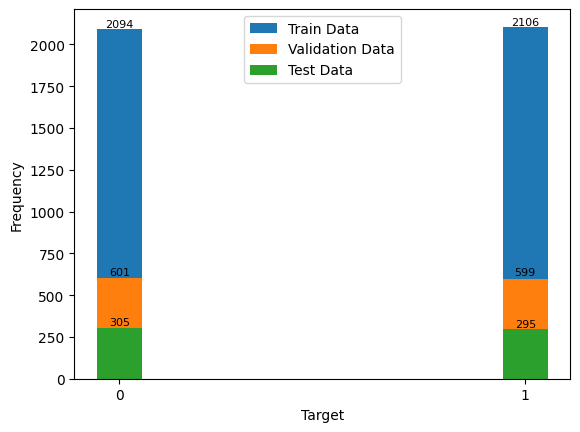

Number of tuples in Train Data: 4200
Number of tuples in Validation Data: 1200
Number of tuples in Test Data: 600


In [69]:
# Split target data into 3 parts with 70%, 20%, and 10% of the tuples
split_points = np.array([0.7, 0.9]) * len(target)
split_points = split_points.astype(int)
first_part = target[:split_points[0]]
second_part = target[split_points[0]:split_points[1]]
last_part = target[split_points[1]:]

# Plot histogram of each part
n1, bins1, patches1 = plt.hist(first_part, label='Train Data')
n2, bins2, patches2 = plt.hist(second_part, label='Validation Data')
n3, bins3, patches3 = plt.hist(last_part, label='Test Data')

# Find the bins that have bars
bins_with_bars1 = [bins1[i] for i in range(len(patches1)) if n1[i] > 0]
bins_with_bars2 = [bins2[j] for j in range(len(patches2)) if n2[j] > 0]
bins_with_bars3 = [bins3[k] for k in range(len(patches3)) if n3[k] > 0]

# Calculate the bar width
bar_width1 = bins1[1] - bins1[0]
bar_width2 = bins2[1] - bins2[0]
bar_width3 = bins3[1] - bins3[0]

# Set the x-tick locations and labels for bins with bars only
plt.xticks([b + bar_width1/2 for b in bins_with_bars1], [0,1])
plt.xticks([b + bar_width2/2 for b in bins_with_bars2], [0,1])
plt.xticks([b + bar_width3/2 for b in bins_with_bars3], [0,1])

# Add text labels to each bin
for i in range(len(patches1)):
    if n1[i] > 0:  # Only label bins with bars
        plt.text(x=bins1[i]+(bins1[i+1]-bins1[i])/2, y=n1[i]+10, s=int(n1[i]), ha='center', fontsize=8)
for j in range(len(patches2)):
    if n2[j] > 0:  # Only label bins with bars
        plt.text(x=bins2[j]+(bins2[j+1]-bins2[j])/2, y=n2[j]+20, s=int(n2[j]), ha='center', fontsize=8)
for k in range(len(patches3)):
    if n3[k] > 0:  # Only label bins with bars
        plt.text(x=bins3[k]+(bins3[k+1]-bins3[k])/2, y=n3[k]+15, s=int(n3[k]), ha='center', fontsize=8)

plt.xlabel('Target')
plt.ylabel('Frequency')
plt.legend(loc='upper center')

plt.show()

# Print number of tuples in each part
print(f"Number of tuples in Train Data: {first_part.shape[0]}")
print(f"Number of tuples in Validation Data: {second_part.shape[0]}")
print(f"Number of tuples in Test Data: {last_part.shape[0]}")

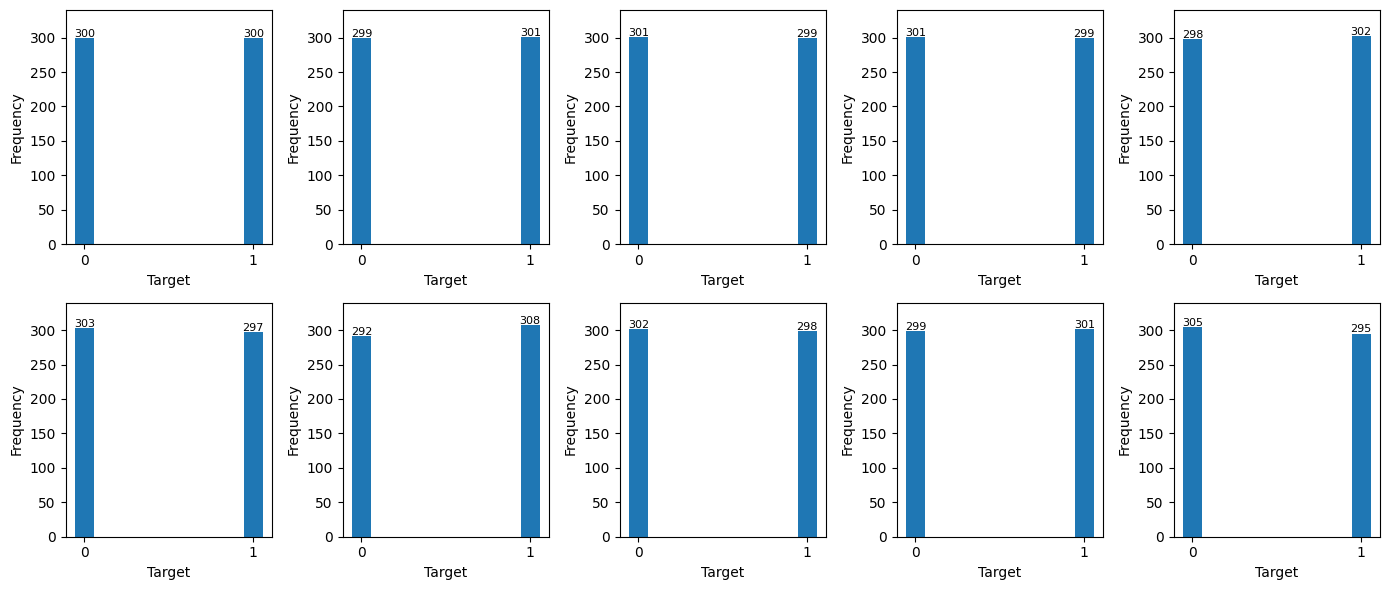

In [70]:
target = df['label_pass']
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 6))
for i, ax in enumerate(axes.ravel()):
    if i < 10:
        data = target[i*600:i*600+600]
        if len(set(data)) > 1:
            n, bins, patches = ax.hist(data)
            bins_with_bars = [bins[j] for j in range(len(patches)) if n[j] > 0]
            bar_width = bins[1] - bins[0]
            ax.set_xticks([b + bar_width/2 for b in bins_with_bars], [0,1])
            ax.set_ylim(0, 340)  # Set the y-axis limits for all subplots
            ax.set_xlabel('Target')
            ax.set_ylabel('Frequency')
            for j in range(len(patches)):
                if n[j] > 0:  # Only label bins with bars
                    ax.text(bins[j]+(bins[j+1]-bins[j])/2, n[j]+1.5, str(int(n[j])), ha='center', fontsize=8)
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

# Dataset 8000

In [71]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/dataset8000_sm9.csv')

# Convert the target variable to numerical values (yes' replaced with 1 and 'no' replaced with 0)
le = LabelEncoder()
df['label_pass'] = le.fit_transform(df['label_pass'])

# Split the DataFrame into data and target arrays
data = df.iloc[:, 1:-1].values  # Select all columns except the first and last ones as the data array
target = df.iloc[:, -1].values  # Select the last column as the target array

print(data[0],target[0])

[ 9.92280521e+05  1.10162726e+07  2.78834711e+02  8.51429752e+02
  8.23538876e+05  9.00528079e+06  4.32943315e+03  3.07037583e+03
  8.43270000e+04  8.68973000e+05 -9.77300000e+03 -5.37700000e+03
  2.77541100e+06  2.86374190e+07  8.42900000e+03  9.70800000e+03] 1


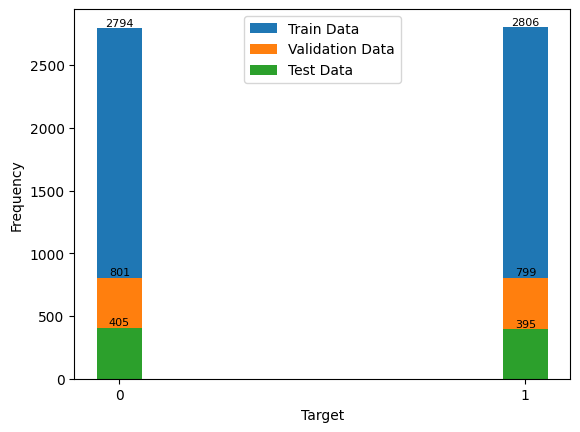

Number of tuples in Train Data: 5600
Number of tuples in Validation Data: 1600
Number of tuples in Test Data: 800


In [72]:
# Split target data into 3 parts with 70%, 20%, and 10% of the tuples
split_points = np.array([0.7, 0.9]) * len(target)
split_points = split_points.astype(int)
first_part = target[:split_points[0]]
second_part = target[split_points[0]:split_points[1]]
last_part = target[split_points[1]:]

# Plot histogram of each part
n1, bins1, patches1 = plt.hist(first_part, label='Train Data')
n2, bins2, patches2 = plt.hist(second_part, label='Validation Data')
n3, bins3, patches3 = plt.hist(last_part, label='Test Data')

# Find the bins that have bars
bins_with_bars1 = [bins1[i] for i in range(len(patches1)) if n1[i] > 0]
bins_with_bars2 = [bins2[j] for j in range(len(patches2)) if n2[j] > 0]
bins_with_bars3 = [bins3[k] for k in range(len(patches3)) if n3[k] > 0]

# Calculate the bar width
bar_width1 = bins1[1] - bins1[0]
bar_width2 = bins2[1] - bins2[0]
bar_width3 = bins3[1] - bins3[0]

# Set the x-tick locations and labels for bins with bars only
plt.xticks([b + bar_width1/2 for b in bins_with_bars1], [0,1])
plt.xticks([b + bar_width2/2 for b in bins_with_bars2], [0,1])
plt.xticks([b + bar_width3/2 for b in bins_with_bars3], [0,1])

# Add text labels to each bin
for i in range(len(patches1)):
    if n1[i] > 0:  # Only label bins with bars
        plt.text(x=bins1[i]+(bins1[i+1]-bins1[i])/2, y=n1[i]+15, s=int(n1[i]), ha='center', fontsize=8)
for j in range(len(patches2)):
    if n2[j] > 0:  # Only label bins with bars
        plt.text(x=bins2[j]+(bins2[j+1]-bins2[j])/2, y=n2[j]+25, s=int(n2[j]), ha='center', fontsize=8)
for k in range(len(patches3)):
    if n3[k] > 0:  # Only label bins with bars
        plt.text(x=bins3[k]+(bins3[k+1]-bins3[k])/2, y=n3[k]+20, s=int(n3[k]), ha='center', fontsize=8)

plt.xlabel('Target')
plt.ylabel('Frequency')
plt.legend(loc='upper center')

plt.show()

# Print number of tuples in each part
print(f"Number of tuples in Train Data: {first_part.shape[0]}")
print(f"Number of tuples in Validation Data: {second_part.shape[0]}")
print(f"Number of tuples in Test Data: {last_part.shape[0]}")

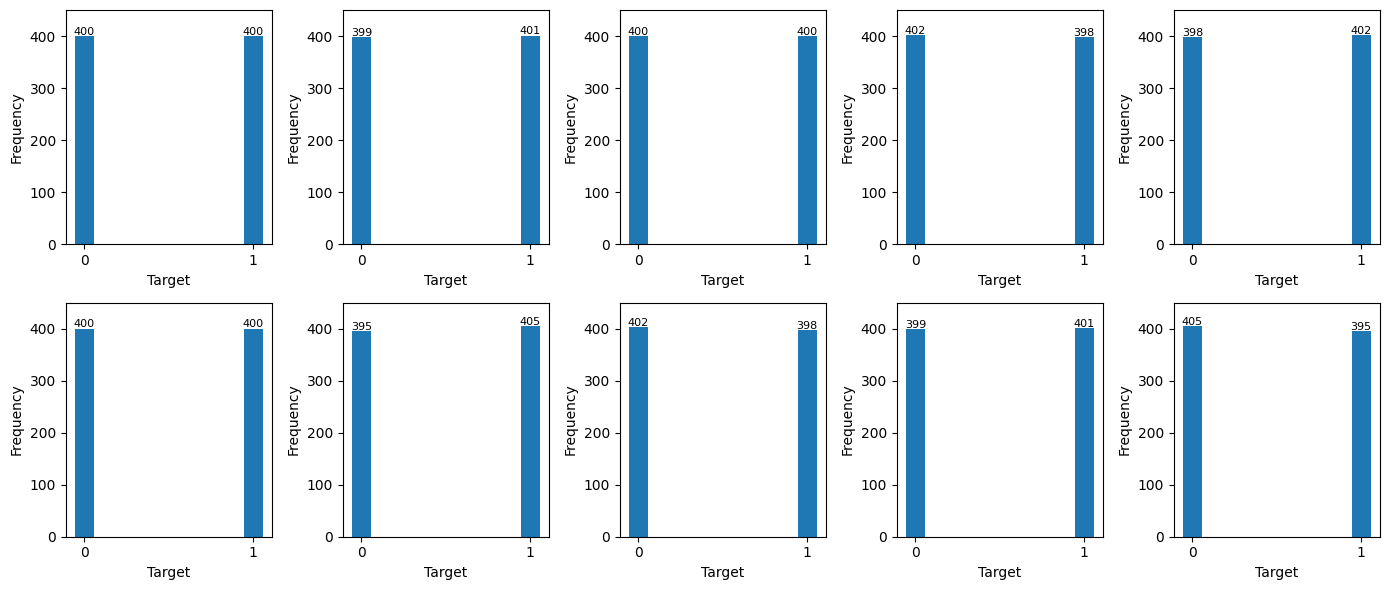

In [73]:
target = df['label_pass']
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 6))
for i, ax in enumerate(axes.ravel()):
    if i < 10:
        data = target[i*800:i*800+800]
        if len(set(data)) > 1:
            n, bins, patches = ax.hist(data)
            bins_with_bars = [bins[j] for j in range(len(patches)) if n[j] > 0]
            bar_width = bins[1] - bins[0]
            ax.set_xticks([b + bar_width/2 for b in bins_with_bars], [0,1])
            ax.set_ylim(0, 450)  # Set the y-axis limits for all subplots
            ax.set_xlabel('Target')
            ax.set_ylabel('Frequency')
            for j in range(len(patches)):
                if n[j] > 0:  # Only label bins with bars
                    ax.text(bins[j]+(bins[j+1]-bins[j])/2, n[j]+2, str(int(n[j])), ha='center', fontsize=8)
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

# Dataset 10000

In [74]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/dataset10000_sm9.csv')

# Convert the target variable to numerical values (yes' replaced with 1 and 'no' replaced with 0)
le = LabelEncoder()
df['label_pass'] = le.fit_transform(df['label_pass'])

# Split the DataFrame into data and target arrays
data = df.iloc[:, 1:-1].values  # Select all columns except the first and last ones as the data array
target = df.iloc[:, -1].values  # Select the last column as the target array

print(data[0],target[0])

[ 9.92280521e+05  1.10162726e+07  2.78834711e+02  8.51429752e+02
  8.23538876e+05  9.00528079e+06  4.32943315e+03  3.07037583e+03
  8.43270000e+04  8.68973000e+05 -9.77300000e+03 -5.37700000e+03
  2.77541100e+06  2.86374190e+07  8.42900000e+03  9.70800000e+03] 1


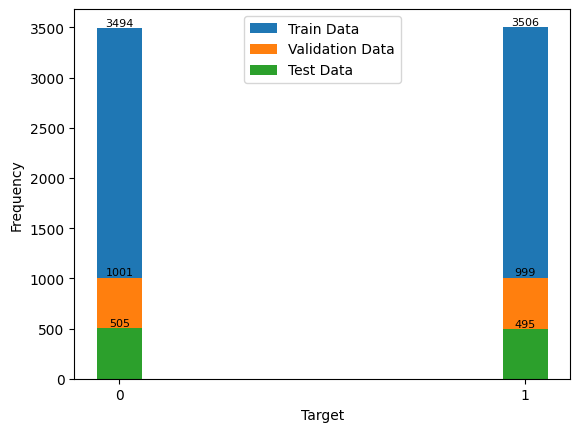

Number of tuples in Train Data: 7000
Number of tuples in Validation Data: 2000
Number of tuples in Test Data: 1000


In [75]:
# Split target data into 3 parts with 70%, 20%, and 10% of the tuples
split_points = np.array([0.7, 0.9]) * len(target)
split_points = split_points.astype(int)
first_part = target[:split_points[0]]
second_part = target[split_points[0]:split_points[1]]
last_part = target[split_points[1]:]

# Plot histogram of each part
n1, bins1, patches1 = plt.hist(first_part, label='Train Data')
n2, bins2, patches2 = plt.hist(second_part, label='Validation Data')
n3, bins3, patches3 = plt.hist(last_part, label='Test Data')

# Find the bins that have bars
bins_with_bars1 = [bins1[i] for i in range(len(patches1)) if n1[i] > 0]
bins_with_bars2 = [bins2[j] for j in range(len(patches2)) if n2[j] > 0]
bins_with_bars3 = [bins3[k] for k in range(len(patches3)) if n3[k] > 0]

# Calculate the bar width
bar_width1 = bins1[1] - bins1[0]
bar_width2 = bins2[1] - bins2[0]
bar_width3 = bins3[1] - bins3[0]

# Set the x-tick locations and labels for bins with bars only
plt.xticks([b + bar_width1/2 for b in bins_with_bars1], [0,1])
plt.xticks([b + bar_width2/2 for b in bins_with_bars2], [0,1])
plt.xticks([b + bar_width3/2 for b in bins_with_bars3], [0,1])

# Add text labels to each bin
for i in range(len(patches1)):
    if n1[i] > 0:  # Only label bins with bars
        plt.text(x=bins1[i]+(bins1[i+1]-bins1[i])/2, y=n1[i]+20, s=int(n1[i]), ha='center', fontsize=8)
for j in range(len(patches2)):
    if n2[j] > 0:  # Only label bins with bars
        plt.text(x=bins2[j]+(bins2[j+1]-bins2[j])/2, y=n2[j]+30, s=int(n2[j]), ha='center', fontsize=8)
for k in range(len(patches3)):
    if n3[k] > 0: # Only label bins with bars
        plt.text(x=bins3[k]+(bins3[k+1]-bins3[k])/2, y=n3[k]+20, s=int(n3[k]), ha='center', fontsize=8)

plt.xlabel('Target')
plt.ylabel('Frequency')
plt.legend(loc='upper center')

plt.show()

# Print number of tuples in each part
print(f"Number of tuples in Train Data: {first_part.shape[0]}")
print(f"Number of tuples in Validation Data: {second_part.shape[0]}")
print(f"Number of tuples in Test Data: {last_part.shape[0]}")

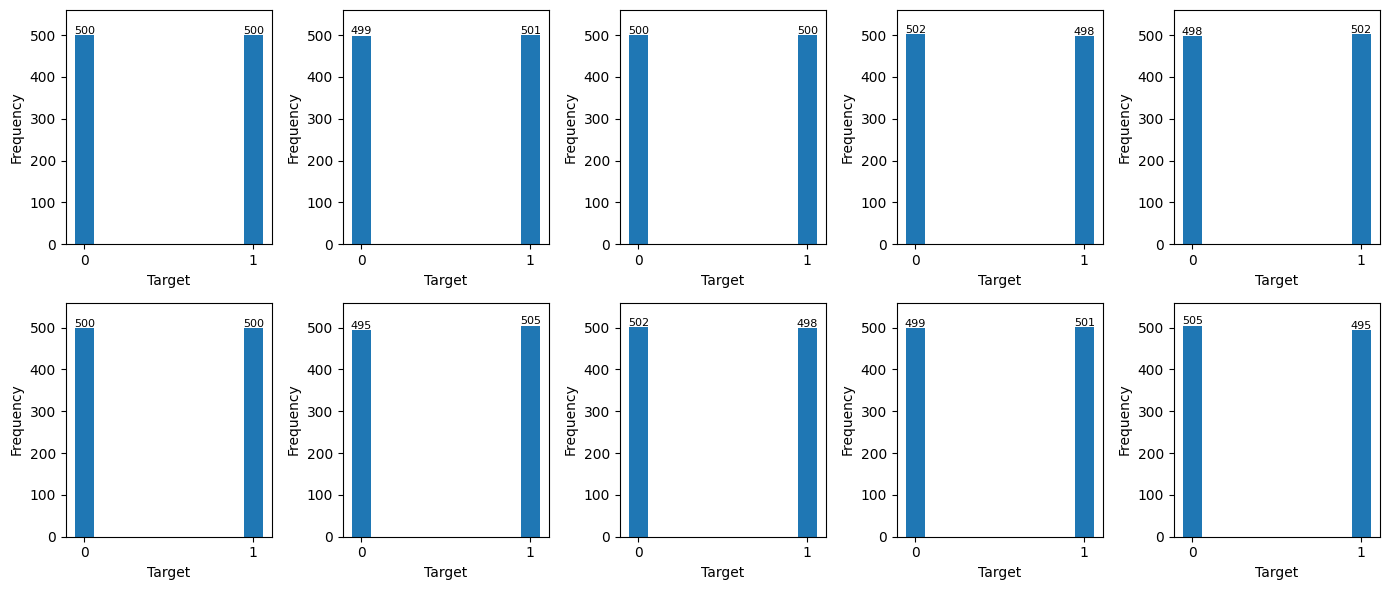

In [76]:
target = df['label_pass']
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 6))
for i, ax in enumerate(axes.ravel()):
    if i < 10:
        data = target[i*1000:i*1000+1000]
        if len(set(data)) > 1:
            n, bins, patches = ax.hist(data)
            bins_with_bars = [bins[j] for j in range(len(patches)) if n[j] > 0]
            bar_width = bins[1] - bins[0]
            ax.set_xticks([b + bar_width/2 for b in bins_with_bars], [0,1])
            ax.set_ylim(0, 560)  # Set the y-axis limits for all subplots
            ax.set_xlabel('Target')
            ax.set_ylabel('Frequency')
            for j in range(len(patches)):
                if n[j] > 0:  # Only label bins with bars
                    ax.text(bins[j]+(bins[j+1]-bins[j])/2, n[j]+2.5, str(int(n[j])), ha='center', fontsize=8)
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

# Dataset for C-SMOTE

Imbalanced dataset preparation for C-SMOTE

In [2]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/dataset1500.csv')

# Convert the target variable to numerical values ('yes' replaced with 1 and 'no' replaced with 0)
le = LabelEncoder()
df['label_pass'] = le.fit_transform(df['label_pass'])

# Drop the first 2 columns
df = df.drop(df.columns[[0, 1]], axis=1)

# Save the modified DataFrame as a new CSV file
df.to_csv('data/dataset1500_moa.csv', index=False)

In [3]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/dataset2500.csv')

# Convert the target variable to numerical values ('yes' replaced with 1 and 'no' replaced with 0)
le = LabelEncoder()
df['label_pass'] = le.fit_transform(df['label_pass'])

# Drop the first 2 columns
df = df.drop(df.columns[[0, 1]], axis=1)

# Save the modified DataFrame as a new CSV file
df.to_csv('data/dataset2500_moa.csv', index=False)

In [4]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/dataset3500.csv')

# Convert the target variable to numerical values ('yes' replaced with 1 and 'no' replaced with 0)
le = LabelEncoder()
df['label_pass'] = le.fit_transform(df['label_pass'])

# Drop the first 2 columns
df = df.drop(df.columns[[0, 1]], axis=1)

# Save the modified DataFrame as a new CSV file
df.to_csv('data/dataset3500_moa.csv', index=False)

In [5]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/dataset4500.csv')

# Convert the target variable to numerical values ('yes' replaced with 1 and 'no' replaced with 0)
le = LabelEncoder()
df['label_pass'] = le.fit_transform(df['label_pass'])

# Drop the first 2 columns
df = df.drop(df.columns[[0, 1]], axis=1)

# Save the modified DataFrame as a new CSV file
df.to_csv('data/dataset4500_moa.csv', index=False)

In [6]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/dataset5500.csv')

# Convert the target variable to numerical values ('yes' replaced with 1 and 'no' replaced with 0)
le = LabelEncoder()
df['label_pass'] = le.fit_transform(df['label_pass'])

# Drop the first 2 columns
df = df.drop(df.columns[[0, 1]], axis=1)

# Save the modified DataFrame as a new CSV file
df.to_csv('data/dataset5500_moa.csv', index=False)

## Dataset 2910 (C-SMOTE)

In [45]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/dataset_2910_moa_1500.csv')

# Split the DataFrame into data and target arrays
data = df.iloc[:, :-1].values  # Select all columns except the last one as the data array
target = df.iloc[:, -1].values.astype(int)  # Select the last column as the target array and Convert float to int

print(df.shape)
print(data[0],target[0])

(2910, 17)
[ 9.92280521e+05  1.10162726e+07  2.78834711e+02  8.51429752e+02
  8.23538876e+05  9.00528079e+06  4.32943315e+03  3.07037583e+03
  8.43270000e+04  8.68973000e+05 -9.77300000e+03 -5.37700000e+03
  2.77541100e+06  2.86374190e+07  8.42900000e+03  9.70800000e+03] 1


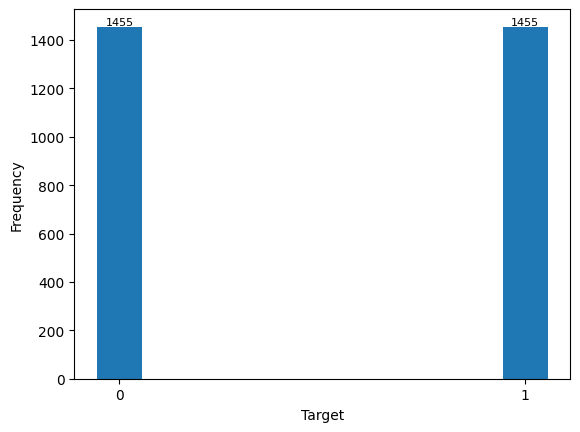

In [46]:
# Plot the histogram
n, bins, patches = plt.hist(target)

# Find the bins that have bars
bins_with_bars = [bins[i] for i in range(len(patches)) if n[i] > 0]

# Calculate the bar width
bar_width = bins[1] - bins[0]

# Set the x-tick locations and labels for bins with bars only
plt.xticks([b + bar_width/2 for b in bins_with_bars], [0,1])

# Plot the values for the bars
for i in range(len(patches)):
    if n[i] > 0:  # Only label bins with bars
        plt.text(x=bins[i]+(bins[i+1]-bins[i])/2, y=n[i]+5, s=int(n[i]), ha='center', fontsize=8)

# Set the axis labels and title
plt.xlabel('Target')
plt.ylabel('Frequency')

# Show the plot
plt.show()

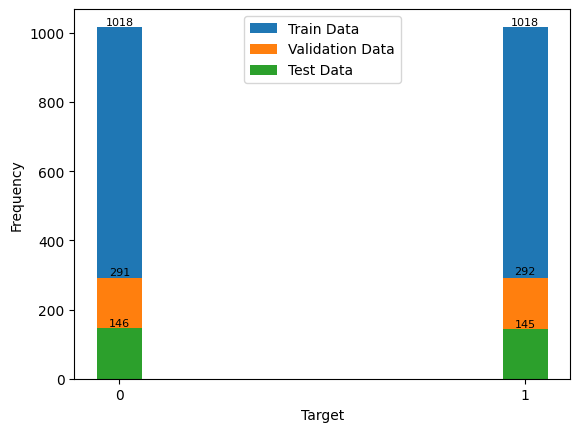

Number of tuples in Train Data: 2036
Number of tuples in Validation Data: 583
Number of tuples in Test Data: 291


In [47]:
# Split target data into 3 parts with 70%, 20%, and 10% of the tuples
split_points = np.array([0.7, 0.9]) * len(target)
split_points = split_points.astype(int)
first_part = target[:split_points[0]]
second_part = target[split_points[0]:split_points[1]]
last_part = target[split_points[1]:]

# Plot histogram of each part
n1, bins1, patches1 = plt.hist(first_part, label='Train Data')
n2, bins2, patches2 = plt.hist(second_part, label='Validation Data')
n3, bins3, patches3 = plt.hist(last_part, label='Test Data')

# Find the bins that have bars
bins_with_bars1 = [bins1[i] for i in range(len(patches1)) if n1[i] > 0]
bins_with_bars2 = [bins2[j] for j in range(len(patches2)) if n2[j] > 0]
bins_with_bars3 = [bins3[k] for k in range(len(patches3)) if n3[k] > 0]

# Calculate the bar width
bar_width1 = bins1[1] - bins1[0]
bar_width2 = bins2[1] - bins2[0]
bar_width3 = bins3[1] - bins3[0]

# Set the x-tick locations and labels for bins with bars only
plt.xticks([b + bar_width1/2 for b in bins_with_bars1], [0,1])
plt.xticks([b + bar_width2/2 for b in bins_with_bars2], [0,1])
plt.xticks([b + bar_width3/2 for b in bins_with_bars3], [0,1])

# Add text labels to each bin
for i in range(len(patches1)):
    if n1[i] > 0:  # Only label bins with bars
        plt.text(x=bins1[i]+(bins1[i+1]-bins1[i])/2, y=n1[i]+5, s=int(n1[i]), ha='center', fontsize=8)
for j in range(len(patches2)):
    if n2[j] > 0:  # Only label bins with bars
        plt.text(x=bins2[j]+(bins2[j+1]-bins2[j])/2, y=n2[j]+10, s=int(n2[j]), ha='center', fontsize=8)
for k in range(len(patches3)):
    if n3[k] > 0:  # Only label bins with bars
        plt.text(x=bins3[k]+(bins3[k+1]-bins3[k])/2, y=n3[k]+5, s=int(n3[k]), ha='center', fontsize=8)

plt.xlabel('Target')
plt.ylabel('Frequency')
plt.legend(loc='upper center')

plt.show()

# Print number of tuples in each part
print(f"Number of tuples in Train Data: {first_part.shape[0]}")
print(f"Number of tuples in Validation Data: {second_part.shape[0]}")
print(f"Number of tuples in Test Data: {last_part.shape[0]}")

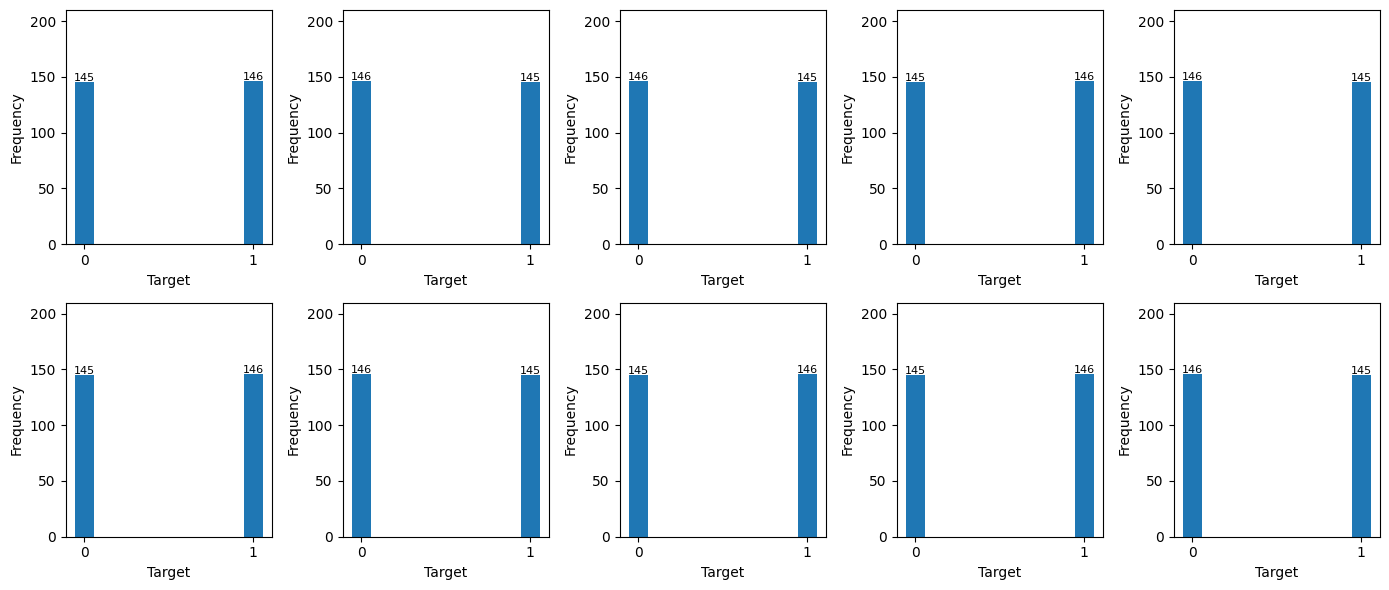

In [48]:
target = df['label_pass']
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 6))
for i, ax in enumerate(axes.ravel()):
    if i < 10:
        data = target[i*291:i*291+291]
        if len(set(data)) > 1:
            n, bins, patches = ax.hist(data)
            bins_with_bars = [bins[j] for j in range(len(patches)) if n[j] > 0]
            bar_width = bins[1] - bins[0]
            ax.set_xticks([b + bar_width/2 for b in bins_with_bars], [0,1])
            ax.set_ylim(0, 210)  # Set the y-axis limits for all subplots
            ax.set_xlabel('Target')
            ax.set_ylabel('Frequency')
            for j in range(len(patches)):
                if n[j] > 0:  # Only label bins with bars
                    ax.text(bins[j]+(bins[j+1]-bins[j])/2, n[j]+1, str(int(n[j])), ha='center', fontsize=8)
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

## Dataset 4910 (C-SMOTE)

In [49]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/dataset_4910_moa_2500.csv')

# Split the DataFrame into data and target arrays
data = df.iloc[:, :-1].values  # Select all columns except the last one as the data array
target = df.iloc[:, -1].values.astype(int)  # Select the last column as the target array and Convert float to int

print(df.shape)
print(data[0],target[0])

(4910, 17)
[ 9.92280521e+05  1.10162726e+07  2.78834711e+02  8.51429752e+02
  8.23538876e+05  9.00528079e+06  4.32943315e+03  3.07037583e+03
  8.43270000e+04  8.68973000e+05 -9.77300000e+03 -5.37700000e+03
  2.77541100e+06  2.86374190e+07  8.42900000e+03  9.70800000e+03] 1


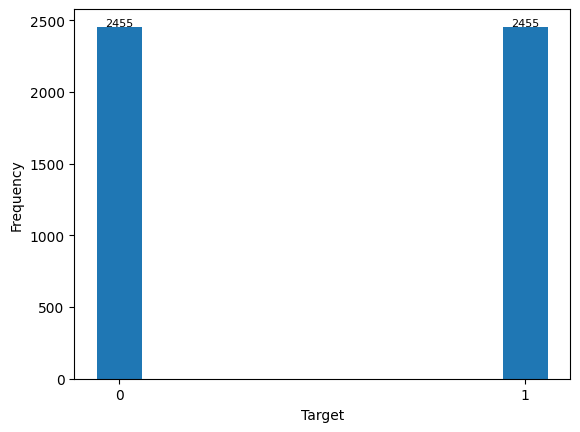

In [50]:
# Plot the histogram
n, bins, patches = plt.hist(target)

# Find the bins that have bars
bins_with_bars = [bins[i] for i in range(len(patches)) if n[i] > 0]

# Calculate the bar width
bar_width = bins[1] - bins[0]

# Set the x-tick locations and labels for bins with bars only
plt.xticks([b + bar_width/2 for b in bins_with_bars], [0,1])

# Plot the values for the bars
for i in range(len(patches)):
    if n[i] > 0:  # Only label bins with bars
        plt.text(x=bins[i]+(bins[i+1]-bins[i])/2, y=n[i]+5, s=int(n[i]), ha='center', fontsize=8)

# Set the axis labels and title
plt.xlabel('Target')
plt.ylabel('Frequency')

# Show the plot
plt.show()

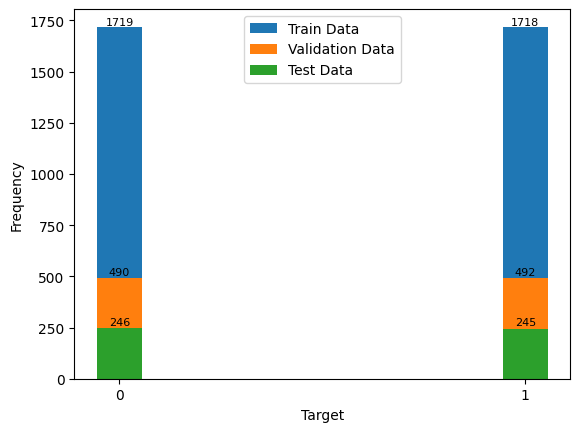

Number of tuples in Train Data: 3437
Number of tuples in Validation Data: 982
Number of tuples in Test Data: 491


In [51]:
# Split target data into 3 parts with 70%, 20%, and 10% of the tuples
split_points = np.array([0.7, 0.9]) * len(target)
split_points = split_points.astype(int)
first_part = target[:split_points[0]]
second_part = target[split_points[0]:split_points[1]]
last_part = target[split_points[1]:]

# Plot histogram of each part
n1, bins1, patches1 = plt.hist(first_part, label='Train Data')
n2, bins2, patches2 = plt.hist(second_part, label='Validation Data')
n3, bins3, patches3 = plt.hist(last_part, label='Test Data')

# Find the bins that have bars
bins_with_bars1 = [bins1[i] for i in range(len(patches1)) if n1[i] > 0]
bins_with_bars2 = [bins2[j] for j in range(len(patches2)) if n2[j] > 0]
bins_with_bars3 = [bins3[k] for k in range(len(patches3)) if n3[k] > 0]

# Calculate the bar width
bar_width1 = bins1[1] - bins1[0]
bar_width2 = bins2[1] - bins2[0]
bar_width3 = bins3[1] - bins3[0]

# Set the x-tick locations and labels for bins with bars only
plt.xticks([b + bar_width1/2 for b in bins_with_bars1], [0,1])
plt.xticks([b + bar_width2/2 for b in bins_with_bars2], [0,1])
plt.xticks([b + bar_width3/2 for b in bins_with_bars3], [0,1])

# Add text labels to each bin
for i in range(len(patches1)):
    if n1[i] > 0:  # Only label bins with bars
        plt.text(x=bins1[i]+(bins1[i+1]-bins1[i])/2, y=n1[i]+10, s=int(n1[i]), ha='center', fontsize=8)
for j in range(len(patches2)):
    if n2[j] > 0:  # Only label bins with bars
        plt.text(x=bins2[j]+(bins2[j+1]-bins2[j])/2, y=n2[j]+15, s=int(n2[j]), ha='center', fontsize=8)
for k in range(len(patches3)):
    if n3[k] > 0:  # Only label bins with bars
        plt.text(x=bins3[k]+(bins3[k+1]-bins3[k])/2, y=n3[k]+15, s=int(n3[k]), ha='center', fontsize=8)

plt.xlabel('Target')
plt.ylabel('Frequency')
plt.legend(loc='upper center')

plt.show()

# Print number of tuples in each part
print(f"Number of tuples in Train Data: {first_part.shape[0]}")
print(f"Number of tuples in Validation Data: {second_part.shape[0]}")
print(f"Number of tuples in Test Data: {last_part.shape[0]}")

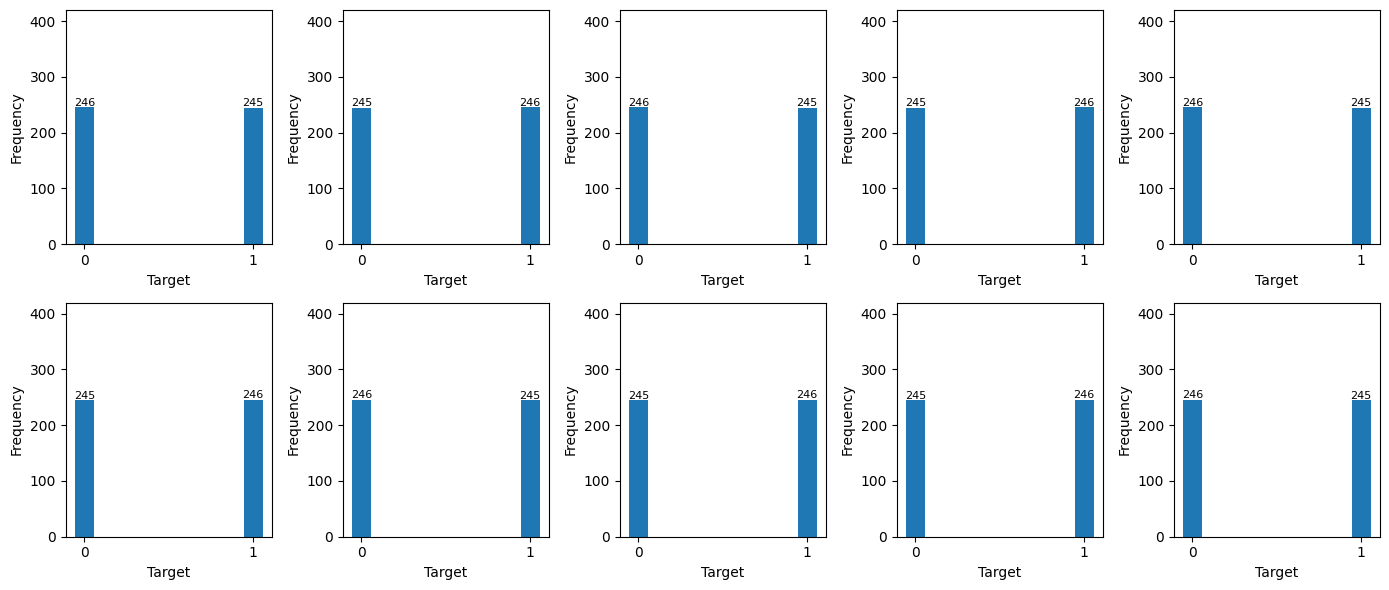

In [52]:
target = df['label_pass']
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 6))
for i, ax in enumerate(axes.ravel()):
    if i < 10:
        data = target[i*491:i*491+491]
        if len(set(data)) > 1:
            n, bins, patches = ax.hist(data)
            bins_with_bars = [bins[j] for j in range(len(patches)) if n[j] > 0]
            bar_width = bins[1] - bins[0]
            ax.set_xticks([b + bar_width/2 for b in bins_with_bars], [0,1])
            ax.set_ylim(0, 420)  # Set the y-axis limits for all subplots
            ax.set_xlabel('Target')
            ax.set_ylabel('Frequency')
            for j in range(len(patches)):
                if n[j] > 0:  # Only label bins with bars
                    ax.text(bins[j]+(bins[j+1]-bins[j])/2, n[j]+2, str(int(n[j])), ha='center', fontsize=8)
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

## Dataset 7169 (C-SMOTE)

In [53]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/dataset_7169_moa_3500.csv')

# Split the DataFrame into data and target arrays
data = df.iloc[:, :-1].values  # Select all columns except the last one as the data array
target = df.iloc[:, -1].values.astype(int)  # Select the last column as the target array and Convert float to int

print(df.shape)
print(data[0],target[0])

(7169, 17)
[ 9.92280521e+05  1.10162726e+07  2.78834711e+02  8.51429752e+02
  8.23538876e+05  9.00528079e+06  4.32943315e+03  3.07037583e+03
  8.43270000e+04  8.68973000e+05 -9.77300000e+03 -5.37700000e+03
  2.77541100e+06  2.86374190e+07  8.42900000e+03  9.70800000e+03] 1


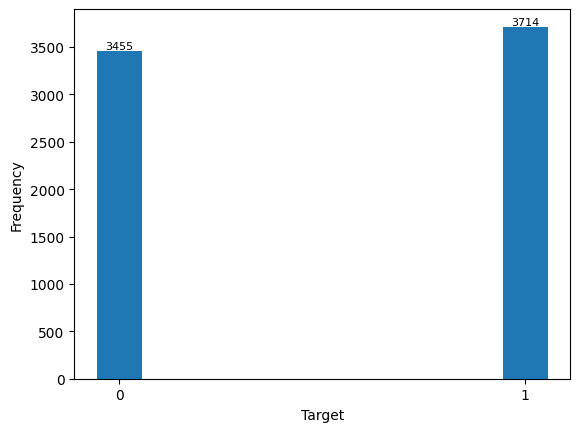

In [54]:
# Plot the histogram
n, bins, patches = plt.hist(target)

# Find the bins that have bars
bins_with_bars = [bins[i] for i in range(len(patches)) if n[i] > 0]

# Calculate the bar width
bar_width = bins[1] - bins[0]

# Set the x-tick locations and labels for bins with bars only
plt.xticks([b + bar_width/2 for b in bins_with_bars], [0,1])

# Plot the values for the bars
for i in range(len(patches)):
    if n[i] > 0:  # Only label bins with bars
        plt.text(x=bins[i]+(bins[i+1]-bins[i])/2, y=n[i]+20, s=int(n[i]), ha='center', fontsize=8)

# Set the axis labels and title
plt.xlabel('Target')
plt.ylabel('Frequency')

# Show the plot
plt.show()

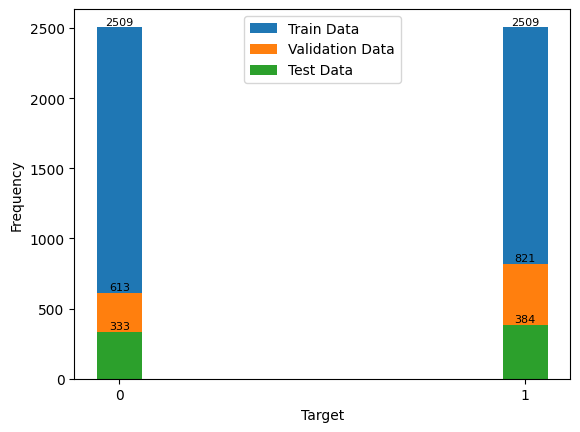

Number of tuples in Train Data: 5018
Number of tuples in Validation Data: 1434
Number of tuples in Test Data: 717


In [55]:
# Split target data into 3 parts with 70%, 20%, and 10% of the tuples
split_points = np.array([0.7, 0.9]) * len(target)
split_points = split_points.astype(int)
first_part = target[:split_points[0]]
second_part = target[split_points[0]:split_points[1]]
last_part = target[split_points[1]:]

# Plot histogram of each part
n1, bins1, patches1 = plt.hist(first_part, label='Train Data')
n2, bins2, patches2 = plt.hist(second_part, label='Validation Data')
n3, bins3, patches3 = plt.hist(last_part, label='Test Data')

# Find the bins that have bars
bins_with_bars1 = [bins1[i] for i in range(len(patches1)) if n1[i] > 0]
bins_with_bars2 = [bins2[j] for j in range(len(patches2)) if n2[j] > 0]
bins_with_bars3 = [bins3[k] for k in range(len(patches3)) if n3[k] > 0]

# Calculate the bar width
bar_width1 = bins1[1] - bins1[0]
bar_width2 = bins2[1] - bins2[0]
bar_width3 = bins3[1] - bins3[0]

# Set the x-tick locations and labels for bins with bars only
plt.xticks([b + bar_width1/2 for b in bins_with_bars1], [0,1])
plt.xticks([b + bar_width2/2 for b in bins_with_bars2], [0,1])
plt.xticks([b + bar_width3/2 for b in bins_with_bars3], [0,1])

# Add text labels to each bin
for i in range(len(patches1)):
    if n1[i] > 0:  # Only label bins with bars
        plt.text(x=bins1[i]+(bins1[i+1]-bins1[i])/2, y=n1[i]+10, s=int(n1[i]), ha='center', fontsize=8)
for j in range(len(patches2)):
    if n2[j] > 0:  # Only label bins with bars
        plt.text(x=bins2[j]+(bins2[j+1]-bins2[j])/2, y=n2[j]+20, s=int(n2[j]), ha='center', fontsize=8)
for k in range(len(patches3)):
    if n3[k] > 0:  # Only label bins with bars
        plt.text(x=bins3[k]+(bins3[k+1]-bins3[k])/2, y=n3[k]+20, s=int(n3[k]), ha='center', fontsize=8)

plt.xlabel('Target')
plt.ylabel('Frequency')
plt.legend(loc='upper center')

plt.show()

# Print number of tuples in each part
print(f"Number of tuples in Train Data: {first_part.shape[0]}")
print(f"Number of tuples in Validation Data: {second_part.shape[0]}")
print(f"Number of tuples in Test Data: {last_part.shape[0]}")

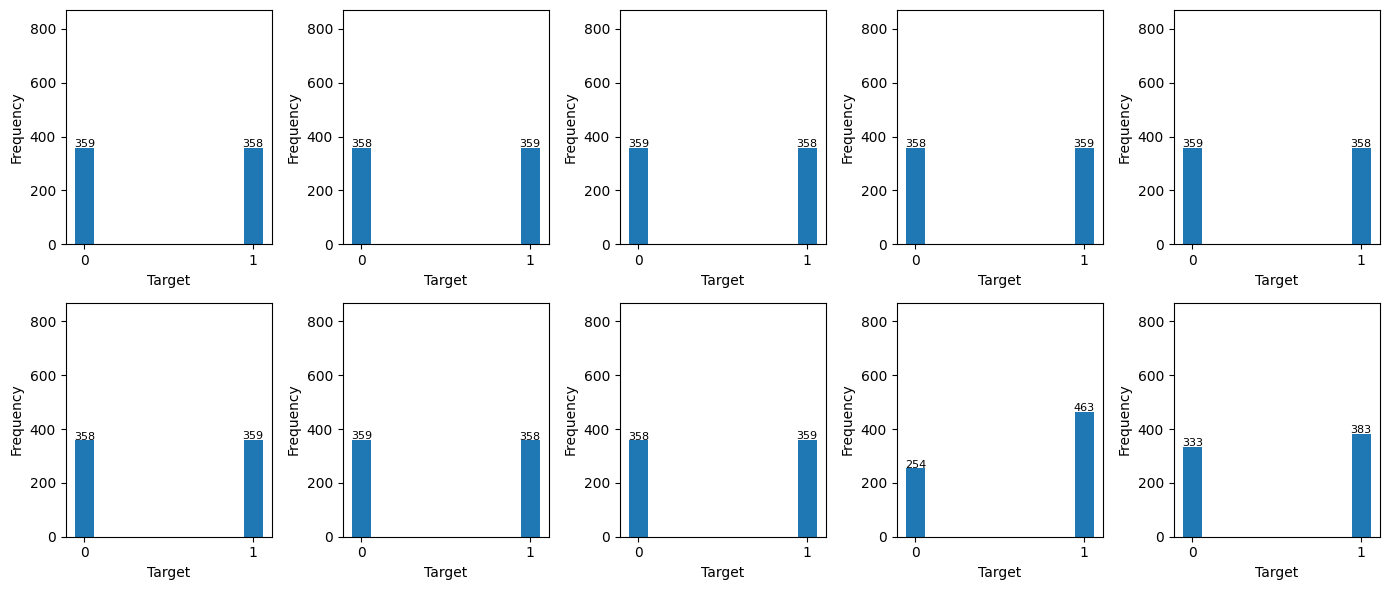

In [57]:
target = df['label_pass']
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 6))
for i, ax in enumerate(axes.ravel()):
    if i < 10:
        data = target[i*717:i*717+717]
        if len(set(data)) > 1:
            n, bins, patches = ax.hist(data)
            bins_with_bars = [bins[j] for j in range(len(patches)) if n[j] > 0]
            bar_width = bins[1] - bins[0]
            ax.set_xticks([b + bar_width/2 for b in bins_with_bars], [0,1])
            ax.set_ylim(0, 870)  # Set the y-axis limits for all subplots
            ax.set_xlabel('Target')
            ax.set_ylabel('Frequency')
            for j in range(len(patches)):
                if n[j] > 0:  # Only label bins with bars
                    ax.text(bins[j]+(bins[j+1]-bins[j])/2, n[j]+2.5, str(int(n[j])), ha='center', fontsize=8)
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

## Dataset 9006 (C-SMOTE)

In [58]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/dataset_9006_moa_4500.csv')

# Split the DataFrame into data and target arrays
data = df.iloc[:, :-1].values  # Select all columns except the last one as the data array
target = df.iloc[:, -1].values.astype(int)  # Select the last column as the target array and Convert float to int

print(df.shape)
print(data[0],target[0])

(9006, 17)
[ 9.92280521e+05  1.10162726e+07  2.78834711e+02  8.51429752e+02
  8.23538876e+05  9.00528079e+06  4.32943315e+03  3.07037583e+03
  8.43270000e+04  8.68973000e+05 -9.77300000e+03 -5.37700000e+03
  2.77541100e+06  2.86374190e+07  8.42900000e+03  9.70800000e+03] 1


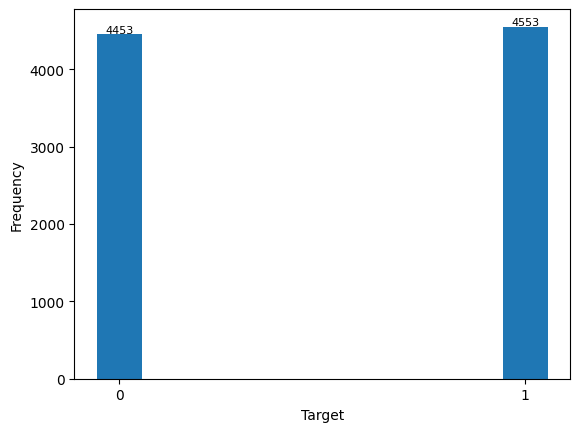

In [59]:
# Plot the histogram
n, bins, patches = plt.hist(target)

# Find the bins that have bars
bins_with_bars = [bins[i] for i in range(len(patches)) if n[i] > 0]

# Calculate the bar width
bar_width = bins[1] - bins[0]

# Set the x-tick locations and labels for bins with bars only
plt.xticks([b + bar_width/2 for b in bins_with_bars], [0,1])

# Plot the values for the bars
for i in range(len(patches)):
    if n[i] > 0:  # Only label bins with bars
        plt.text(x=bins[i]+(bins[i+1]-bins[i])/2, y=n[i]+20, s=int(n[i]), ha='center', fontsize=8)

# Set the axis labels and title
plt.xlabel('Target')
plt.ylabel('Frequency')

# Show the plot
plt.show()

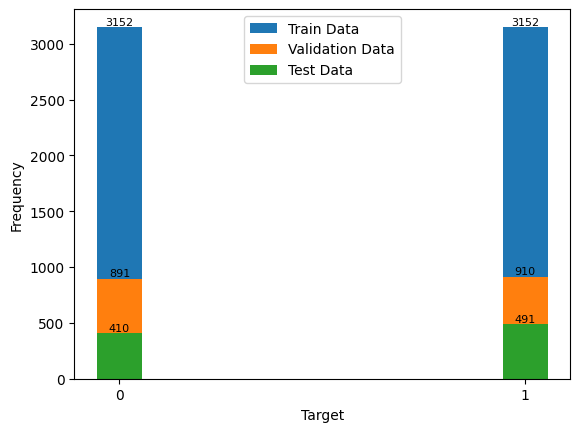

Number of tuples in Train Data: 6304
Number of tuples in Validation Data: 1801
Number of tuples in Test Data: 901


In [60]:
# Split target data into 3 parts with 70%, 20%, and 10% of the tuples
split_points = np.array([0.7, 0.9]) * len(target)
split_points = split_points.astype(int)
first_part = target[:split_points[0]]
second_part = target[split_points[0]:split_points[1]]
last_part = target[split_points[1]:]

# Plot histogram of each part
n1, bins1, patches1 = plt.hist(first_part, label='Train Data')
n2, bins2, patches2 = plt.hist(second_part, label='Validation Data')
n3, bins3, patches3 = plt.hist(last_part, label='Test Data')

# Find the bins that have bars
bins_with_bars1 = [bins1[i] for i in range(len(patches1)) if n1[i] > 0]
bins_with_bars2 = [bins2[j] for j in range(len(patches2)) if n2[j] > 0]
bins_with_bars3 = [bins3[k] for k in range(len(patches3)) if n3[k] > 0]

# Calculate the bar width
bar_width1 = bins1[1] - bins1[0]
bar_width2 = bins2[1] - bins2[0]
bar_width3 = bins3[1] - bins3[0]

# Set the x-tick locations and labels for bins with bars only
plt.xticks([b + bar_width1/2 for b in bins_with_bars1], [0,1])
plt.xticks([b + bar_width2/2 for b in bins_with_bars2], [0,1])
plt.xticks([b + bar_width3/2 for b in bins_with_bars3], [0,1])

# Add text labels to each bin
for i in range(len(patches1)):
    if n1[i] > 0:  # Only label bins with bars
        plt.text(x=bins1[i]+(bins1[i+1]-bins1[i])/2, y=n1[i]+15, s=int(n1[i]), ha='center', fontsize=8)
for j in range(len(patches2)):
    if n2[j] > 0:  # Only label bins with bars
        plt.text(x=bins2[j]+(bins2[j+1]-bins2[j])/2, y=n2[j]+25, s=int(n2[j]), ha='center', fontsize=8)
for k in range(len(patches3)):
    if n3[k] > 0:  # Only label bins with bars
        plt.text(x=bins3[k]+(bins3[k+1]-bins3[k])/2, y=n3[k]+15, s=int(n3[k]), ha='center', fontsize=8)

plt.xlabel('Target')
plt.ylabel('Frequency')
plt.legend(loc='upper center')

plt.show()

# Print number of tuples in each part
print(f"Number of tuples in Train Data: {first_part.shape[0]}")
print(f"Number of tuples in Validation Data: {second_part.shape[0]}")
print(f"Number of tuples in Test Data: {last_part.shape[0]}")

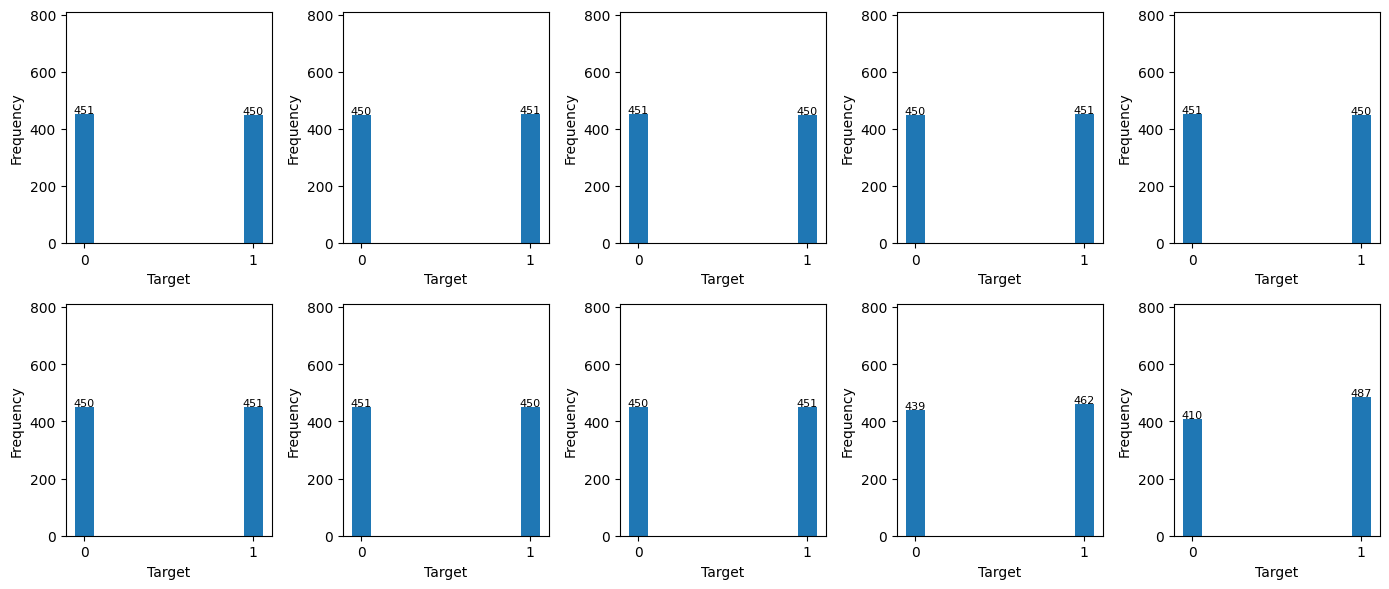

In [62]:
target = df['label_pass']
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 6))
for i, ax in enumerate(axes.ravel()):
    if i < 10:
        data = target[i*901:i*901+901]
        if len(set(data)) > 1:
            n, bins, patches = ax.hist(data)
            bins_with_bars = [bins[j] for j in range(len(patches)) if n[j] > 0]
            bar_width = bins[1] - bins[0]
            ax.set_xticks([b + bar_width/2 for b in bins_with_bars], [0,1])
            ax.set_ylim(0, 810)  # Set the y-axis limits for all subplots
            ax.set_xlabel('Target')
            ax.set_ylabel('Frequency')
            for j in range(len(patches)):
                if n[j] > 0:  # Only label bins with bars
                    ax.text(bins[j]+(bins[j+1]-bins[j])/2, n[j]+3, str(int(n[j])), ha='center', fontsize=8)
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

## Dataset 10816 (C-SMOTE)

In [63]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('data/dataset_10816_moa_5500.csv')

# Split the DataFrame into data and target arrays
data = df.iloc[:, :-1].values  # Select all columns except the last one as the data array
target = df.iloc[:, -1].values.astype(int)  # Select the last column as the target array and Convert float to int

print(df.shape)
print(data[0],target[0])

(10816, 17)
[ 9.92280521e+05  1.10162726e+07  2.78834711e+02  8.51429752e+02
  8.23538876e+05  9.00528079e+06  4.32943315e+03  3.07037583e+03
  8.43270000e+04  8.68973000e+05 -9.77300000e+03 -5.37700000e+03
  2.77541100e+06  2.86374190e+07  8.42900000e+03  9.70800000e+03] 1


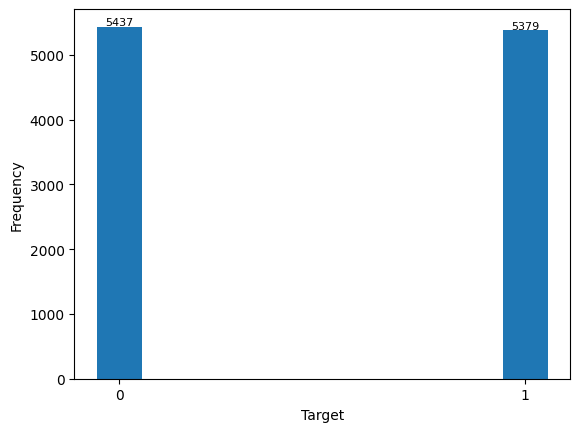

In [64]:
# Plot the histogram
n, bins, patches = plt.hist(target)

# Find the bins that have bars
bins_with_bars = [bins[i] for i in range(len(patches)) if n[i] > 0]

# Calculate the bar width
bar_width = bins[1] - bins[0]

# Set the x-tick locations and labels for bins with bars only
plt.xticks([b + bar_width/2 for b in bins_with_bars], [0,1])

# Plot the values for the bars
for i in range(len(patches)):
    if n[i] > 0:  # Only label bins with bars
        plt.text(x=bins[i]+(bins[i+1]-bins[i])/2, y=n[i]+20, s=int(n[i]), ha='center', fontsize=8)

# Set the axis labels and title
plt.xlabel('Target')
plt.ylabel('Frequency')

# Show the plot
plt.show()

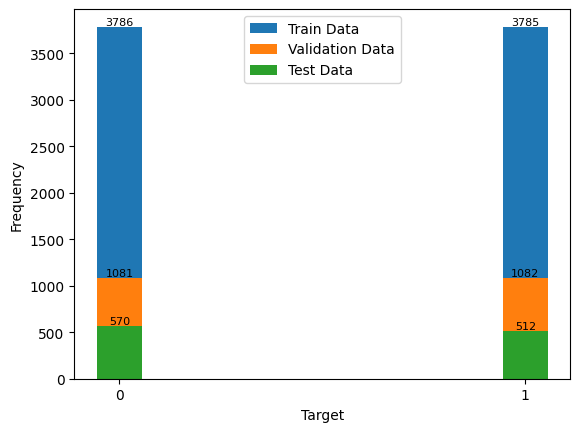

Number of tuples in Train Data: 7571
Number of tuples in Validation Data: 2163
Number of tuples in Test Data: 1082


In [65]:
# Split target data into 3 parts with 70%, 20%, and 10% of the tuples
split_points = np.array([0.7, 0.9]) * len(target)
split_points = split_points.astype(int)
first_part = target[:split_points[0]]
second_part = target[split_points[0]:split_points[1]]
last_part = target[split_points[1]:]

# Plot histogram of each part
n1, bins1, patches1 = plt.hist(first_part, label='Train Data')
n2, bins2, patches2 = plt.hist(second_part, label='Validation Data')
n3, bins3, patches3 = plt.hist(last_part, label='Test Data')

# Find the bins that have bars
bins_with_bars1 = [bins1[i] for i in range(len(patches1)) if n1[i] > 0]
bins_with_bars2 = [bins2[j] for j in range(len(patches2)) if n2[j] > 0]
bins_with_bars3 = [bins3[k] for k in range(len(patches3)) if n3[k] > 0]

# Calculate the bar width
bar_width1 = bins1[1] - bins1[0]
bar_width2 = bins2[1] - bins2[0]
bar_width3 = bins3[1] - bins3[0]

# Set the x-tick locations and labels for bins with bars only
plt.xticks([b + bar_width1/2 for b in bins_with_bars1], [0,1])
plt.xticks([b + bar_width2/2 for b in bins_with_bars2], [0,1])
plt.xticks([b + bar_width3/2 for b in bins_with_bars3], [0,1])

# Add text labels to each bin
for i in range(len(patches1)):
    if n1[i] > 0:  # Only label bins with bars
        plt.text(x=bins1[i]+(bins1[i+1]-bins1[i])/2, y=n1[i]+15, s=int(n1[i]), ha='center', fontsize=8)
for j in range(len(patches2)):
    if n2[j] > 0:  # Only label bins with bars
        plt.text(x=bins2[j]+(bins2[j+1]-bins2[j])/2, y=n2[j]+25, s=int(n2[j]), ha='center', fontsize=8)
for k in range(len(patches3)):
    if n3[k] > 0:  # Only label bins with bars
        plt.text(x=bins3[k]+(bins3[k+1]-bins3[k])/2, y=n3[k]+20, s=int(n3[k]), ha='center', fontsize=8)

plt.xlabel('Target')
plt.ylabel('Frequency')
plt.legend(loc='upper center')

plt.show()

# Print number of tuples in each part
print(f"Number of tuples in Train Data: {first_part.shape[0]}")
print(f"Number of tuples in Validation Data: {second_part.shape[0]}")
print(f"Number of tuples in Test Data: {last_part.shape[0]}")

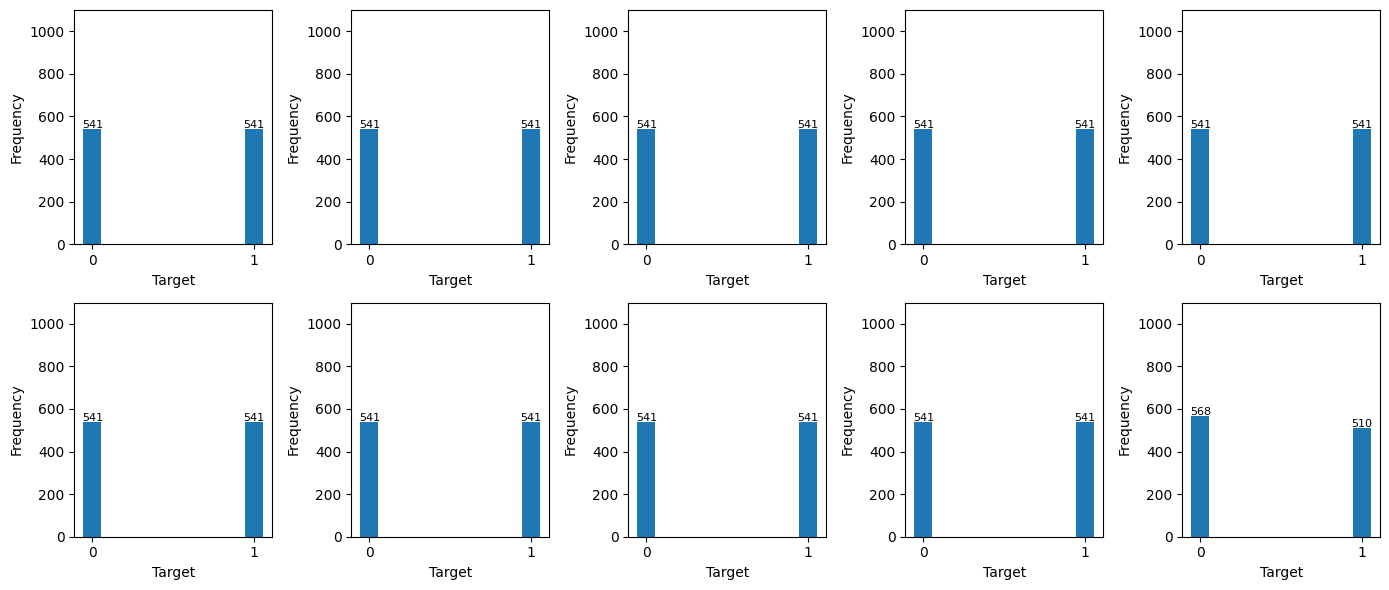

In [67]:
target = df['label_pass']
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 6))
for i, ax in enumerate(axes.ravel()):
    if i < 10:
        data = target[i*1082:i*1082+1082]
        if len(set(data)) > 1:
            n, bins, patches = ax.hist(data)
            bins_with_bars = [bins[j] for j in range(len(patches)) if n[j] > 0]
            bar_width = bins[1] - bins[0]
            ax.set_xticks([b + bar_width/2 for b in bins_with_bars], [0,1])
            ax.set_ylim(0, 1100)  # Set the y-axis limits for all subplots
            ax.set_xlabel('Target')
            ax.set_ylabel('Frequency')
            for j in range(len(patches)):
                if n[j] > 0:  # Only label bins with bars
                    ax.text(bins[j]+(bins[j+1]-bins[j])/2, n[j]+3, str(int(n[j])), ha='center', fontsize=8)
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()